In [41]:
!pip install ultralytics opencv-python

^C


In [1]:
import pandas as pd

https://ale.farama.org/environments/frogger/
\n
https://ale.farama.org/environments/

In [2]:
import gymnasium as gym
import os
import ale_py
import time
import matplotlib.pyplot as plt
import cv2
import numpy as np

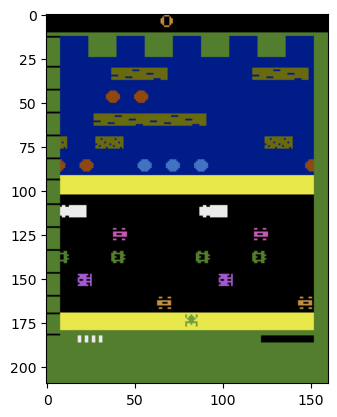

In [3]:
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, info = env.reset()
plt.imshow(obs)
plt.show()

In [ ]:
import numpy as np
# Initialize the environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()
frame = env.render()

frame = np.array(frame)

# Define a function to handle mouse clicks and print RGB values
def get_rgb(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        r, g, b = frame[y, x]  # Already in RGB format
        print(f"RGB Value at ({x}, {y}): R={r}, G={g}, B={b}")

# Set up a window and a mouse callback to check RGB values
cv2.imshow("Frogger Frame", frame)
cv2.setMouseCallback("Frogger Frame", get_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

env.close()


In [12]:
corners = []
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()
frame = env.render()

frame = np.array(frame)
# Define a function to handle mouse clicks and record the corner coordinates
def get_corners(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        corners.append((x, y))
        print(f"Corner {len(corners)} clicked at: ({x}, {y})")
        # Draw a circle at the clicked corner
        cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)  # Red circle for the corners
        # Display the updated image
        cv2.imshow("Select Corners", frame)
        
        # If 4 corners are selected, proceed
        if len(corners) == 4:
            print("All 4 corners selected!")
            # Optionally crop the image to the identified corners
            x1, y1 = corners[0]  # Top-left corner
            x2, y2 = corners[2]  # Bottom-right corner
            cropped_game_window = frame[y1:y2, x1:x2]
            cv2.imshow("Cropped Game Window", cropped_game_window)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            env.close()

# Set up a window and a mouse callback to select corners
cv2.imshow("Select Corners", frame)
cv2.setMouseCallback("Select Corners", get_corners)

cv2.waitKey(0)
cv2.destroyAllWindows()

Corner 1 clicked at: (32, 27)


frog values: R=110, G=156, B=66
Gree car:  R=82, G=126, B=45
Yellow car: R=195, G=144, B=61
Purple car: R=164, G=89, B=208
Pink car: R=198, G=89, B=179
white car: R=236, G=236, B=236
blue lillies: R=66, G=114, B=194
brown lillies: R=144, G=72, B=17
log:  R=105, G=105, B=15
Water: 8,28,140

In [ ]:

obs, info = env.reset()
start_time = time.time()
print("start time:", start_time)
score = 0

for _ in range(1000):
    action = env.action_space.sample() 
    obs, reward, terminated, truncated, info = env.step(action)
    score += reward

    plt.figure(figsize=(6, 6))  # Create a new figure
    plt.imshow(obs)  # Display the observation
    plt.axis("off")  # Hide axes
    plt.show() 
    
    if terminated or truncated:
        break
elapsed_time = time.time() - start_time
print(elapsed_time)
print(f"Final Score: {score}")



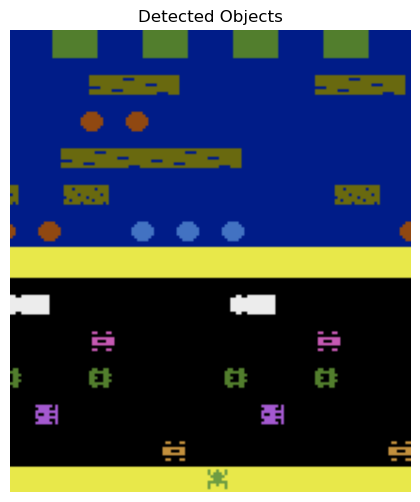

No objects detected.


In [6]:
obs, info = env.reset()
object_colors = {
    'frog': ((110, 156, 66), (120, 166, 76)),
    'green_car': ((82, 126, 45), (92, 136, 55)),
    'yellow_car': ((195, 144, 61), (205, 154, 71)),
    'purple_car': ((164, 89, 208), (174, 99, 218)),
    'pink_car': ((198, 89, 179), (208, 99, 189)),
    'white_car': ((236, 236, 236), (246, 246, 246)),
    'blue_lillies': ((66, 114, 194), (76, 124, 204)),
    'brown_lillies': ((144, 72, 17), (154, 82, 27)),
    'log': ((105, 105, 10), (115, 115, 25)),
   # 'water': ((0, 28, 136), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 15)
corner2 = (151, 14)
corner3 = (151, 179)
corner4 = (9, 179)

cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Process the image to find objects
def detect_objects(image_bgr, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_bgr, lower, upper)
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            # Filter small contours
            if cv2.contourArea(contour) > 500:  # Change this threshold as needed
                x, y, w, h = cv2.boundingRect(contour)
                detected_objects.append((label, (x, y, w, h)))

    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(cropped_image, object_colors)

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cropped_image)
ax = plt.gca()

# Draw bounding boxes
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()
# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")
env.close()

Detected objects:
green_car at position (106, 101) with width 12 and height 11
green_car at position (74, 101) with width 12 and height 11
green_car at position (26, 101) with width 12 and height 11
yellow_car at position (52, 127) with width 12 and height 11
purple_car at position (87, 114) with width 12 and height 11
purple_car at position (7, 114) with width 12 and height 11
pink_car at position (107, 88) with width 12 and height 11
pink_car at position (27, 88) with width 12 and height 11
white_car at position (76, 75) with width 20 and height 11
white_car at position (0, 75) with width 16 and height 11
blue_lillies at position (41, 49) with width 44 and height 11
brown_lillies at position (0, 49) with width 20 and height 11
brown_lillies at position (23, 10) with width 28 and height 11
log at position (113, 36) with width 20 and height 11
log at position (16, 23) with width 68 and height 24
log at position (106, 0) with width 36 and height 8
log at position (26, 0) with width 36 a

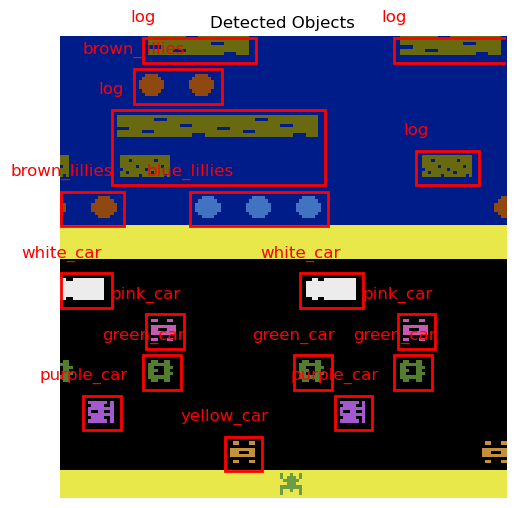

In [22]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)

        # Apply morphological operations to improve the mask (dilate and erode)
        mask = cv2.dilate(mask, None, iterations=4)
        mask = cv2.erode(mask, None, iterations=2)
        
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Loop over contours and filter by area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 100:  # Lower the threshold to capture more objects
                x, y, w, h = cv2.boundingRect(contour)
                detected_objects.append((label, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

Detected objects:
frog at position (68, 137) with width 11 and height 10
green_car at position (106, 101) with width 12 and height 11
green_car at position (74, 101) with width 12 and height 11
green_car at position (26, 101) with width 12 and height 11
yellow_car at position (132, 127) with width 10 and height 11
yellow_car at position (52, 127) with width 12 and height 11
purple_car at position (87, 114) with width 12 and height 11
purple_car at position (7, 114) with width 12 and height 11
pink_car at position (107, 88) with width 12 and height 11
pink_car at position (27, 88) with width 12 and height 11
white_car at position (76, 75) with width 20 and height 11
white_car at position (0, 75) with width 16 and height 11
blue_lillies at position (41, 49) with width 44 and height 11
brown_lillies at position (0, 49) with width 20 and height 11
brown_lillies at position (23, 10) with width 28 and height 11
log at position (114, 37) with width 18 and height 9
log at position (18, 37) wit

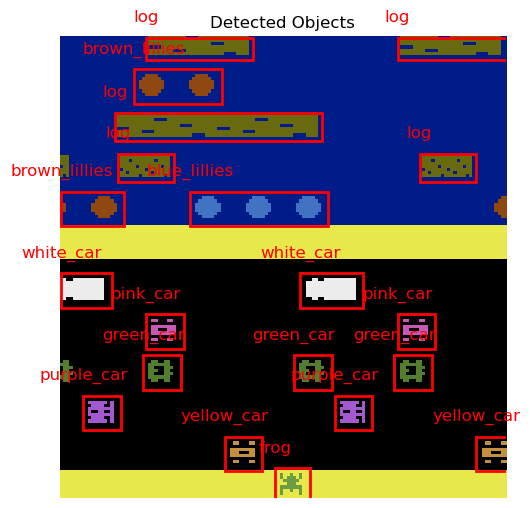

In [33]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # For logs, use different morphological operations to separate stacked objects
        if label == 'log':
            # Use less dilation to avoid merging nearby logs
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            # Use RETR_LIST instead of EXTERNAL to find all contours including nested ones
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # For other objects, use the original approach
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Loop over contours and filter by area
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:  # Lower the threshold to capture more objects
                x, y, w, h = cv2.boundingRect(contour)
                
                # For logs, add additional check for height to better separate stacked logs
                if label == 'log' and h > 25:
                    # Split tall log objects into multiple logs based on typical log height
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        # Only add if it's still within the original bounding box
                        if log_y + log_height <= y + h:
                            detected_objects.append((label, (x, log_y, w, log_height)))
                else:
                    detected_objects.append((label, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

Detected objects:
frog at position (68, 137) with width 11 and height 10
car at position (106, 101) with width 12 and height 11
car at position (74, 101) with width 12 and height 11
car at position (26, 101) with width 12 and height 11
car at position (132, 127) with width 10 and height 11
car at position (52, 127) with width 12 and height 11
car at position (87, 114) with width 12 and height 11
car at position (7, 114) with width 12 and height 11
car at position (107, 88) with width 12 and height 11
car at position (27, 88) with width 12 and height 11
car at position (76, 75) with width 20 and height 11
car at position (0, 75) with width 16 and height 11
lily at position (73, 49) with width 12 and height 11
lily at position (57, 49) with width 12 and height 11
lily at position (41, 49) with width 12 and height 11
lily at position (8, 49) with width 12 and height 11
lily at position (39, 10) with width 12 and height 11
lily at position (23, 10) with width 12 and height 11
log at positi

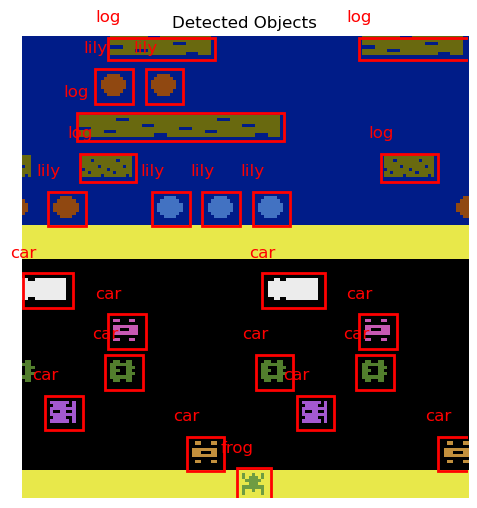

In [37]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()

# Crop the image based on the specified window corners
cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]

# Convert the image to a NumPy array
frame = np.array(cropped_image)

# Process the image to find objects based on color
def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

# Detect objects in the cropped image
detected_objects = detect_objects(frame, object_colors)

# Print the detected objects
if detected_objects:
    print("Detected objects:")
    for label, (x, y, w, h) in detected_objects:
        print(f"{label} at position ({x}, {y}) with width {w} and height {h}")
else:
    print("No objects detected.")

# Plot the result using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(frame)
ax = plt.gca()

# Draw bounding boxes and labels
for label, (x, y, w, h) in detected_objects:
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')

plt.title('Detected Objects')
plt.axis('off')
plt.show()

env.close()

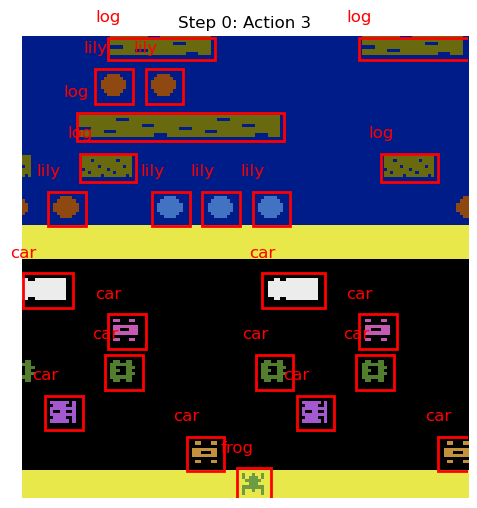

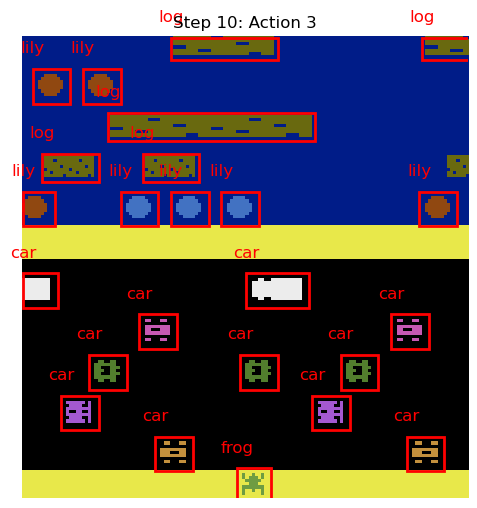

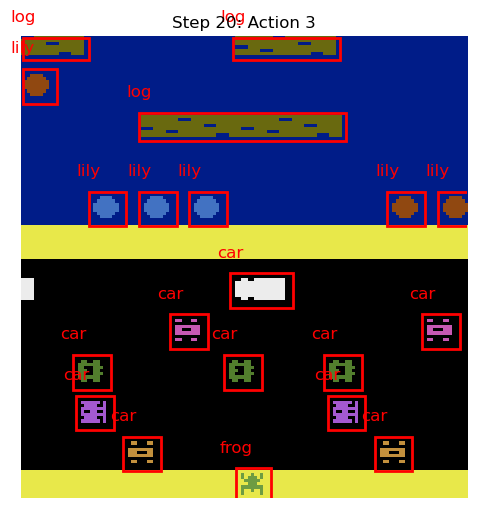

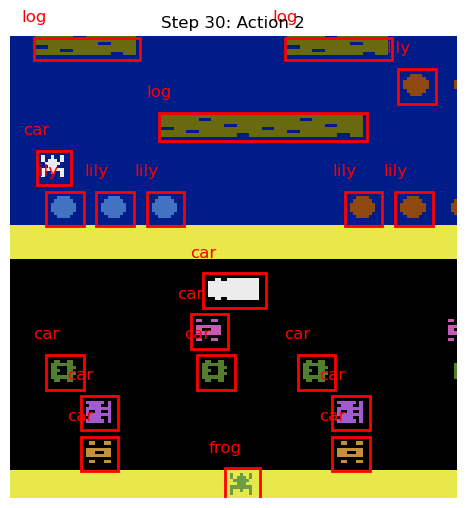

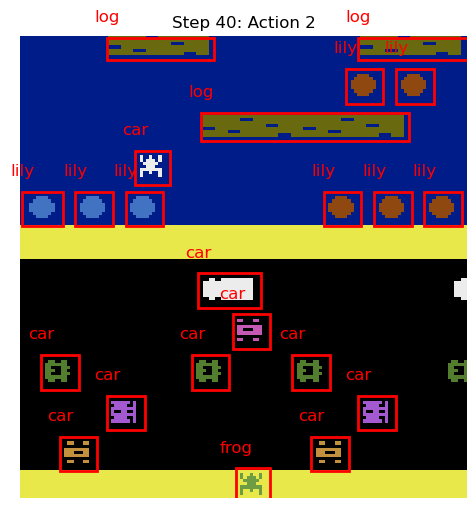

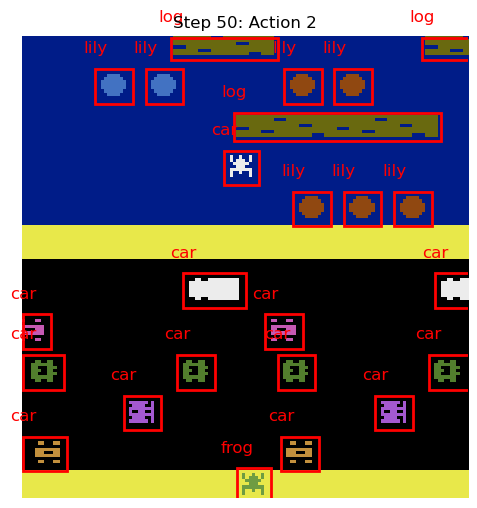

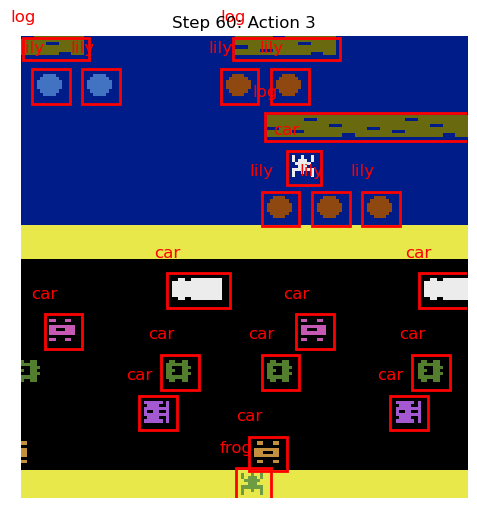

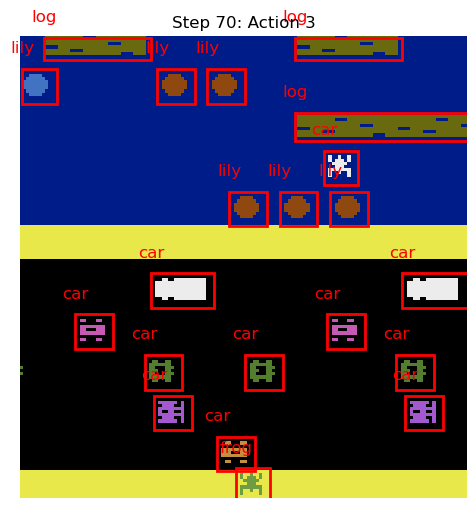

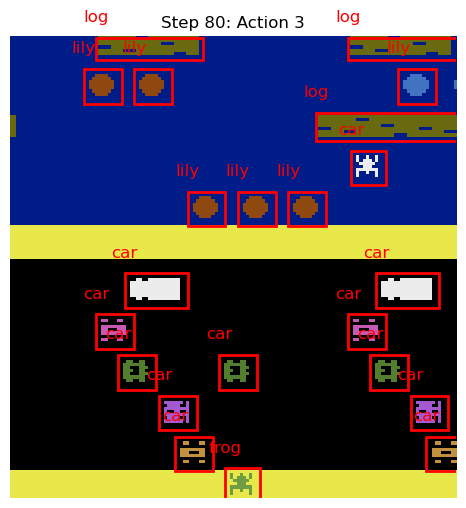

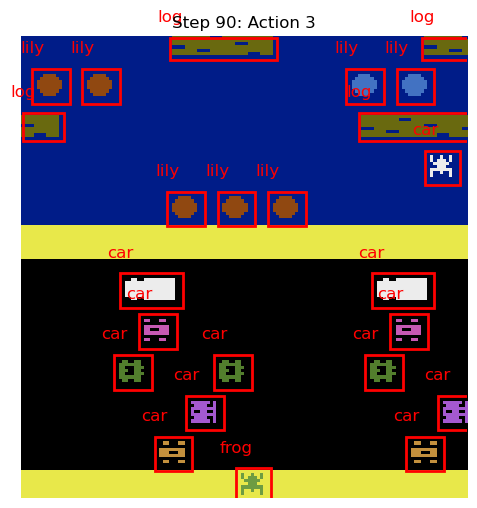

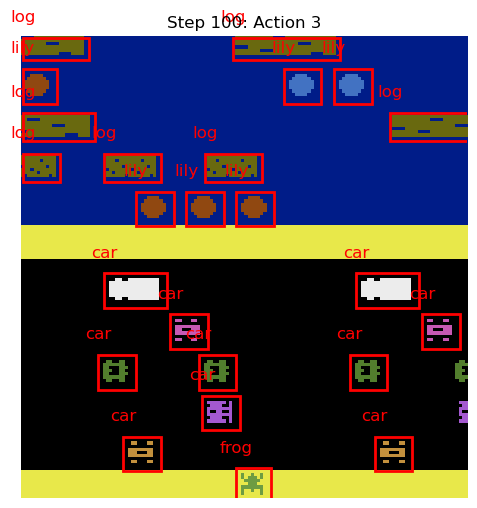

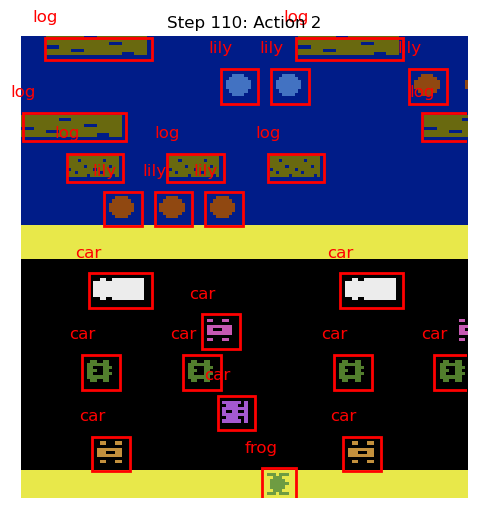

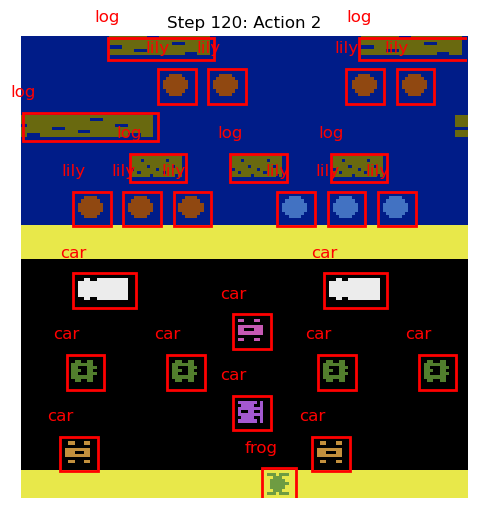

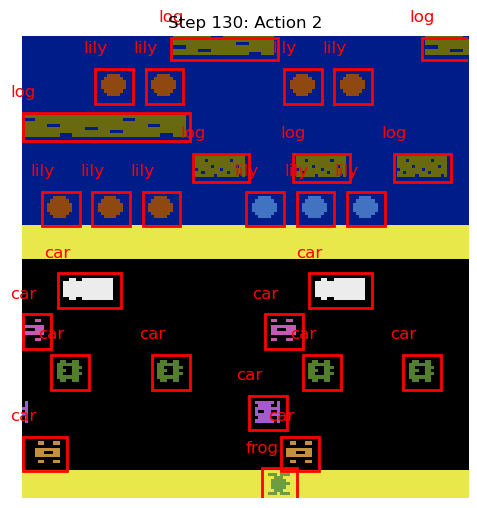

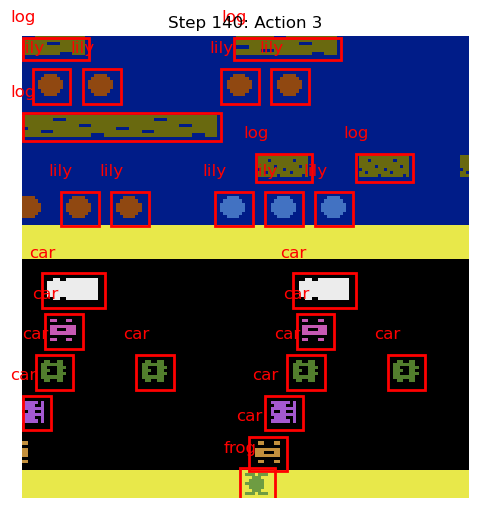

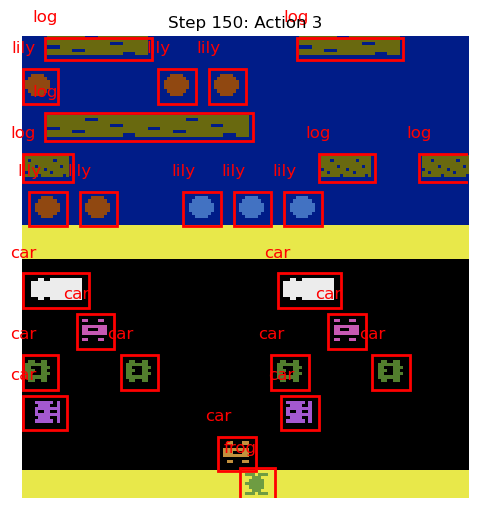

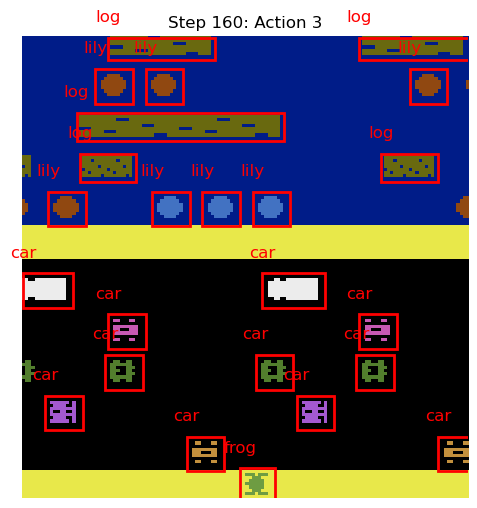

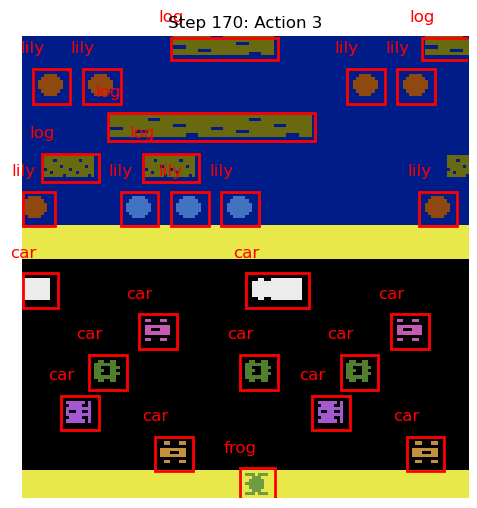

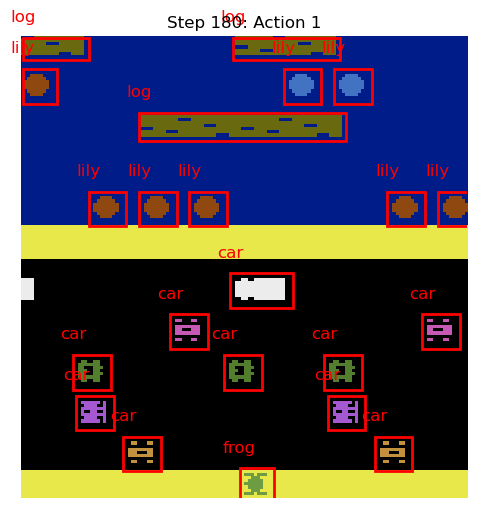

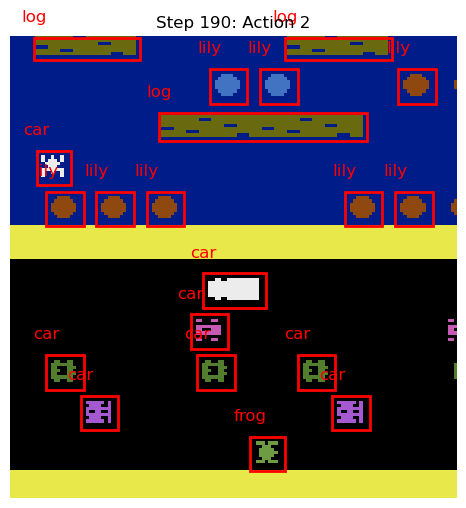

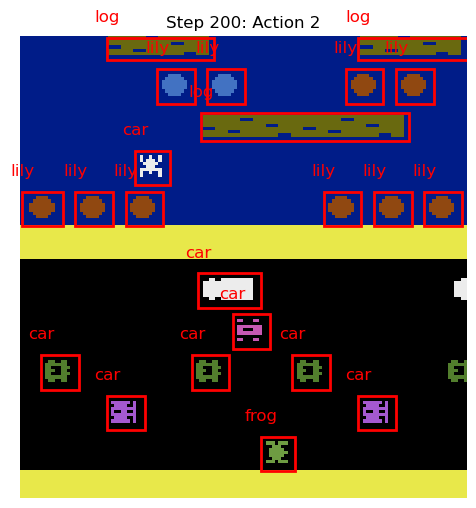

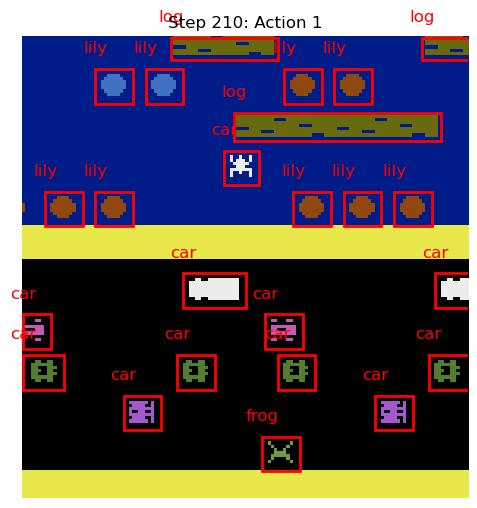

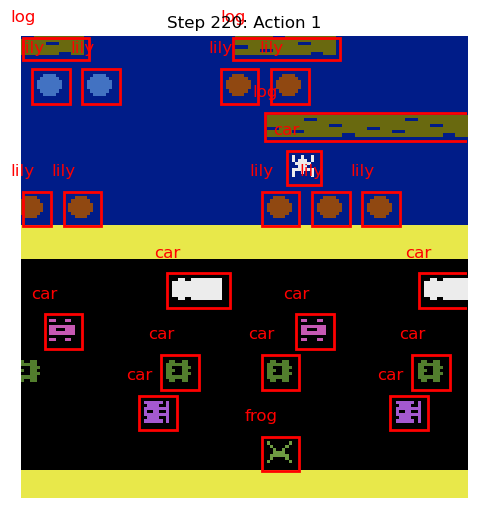

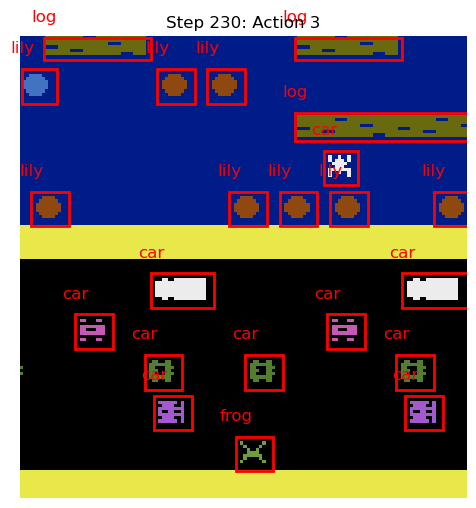

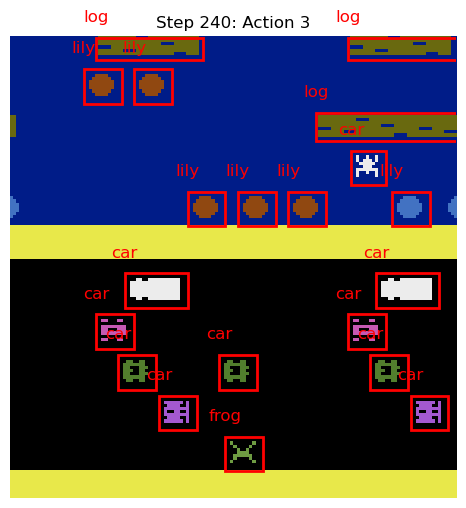

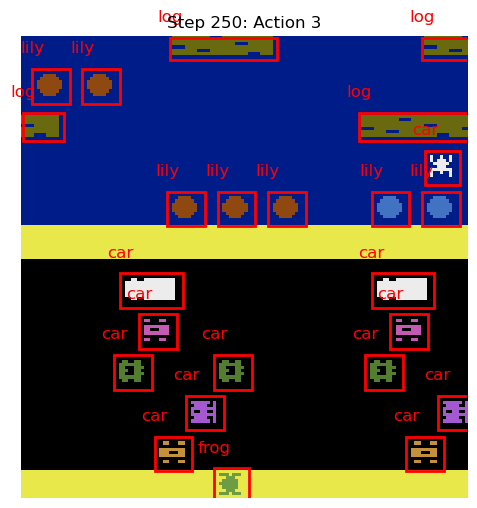

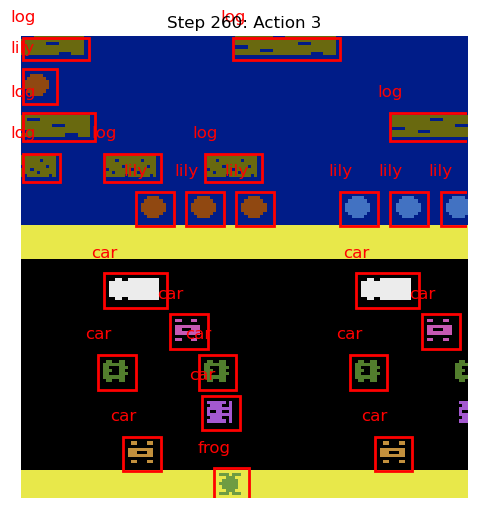

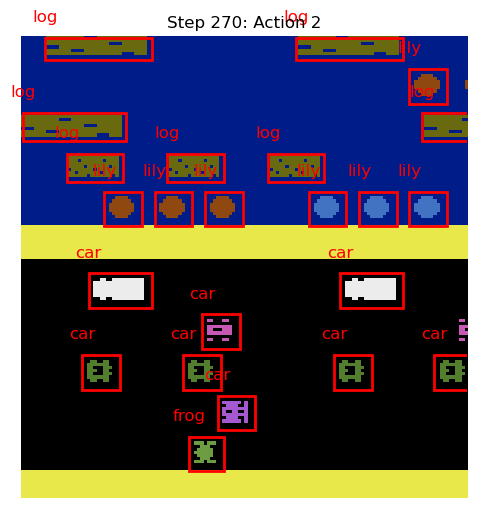

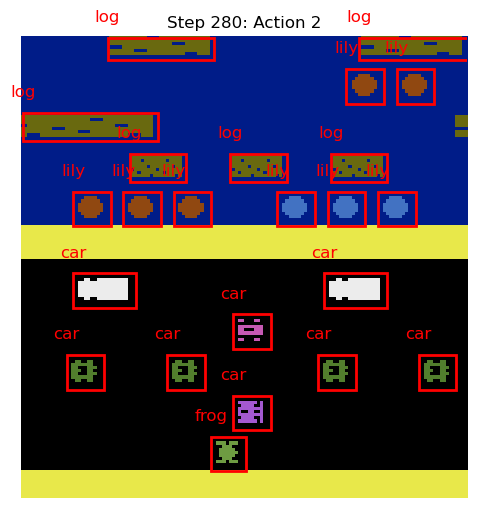

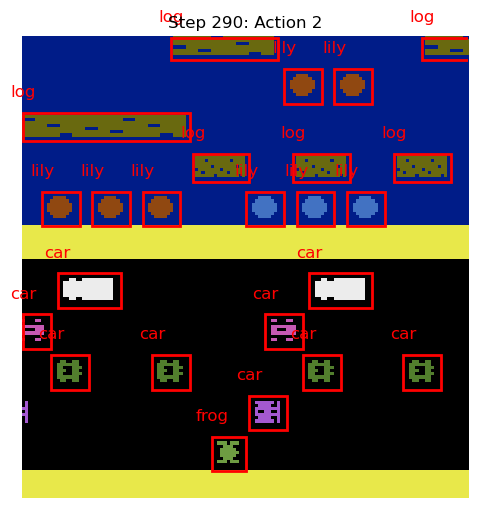

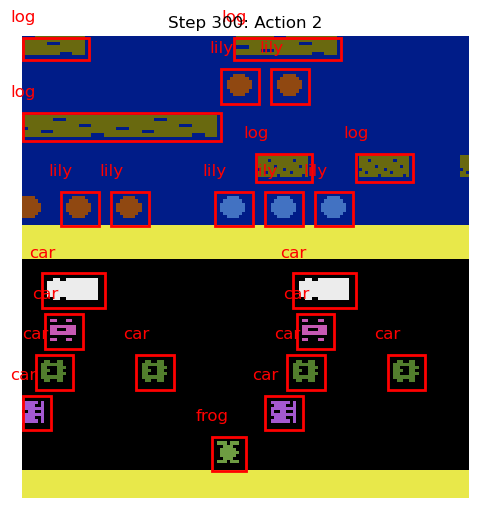

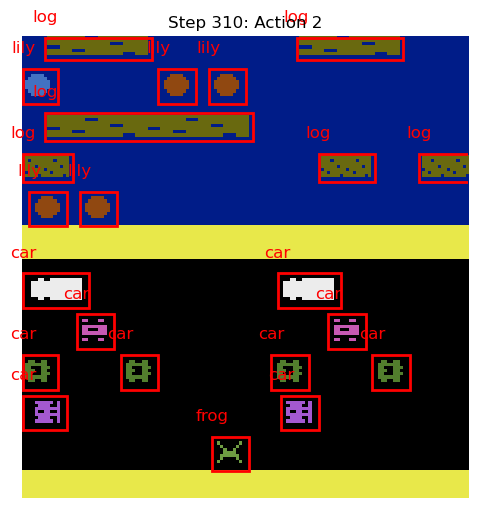

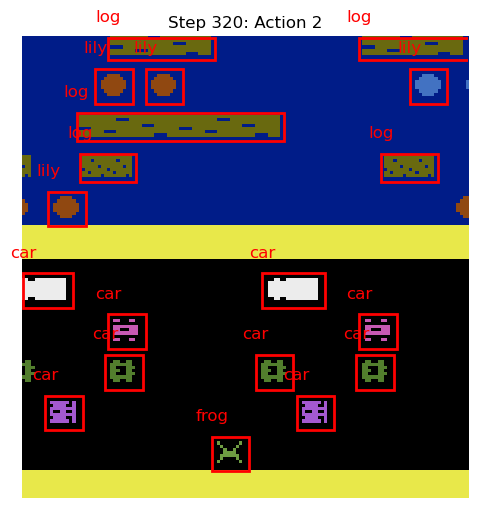

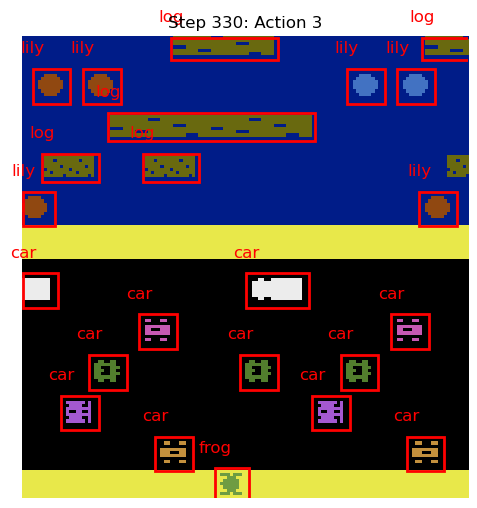

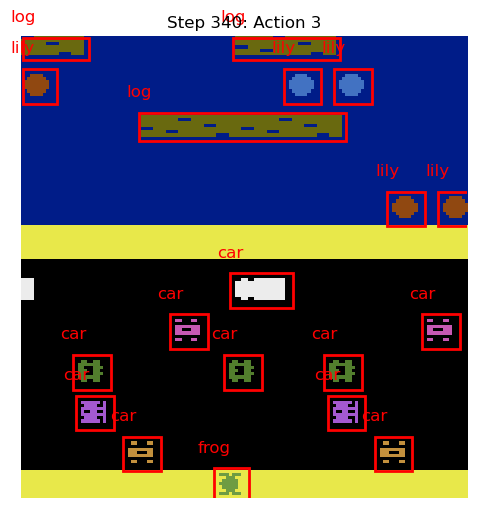

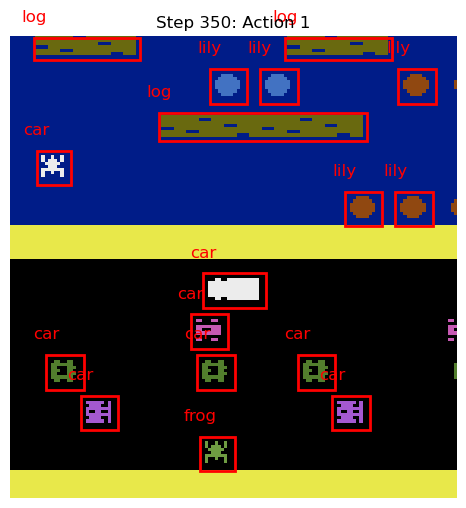

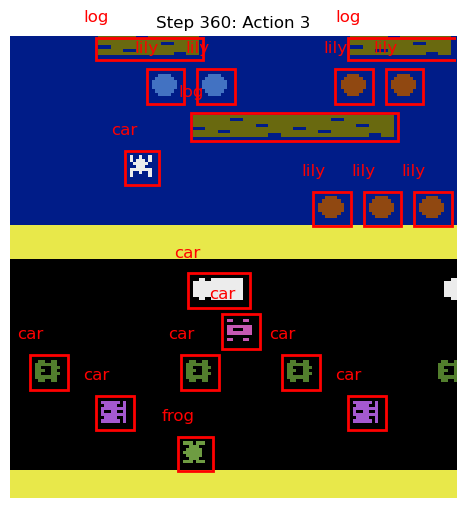

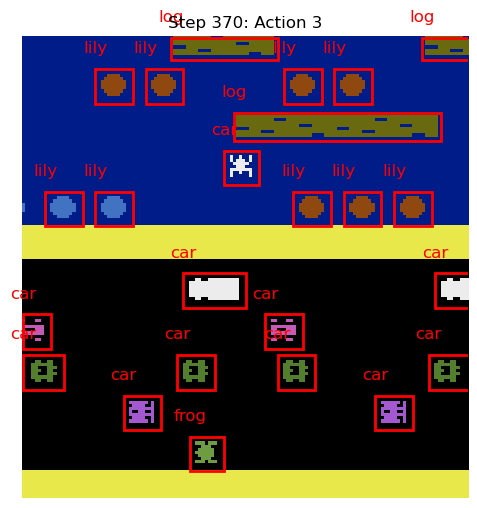

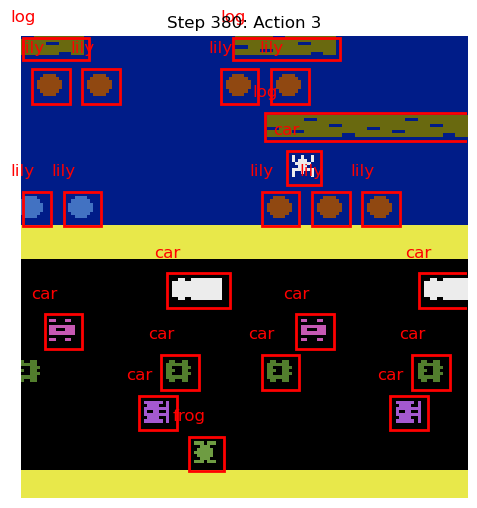

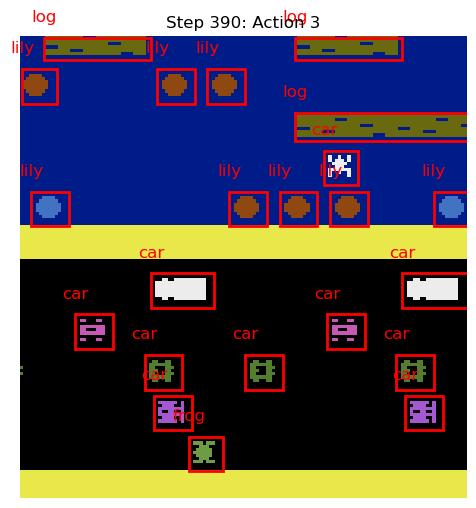

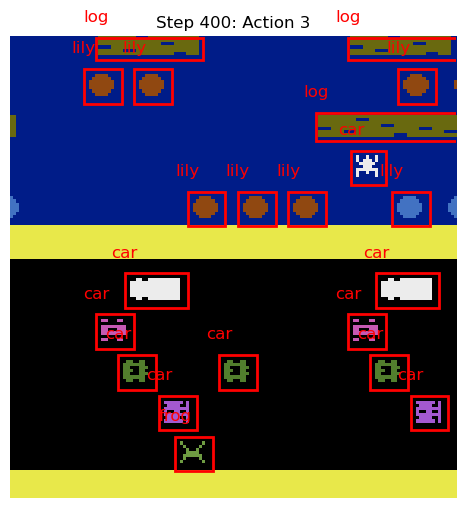

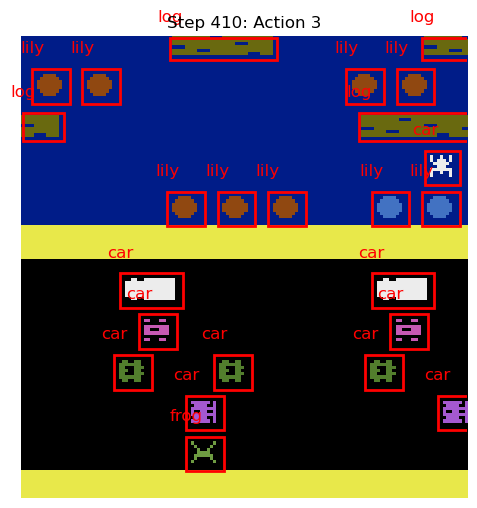

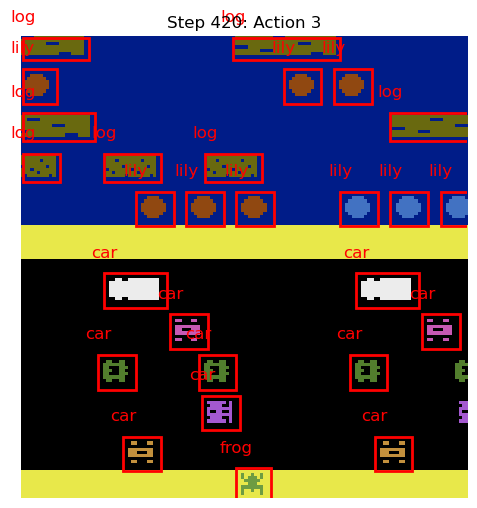

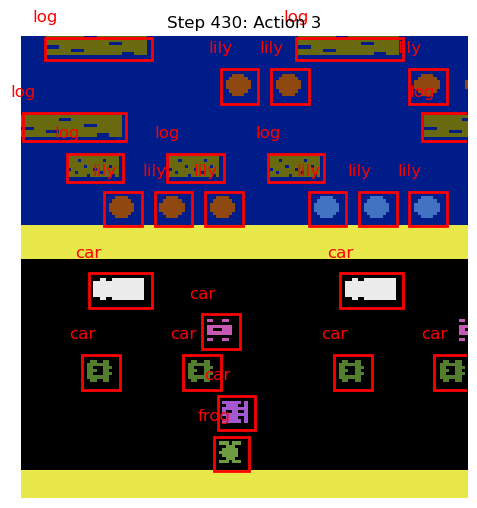

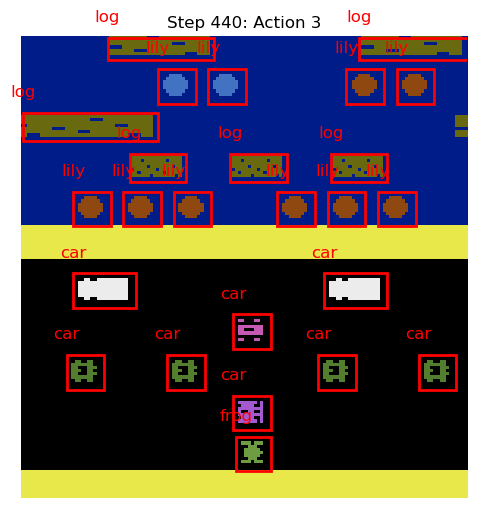

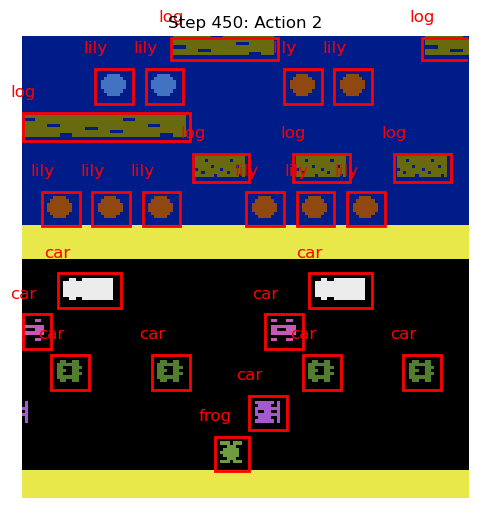

Game ended after 456 steps with reward 0.0


In [38]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()
def choose_action(detected_objects):
    # Find frog's position
    frog_pos = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_pos = (x + w/2, y + h/2)  # Center of frog
            break
    
    if frog_pos is None:
        return 0  # No action if frog not found
    
    # Simple logic: move up by default, but avoid obstacles
    for label, (x, y, w, h) in detected_objects:
        if label == "car" and abs(y - frog_pos[1]) < 20:  # Car in nearby row
            if x < frog_pos[0] and x + w > frog_pos[0] - 30:  # Car approaching from left
                return 3  # Move right
            if x > frog_pos[0] and x < frog_pos[0] + 30:  # Car approaching from right
                return 2  # Move left
    
    return 1  # Default: move up

# Main game loop
num_steps = 1000  # Run for 1000 steps
for step in range(num_steps):
    # Crop the image
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)
    
    # Detect objects
    detected_objects = detect_objects(frame, object_colors)
    
    # Choose action based on detected objects
    action = choose_action(detected_objects)
    
    # Take action in environment
    obs, reward, terminated, truncated, info = env.step(action)
    
    # Optional: Visualize every 10 steps
    if step % 10 == 0:
        plt.figure(figsize=(10, 6))
        plt.imshow(frame)
        ax = plt.gca()
        
        # Draw bounding boxes and labels
        for label, (x, y, w, h) in detected_objects:
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')
        
        plt.title(f'Step {step}: Action {action}')
        plt.axis('off')
        plt.show()
    
    # Break the loop if game is over
    if terminated or truncated:
        print(f"Game ended after {step} steps with reward {reward}")
        break

env.close()

In [ ]:
def check_collision(frog_box, obj_box):
    fx, fy, fw, fh = frog_box
    ox, oy, ow, oh = obj_box
    return not (fx + fw < ox or fx > ox + ow or fy + fh < oy or fy > oy + oh)

total_reward = 0  # Track cumulative reward

for step in range(num_steps):
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)

    detected_objects = detect_objects(frame, object_colors)
    
    frog_box = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_box = (x, y, w, h)
            break
    
    action = choose_action(detected_objects)
    
    obs, reward, terminated, truncated, info = env.step(action)
    
    # Penalty for collision
    if frog_box:
        for label, (x, y, w, h) in detected_objects:
            if label.endswith("car") and check_collision(frog_box, (x, y, w, h)):
                reward -= 5  # Apply penalty
                print(f"Collision penalty applied at step {step}")
                break
    
    total_reward += reward
    
    if step % 10 == 0:
        # Visualization code here
        pass
    
    if terminated or truncated:
        print(f"Game ended after {step} steps with total reward {total_reward}")
        break

env.close()

In [ ]:
def is_on_safe_platform(frog_box, detected_objects):
    fx, fy, fw, fh = frog_box
    for label, (x, y, w, h) in detected_objects:
        if label in ["log", "blue_lillies", "brown_lillies"]:
            if not (fx + fw < x or fx > x + w or fy + fh < y or fy > y + h):
                return True  # Frog is on a safe object
    return False  # No platform found under frog

water_line_y = (corner1[1] + corner3[1]) // 2  # Define upper half as water region

total_reward = 0

for step in range(num_steps):
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)

    detected_objects = detect_objects(frame, object_colors)
    
    frog_box = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_box = (x, y, w, h)
            break
    
    action = choose_action(detected_objects)
    
    obs, reward, terminated, truncated, info = env.step(action)
    
    # Penalty for collision with car
    if frog_box:
        for label, (x, y, w, h) in detected_objects:
            if label.endswith("car") and check_collision(frog_box, (x, y, w, h)):
                reward -= 5  # Collision penalty
                print(f"Collision penalty at step {step}")
                break

        # Penalty for falling into water
        frog_center_y = frog_box[1] + frog_box[3] / 2
        if frog_center_y < water_line_y:
            if not is_on_safe_platform(frog_box, detected_objects):
                reward -= 10  # Water penalty
                print(f"Water penalty at step {step}")

    total_reward += reward
    
    if step % 10 == 0:
        # Visualization code here
        pass
    
    if terminated or truncated:
        print(f"Game ended after {step} steps with total reward {total_reward}")
        break

env.close()

In [ ]:
def fibonacci(n):
    fib = [0,1]

    if n <= 1:
        return fib[n]
    else:
        for i in range(2,n+1):
            fib.append(fib[i-1] + fib[i-2])
        return fib[n]
    
while True:
    n = int(input("Enter a number: "))
    if n < 0:
        print("Please enter a positive integer.")
    else:
        print(f"Fibonacci of {n} is {fibonachi(n)}")

Step 0: Action 1, Custom Reward: 0, Total: 0


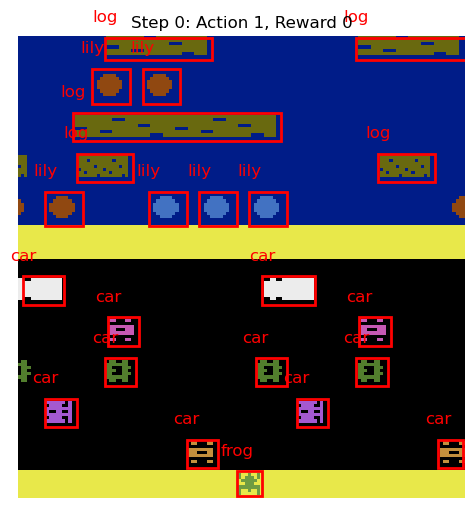

Step 10: Action 1, Custom Reward: 0, Total: 0


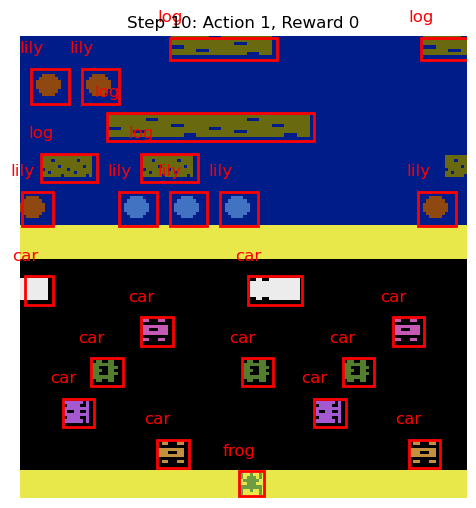

Step 20: Action 1, Custom Reward: 0, Total: 0


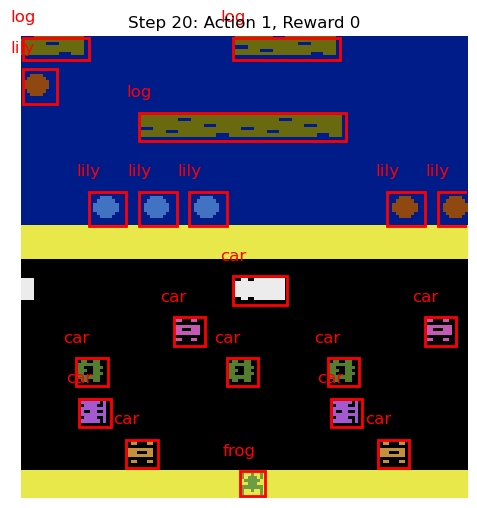

Step 30: Action 1, Custom Reward: 0, Total: 0


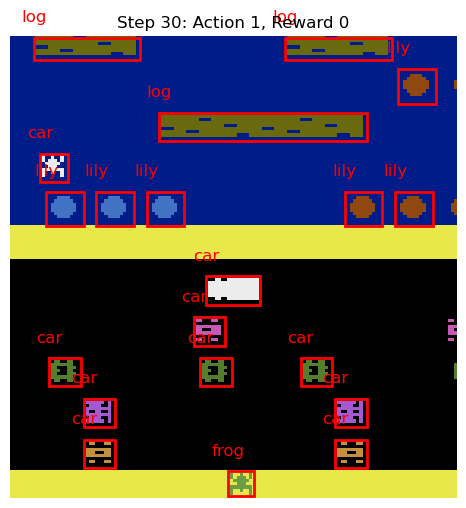

Step 40: Action 1, Custom Reward: 0, Total: 0


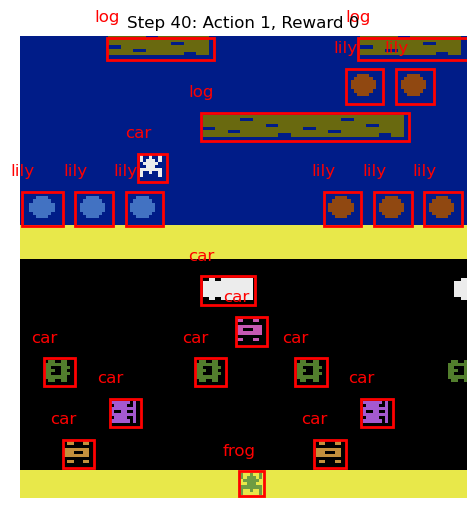

Step 50: Action 1, Custom Reward: 0, Total: 0


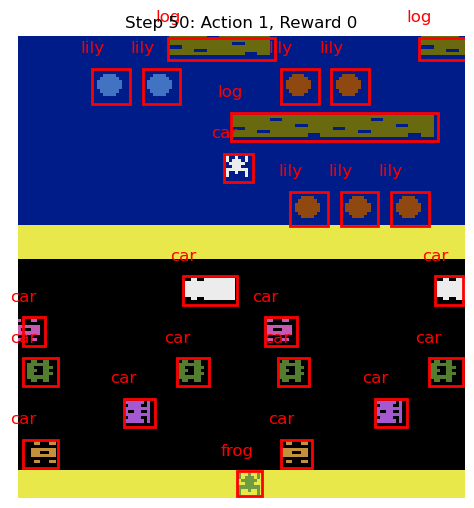

Step 60: Action 1, Custom Reward: 0, Total: 0


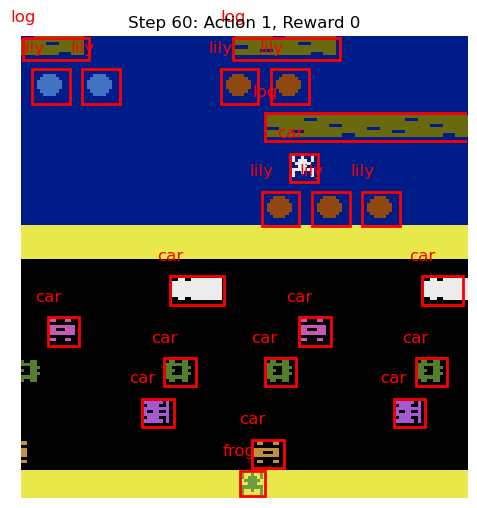

Step 70: Action 1, Custom Reward: 0, Total: 0


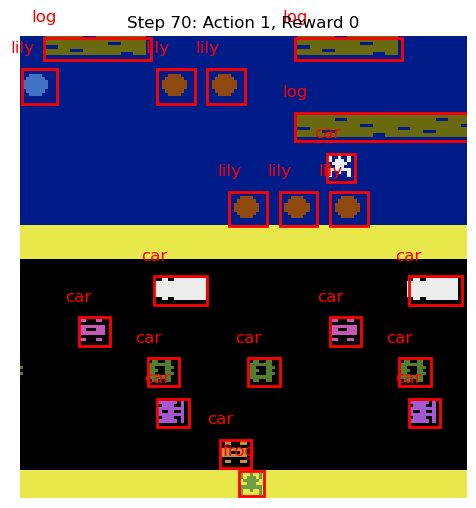

Step 80: Action 1, Custom Reward: 0, Total: 0


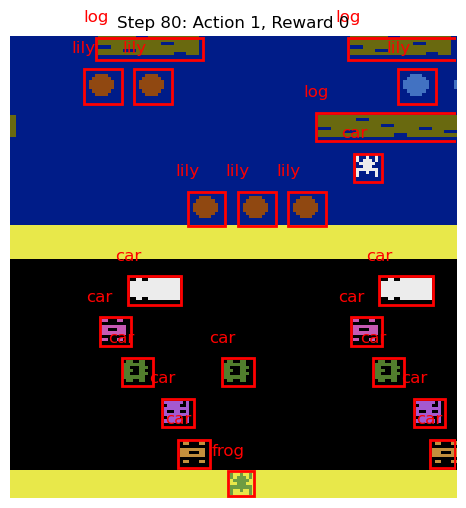

Step 90: Action 1, Custom Reward: 0, Total: 0


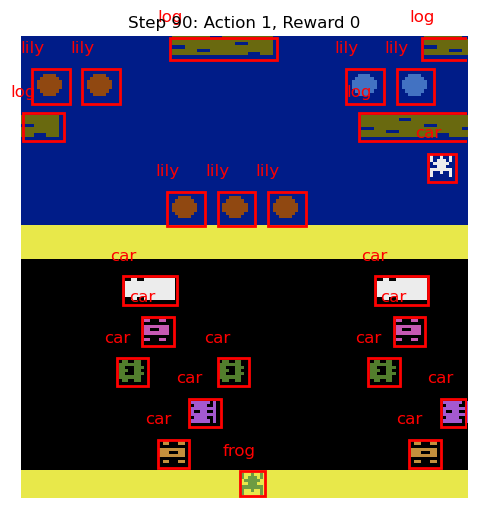

Step 100: Action 1, Custom Reward: 0, Total: 0


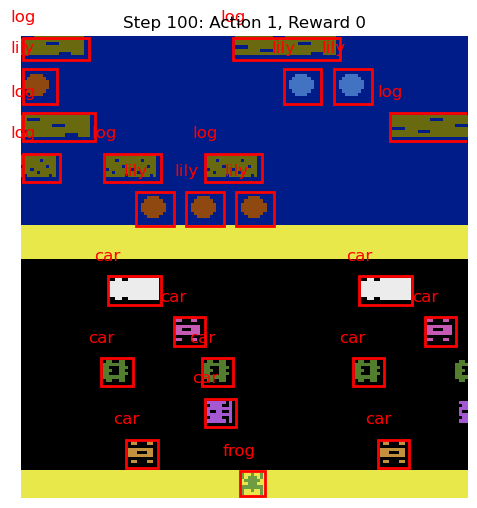

Step 110: Action 1, Custom Reward: 1, Total: 1


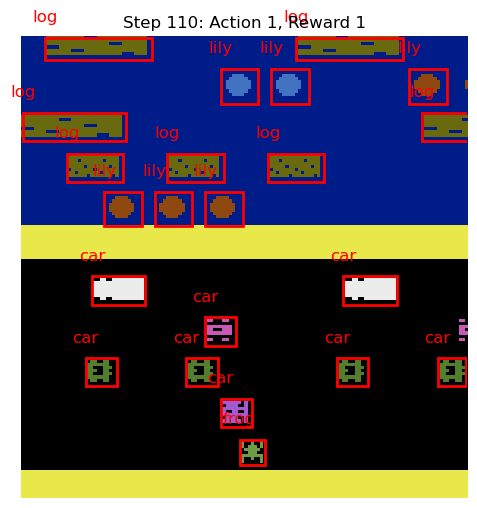

Step 120: Action 1, Custom Reward: 0, Total: 1


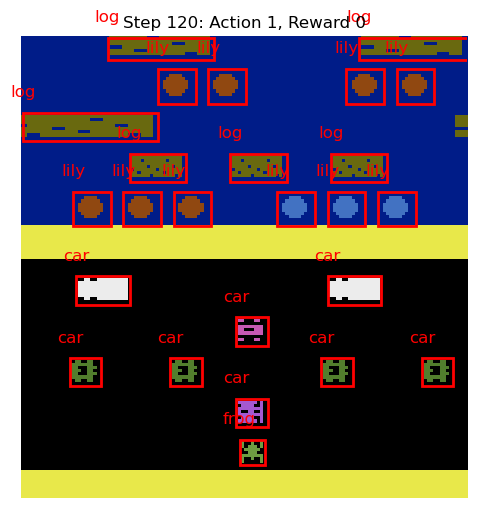

Step 130: Action 1, Custom Reward: 0, Total: 1


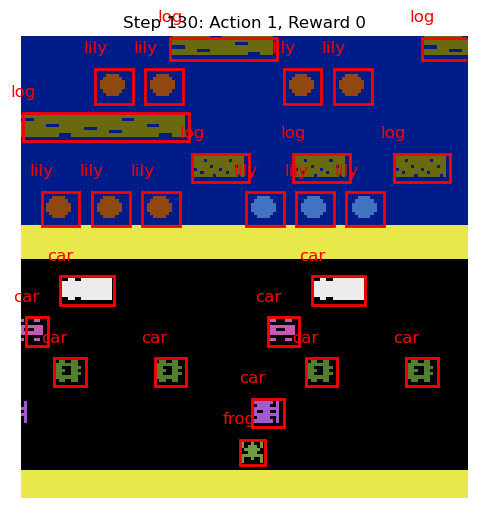

Step 140: Action 1, Custom Reward: 0, Total: 1


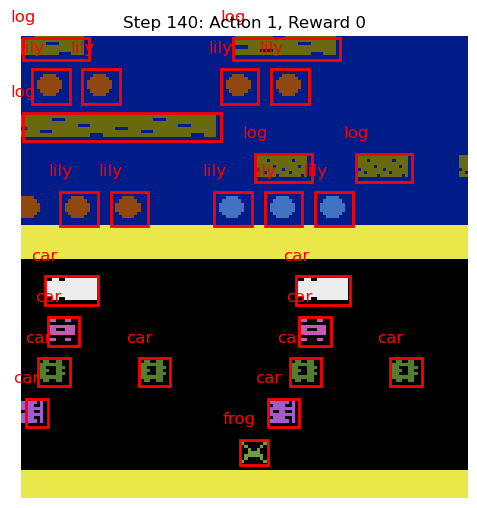

Step 150: Action 1, Custom Reward: 0, Total: 1


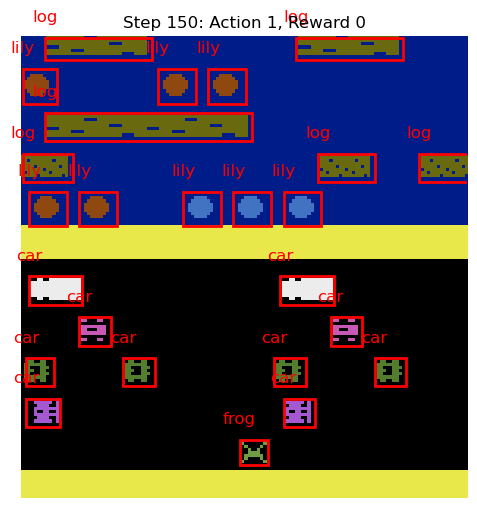

Step 160: Action 1, Custom Reward: 0, Total: 1


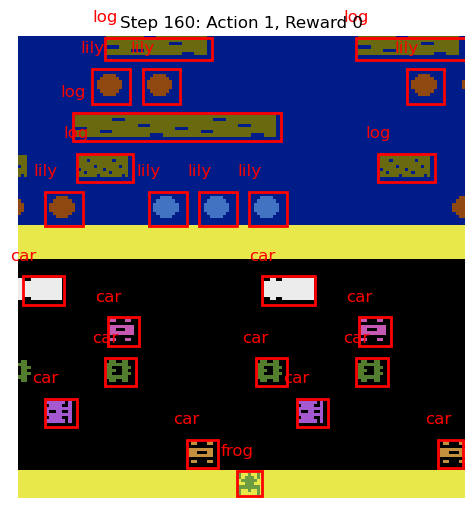

Step 170: Action 1, Custom Reward: 0, Total: 1


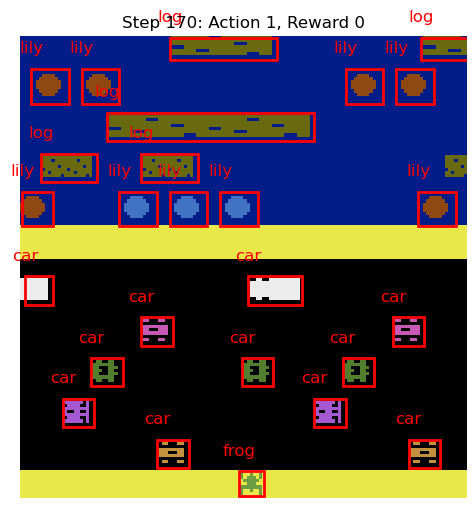

Step 180: Action 1, Custom Reward: 0, Total: 1


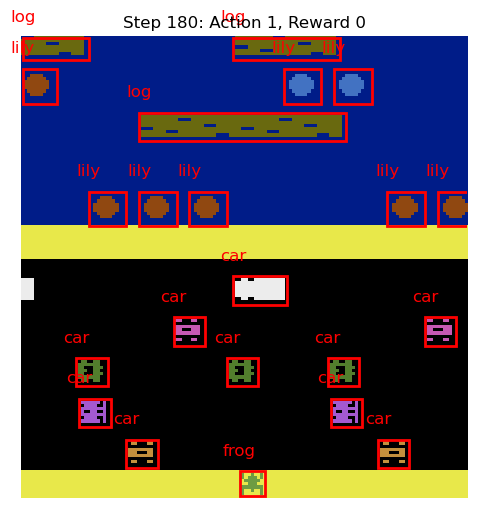

Step 190: Action 1, Custom Reward: 0, Total: 1


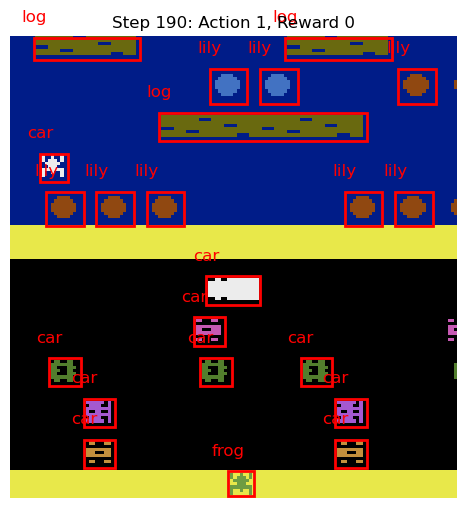

Step 200: Action 1, Custom Reward: 0, Total: 1


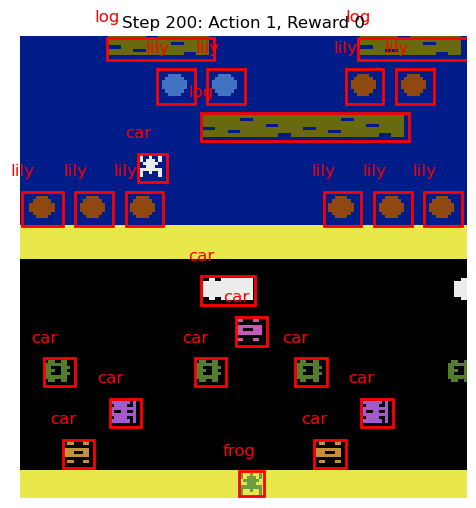

Step 210: Action 1, Custom Reward: 0, Total: 1


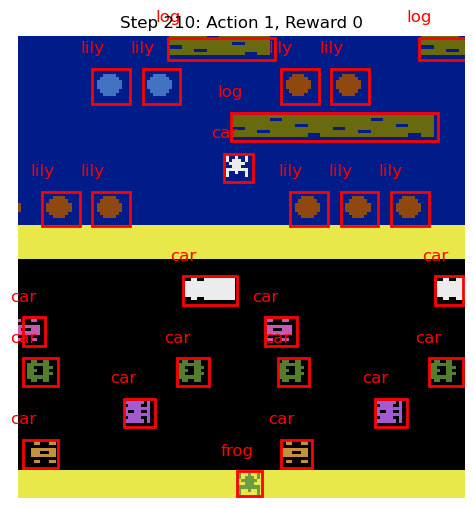

Step 220: Action 1, Custom Reward: 0, Total: 1


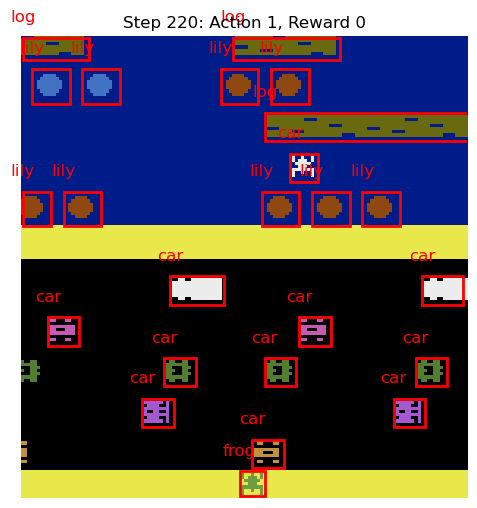

Step 230: Action 1, Custom Reward: 0, Total: 1


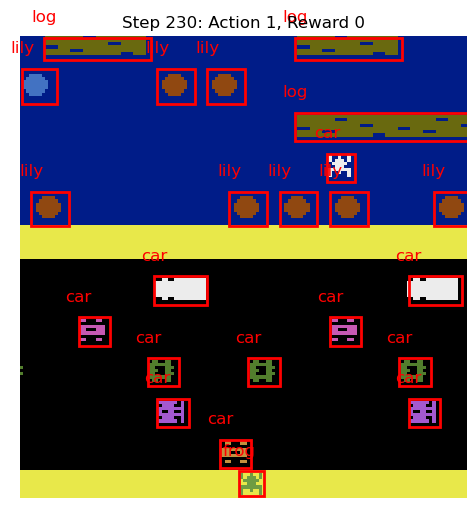

Step 240: Action 1, Custom Reward: 0, Total: 1


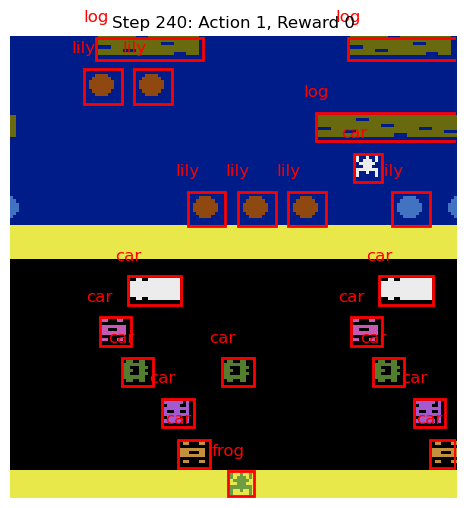

Step 250: Action 1, Custom Reward: 0, Total: 1


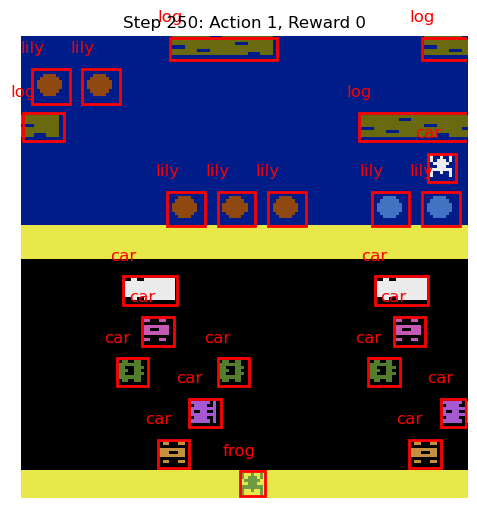

Step 260: Action 1, Custom Reward: 0, Total: 1


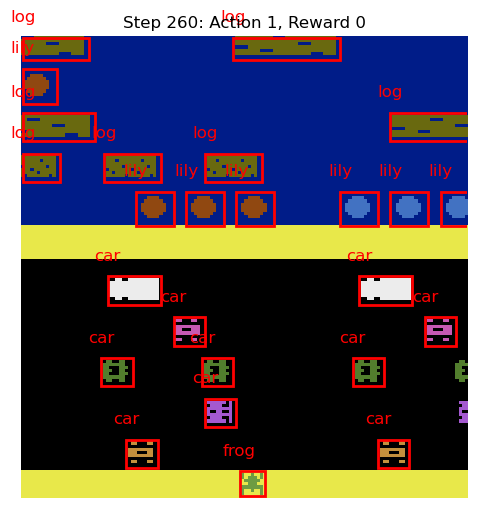

Step 270: Action 1, Custom Reward: 0, Total: 1


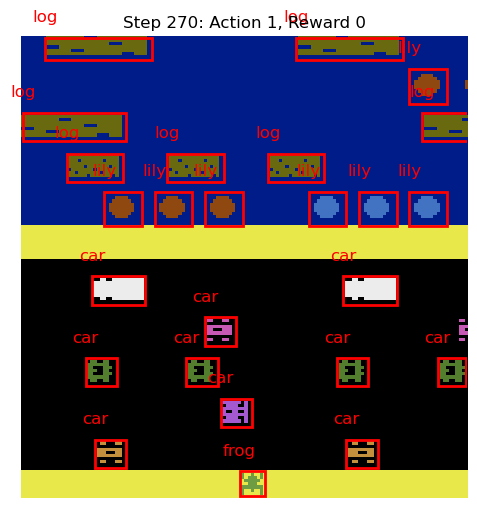

Step 280: Action 1, Custom Reward: 0, Total: 1


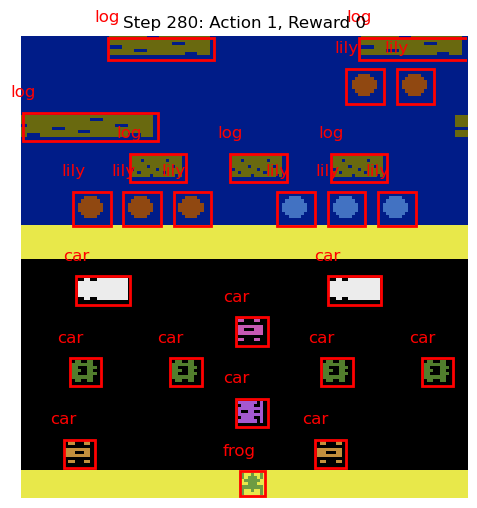

Step 290: Action 1, Custom Reward: 0, Total: 1


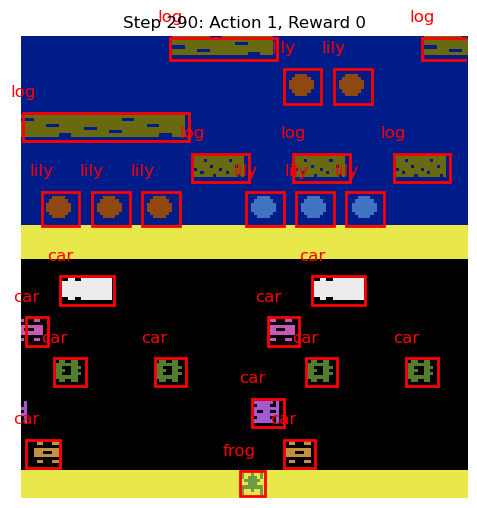

Step 300: Action 1, Custom Reward: 0, Total: 1


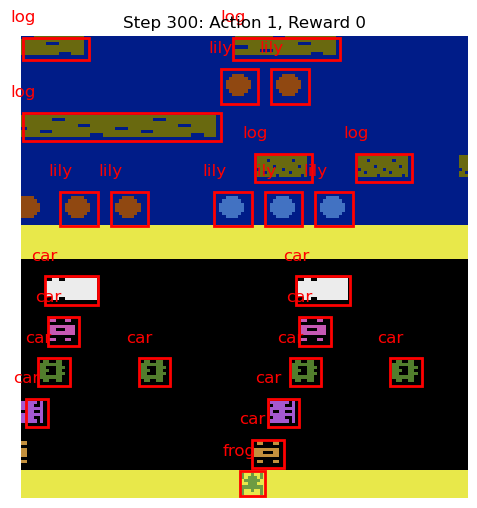

Step 310: Action 1, Custom Reward: 0, Total: 1


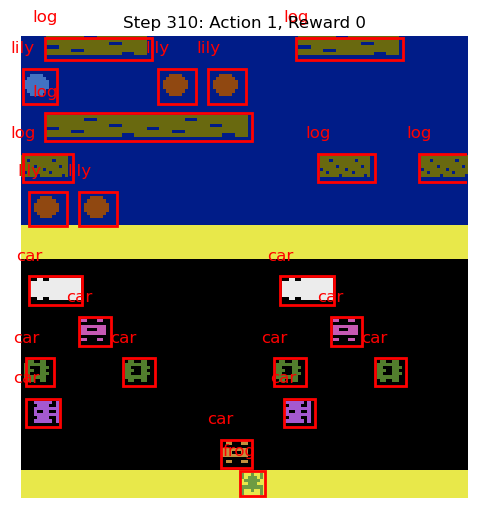

Step 320: Action 1, Custom Reward: 0, Total: 1


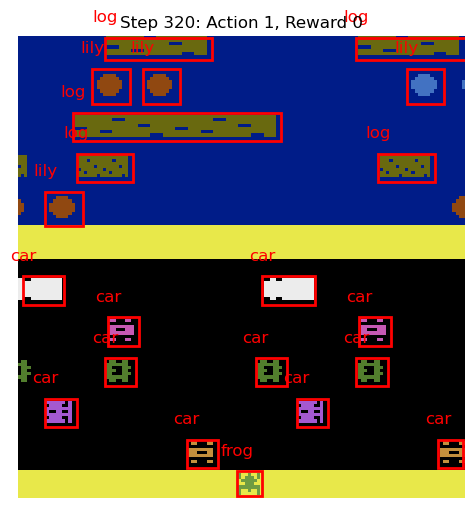

Step 330: Action 1, Custom Reward: 0, Total: 1


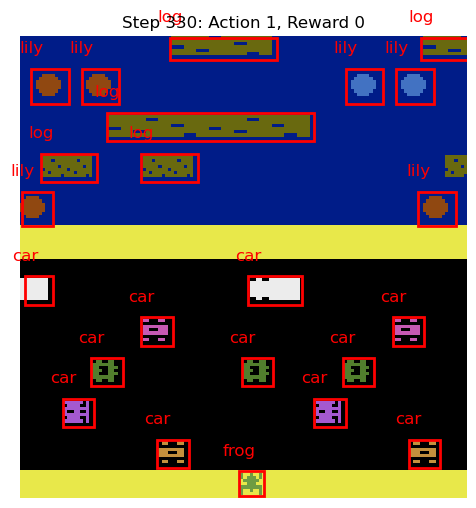

Step 340: Action 1, Custom Reward: 0, Total: 1


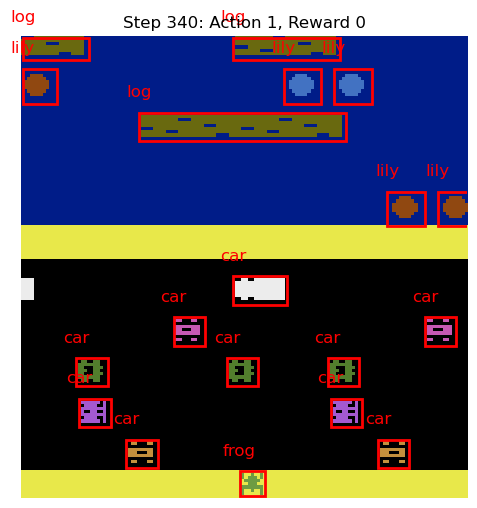

Step 350: Action 1, Custom Reward: 0, Total: 1


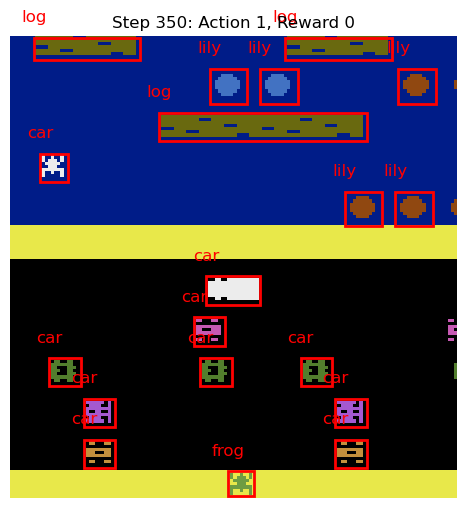

Step 360: Action 1, Custom Reward: 0, Total: 1


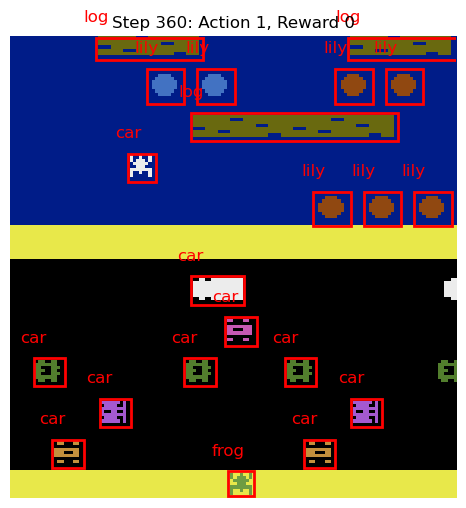

Step 370: Action 1, Custom Reward: 0, Total: 1


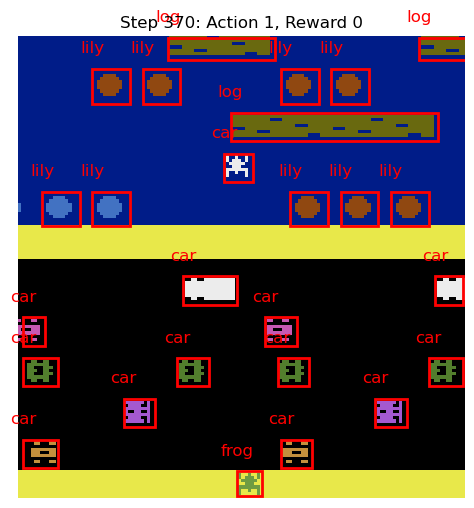

Step 380: Action 1, Custom Reward: 0, Total: 1


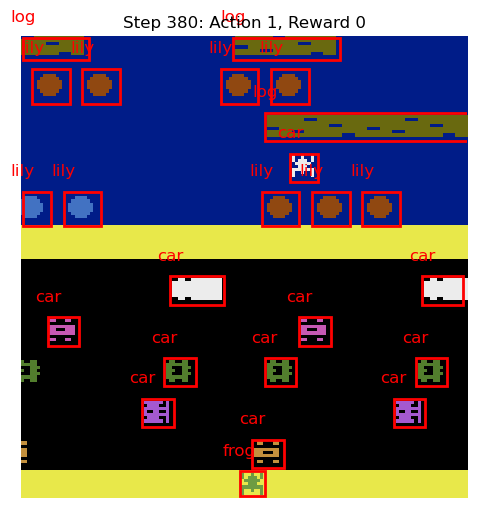

Step 390: Action 1, Custom Reward: 0, Total: 1


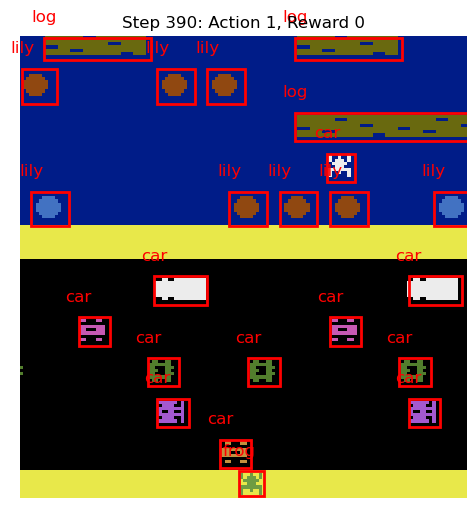

Step 400: Action 1, Custom Reward: 0, Total: 1


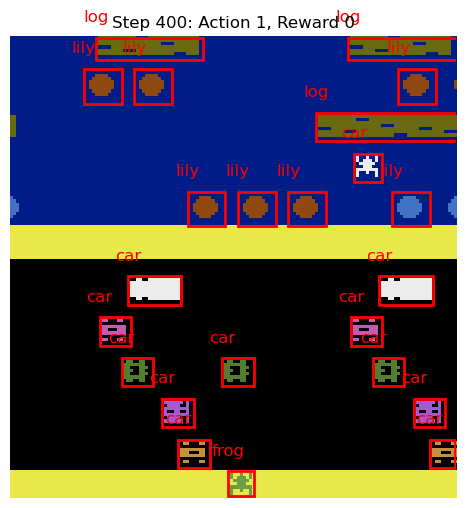

Step 410: Action 1, Custom Reward: 0, Total: 1


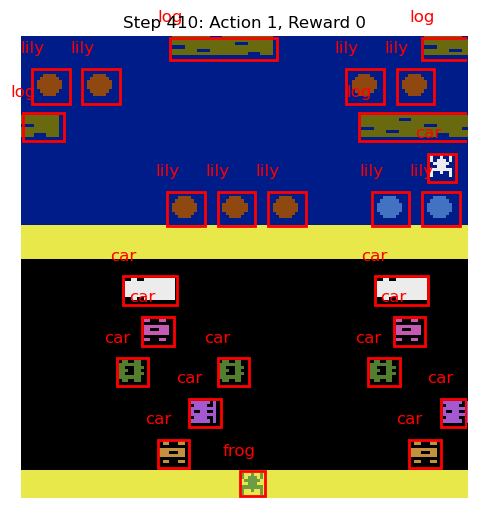

Step 420: Action 1, Custom Reward: 0, Total: 1


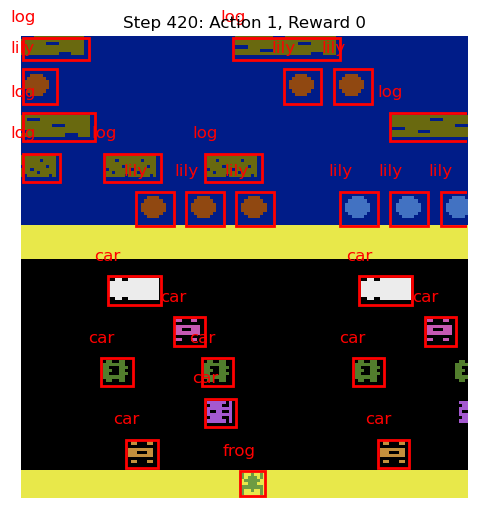

Step 430: Action 1, Custom Reward: 0, Total: 1


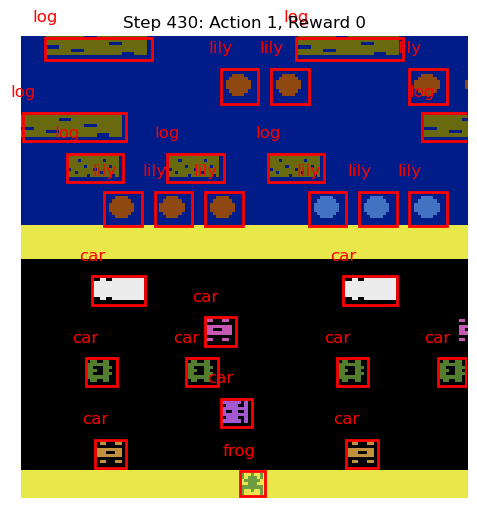

Step 440: Action 1, Custom Reward: 0, Total: 1


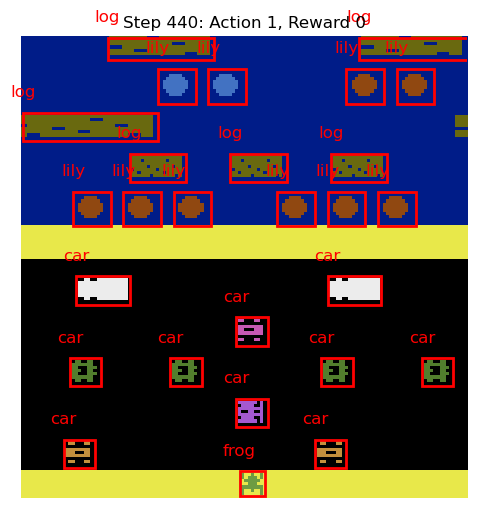

Step 450: Action 1, Custom Reward: 0, Total: 1


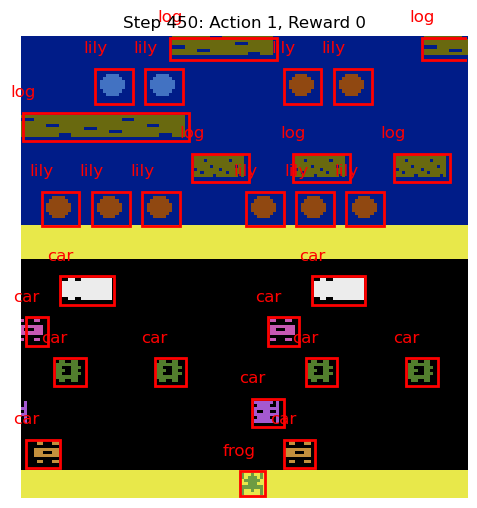

Step 460: Action 1, Custom Reward: 0, Total: 1


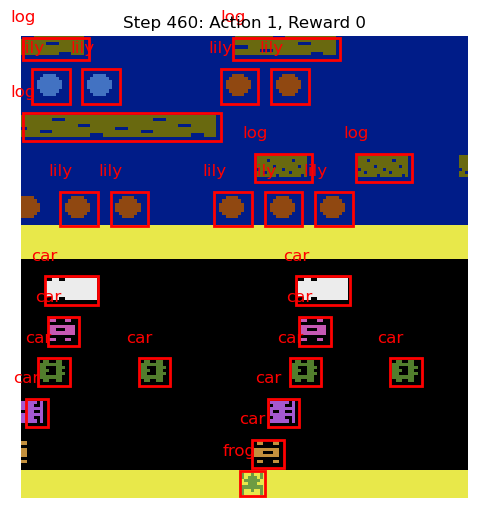

Step 470: Action 1, Custom Reward: 0, Total: 1


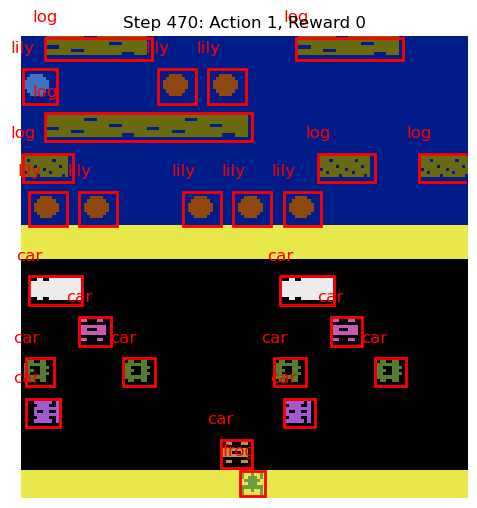

Step 480: Action 1, Custom Reward: 0, Total: 1


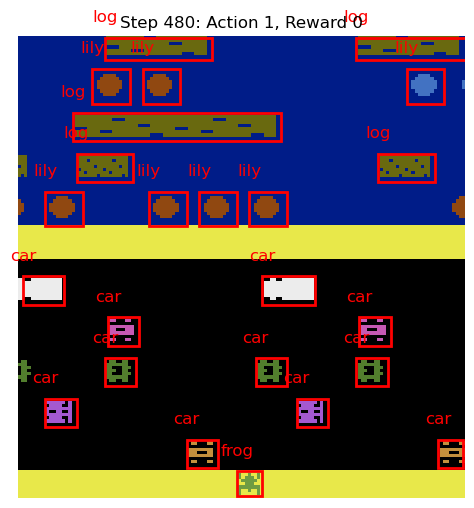

Step 490: Action 1, Custom Reward: 0, Total: 1


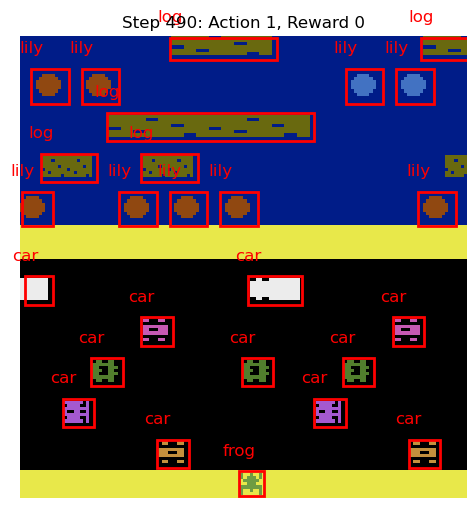

Step 500: Action 1, Custom Reward: 0, Total: 1


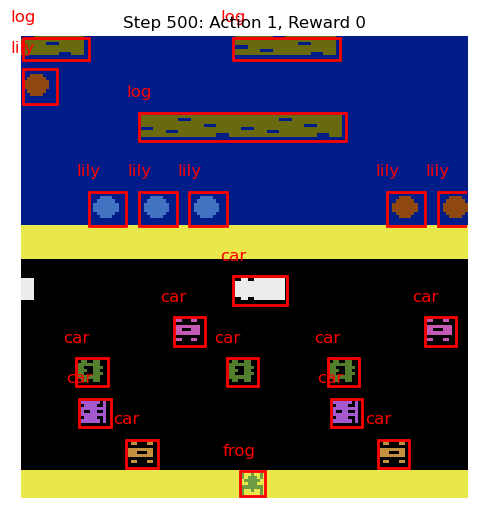

Step 510: Action 1, Custom Reward: 0, Total: 1


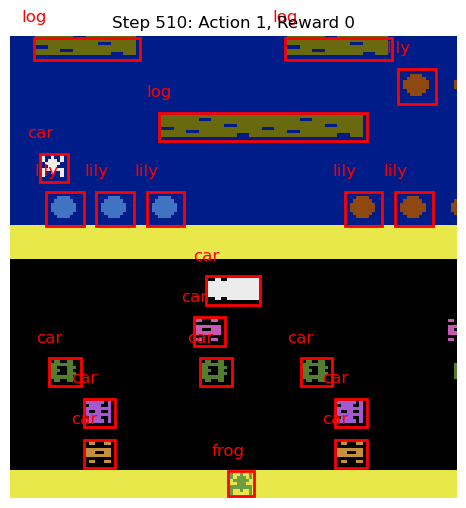

Step 520: Action 1, Custom Reward: 0, Total: 1


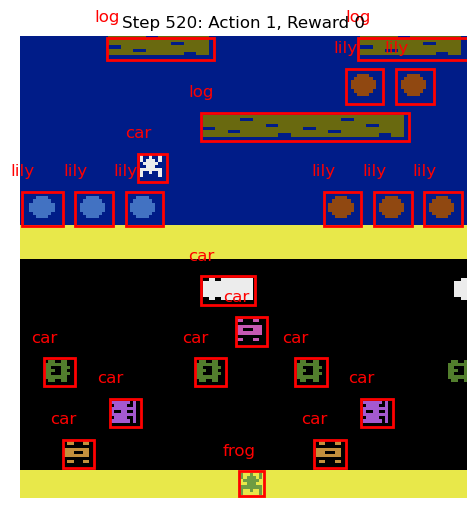

Step 530: Action 1, Custom Reward: 0, Total: 1


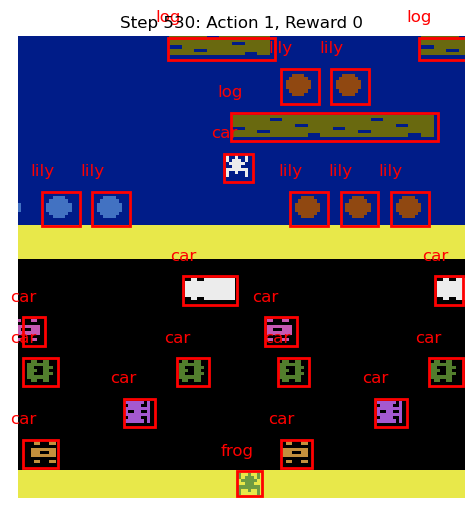

Step 540: Action 1, Custom Reward: 0, Total: 1


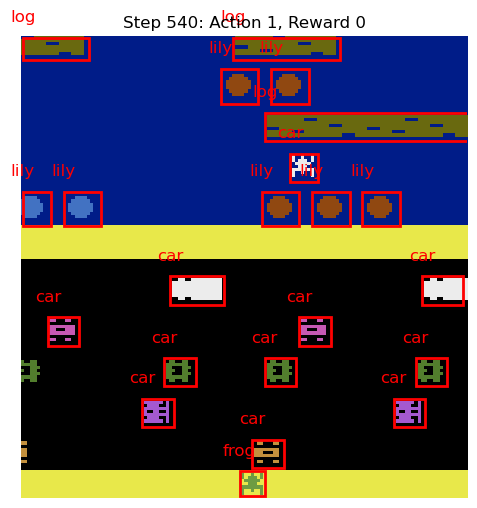

Step 550: Action 1, Custom Reward: 0, Total: 1


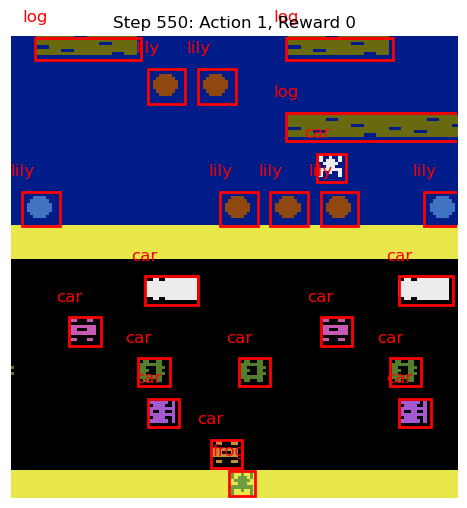

Step 560: Action 1, Custom Reward: 0, Total: 1


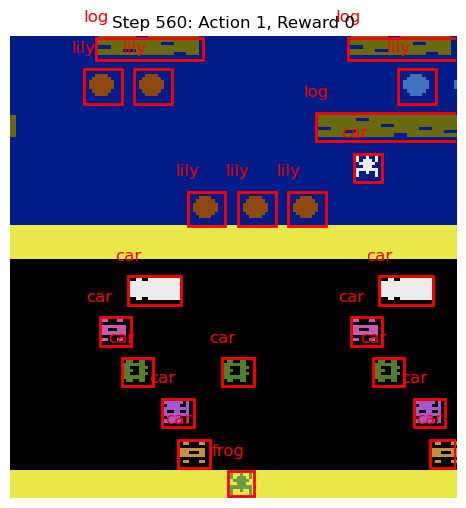

Step 570: Action 1, Custom Reward: 0, Total: 1


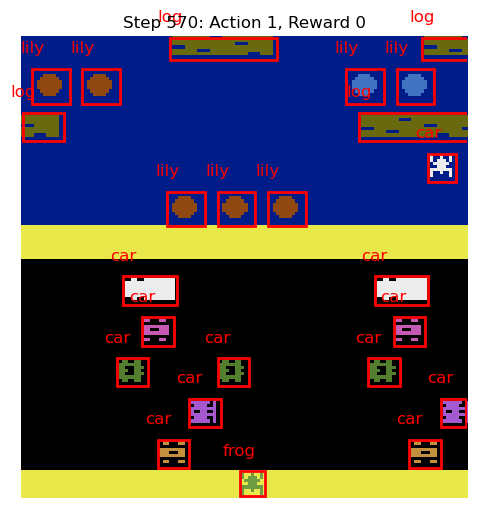

Step 580: Action 1, Custom Reward: 0, Total: 1


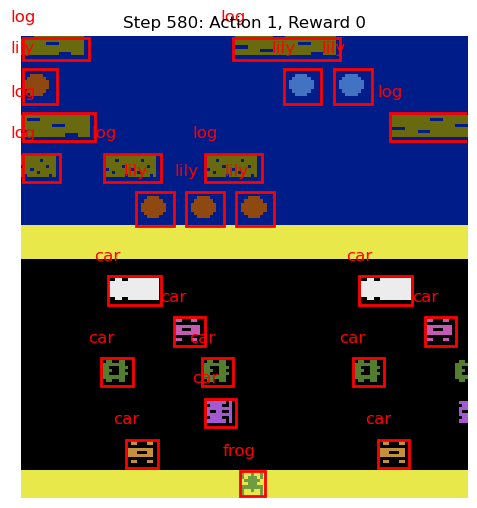

Step 590: Action 1, Custom Reward: 0, Total: 1


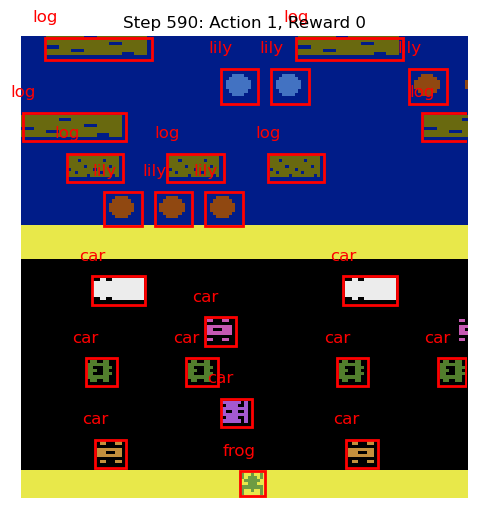

Step 600: Action 1, Custom Reward: 0, Total: 1


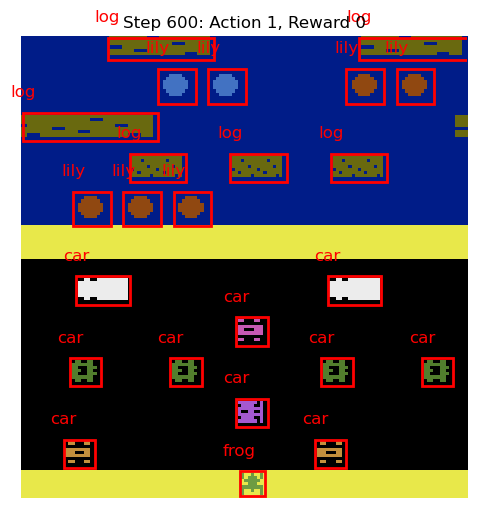

Step 610: Action 1, Custom Reward: 0, Total: 1


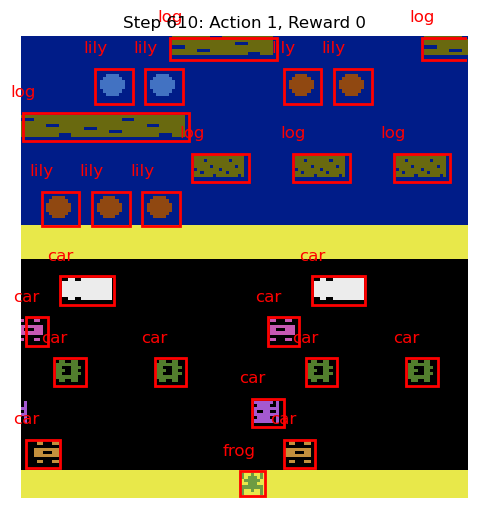

Step 620: Action 1, Custom Reward: 0, Total: 1


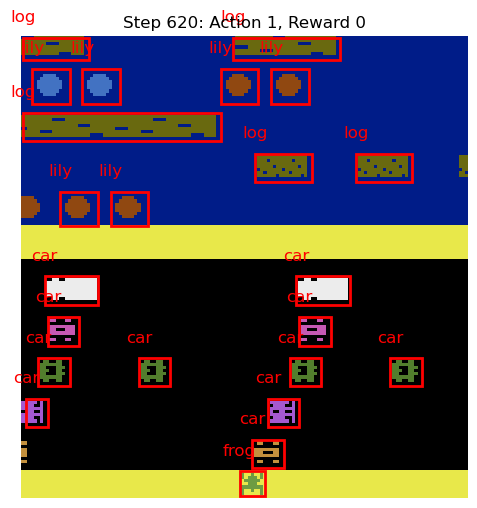

Step 630: Action 1, Custom Reward: 0, Total: 1


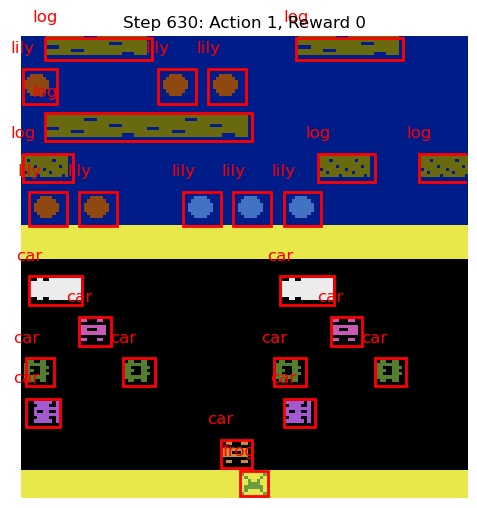

Step 640: Action 1, Custom Reward: 0, Total: 1


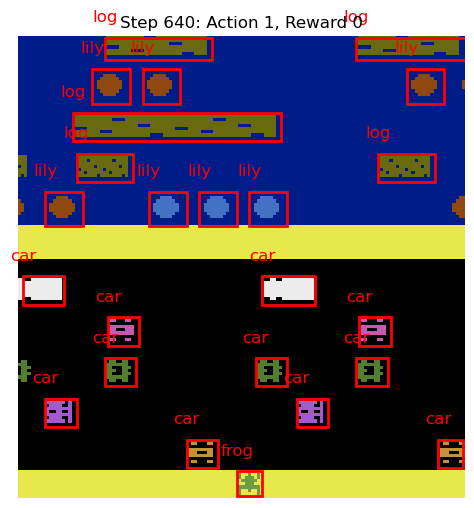

Step 650: Action 1, Custom Reward: 0, Total: 1


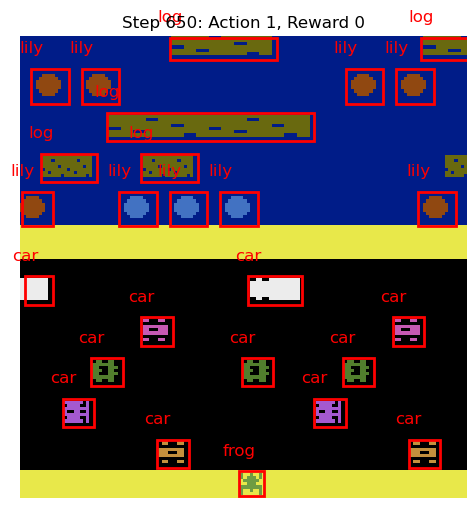

Step 660: Action 1, Custom Reward: 0, Total: 1


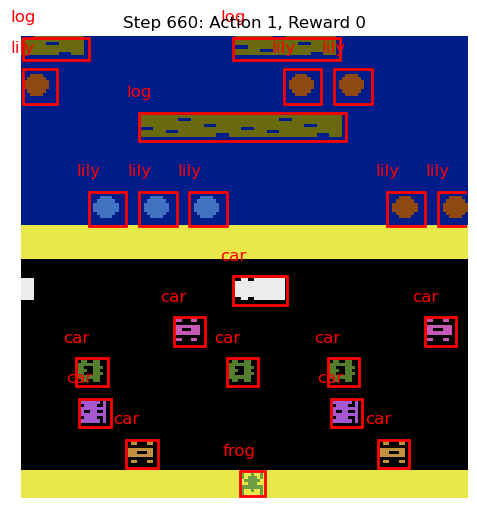

Step 670: Action 1, Custom Reward: 0, Total: 1


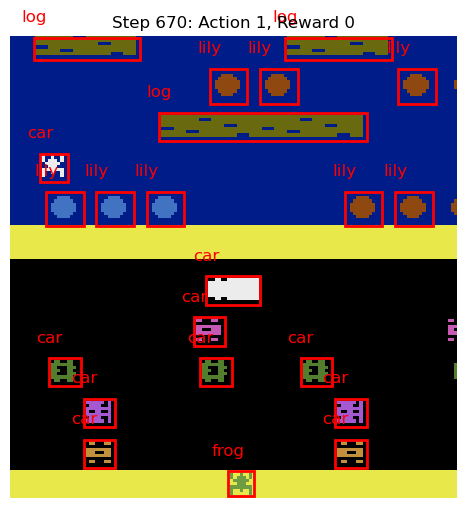

Step 680: Action 1, Custom Reward: 0, Total: 1


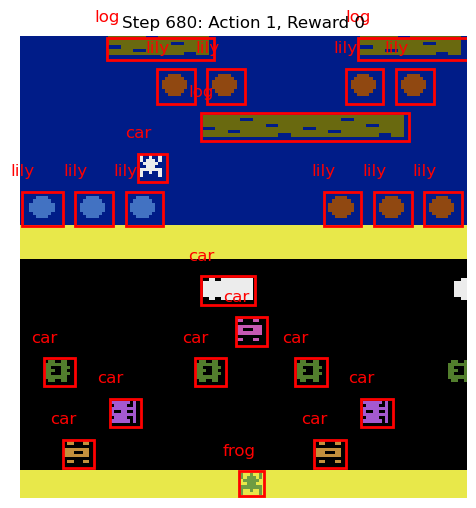

Step 690: Action 1, Custom Reward: 0, Total: 1


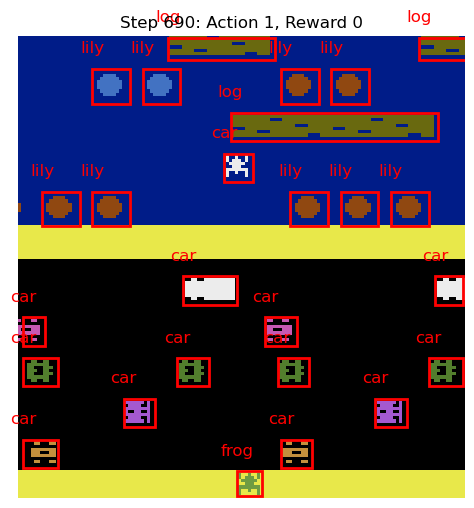

Step 700: Action 1, Custom Reward: 0, Total: 1


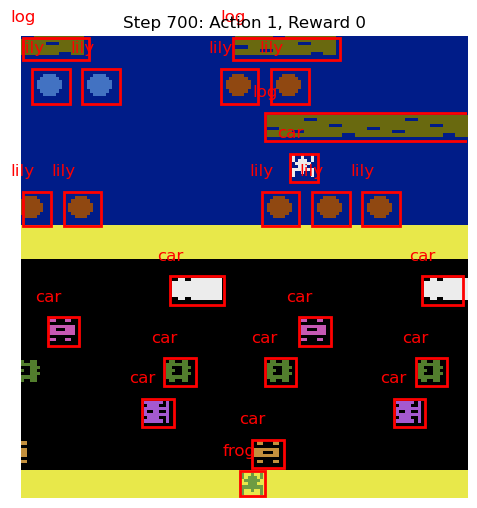

Step 710: Action 1, Custom Reward: 0, Total: 1


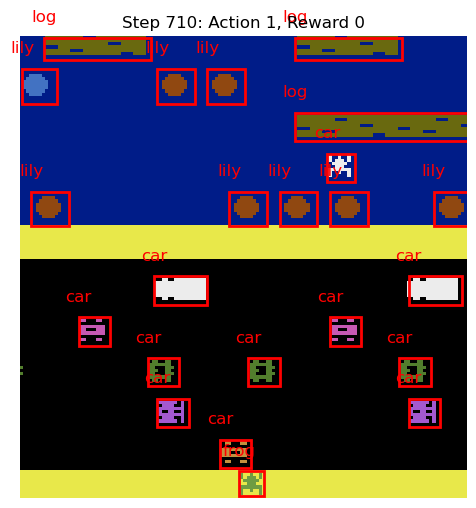

Step 720: Action 1, Custom Reward: 0, Total: 1


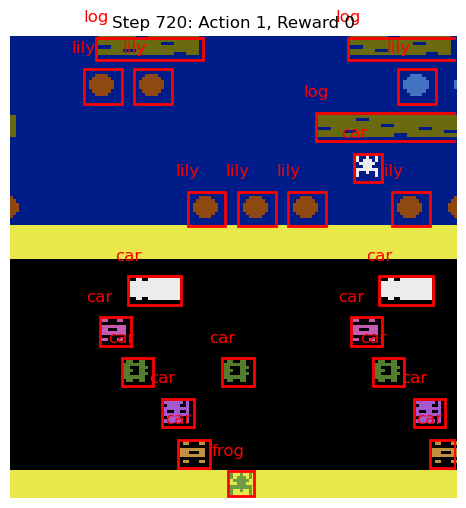

Step 730: Action 1, Custom Reward: 0, Total: 1


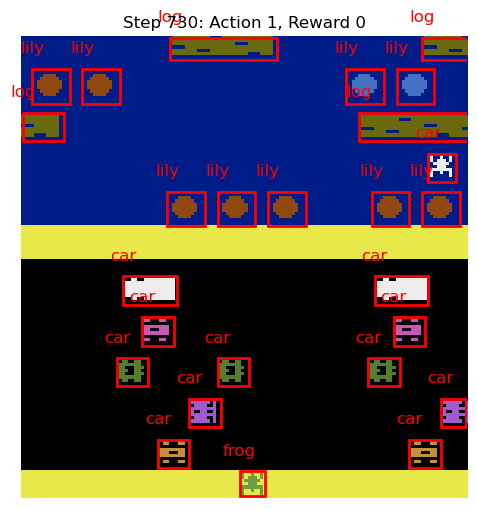

Step 740: Action 1, Custom Reward: 0, Total: 1


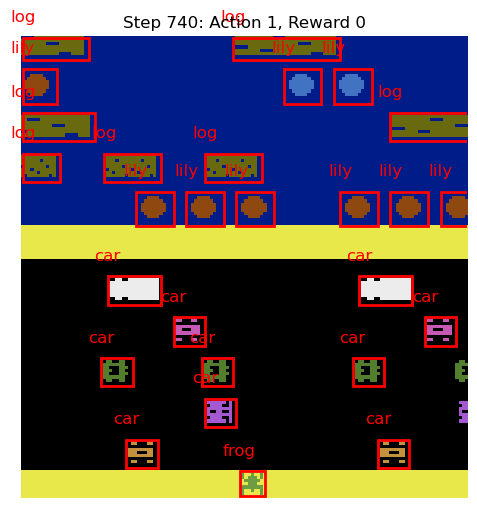

Step 750: Action 1, Custom Reward: 0, Total: 1


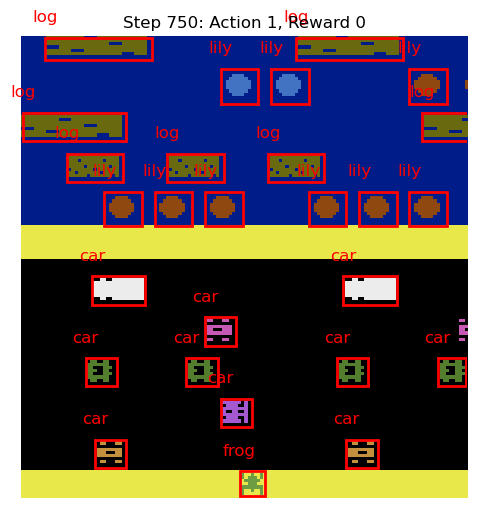

Step 760: Action 1, Custom Reward: 0, Total: 1


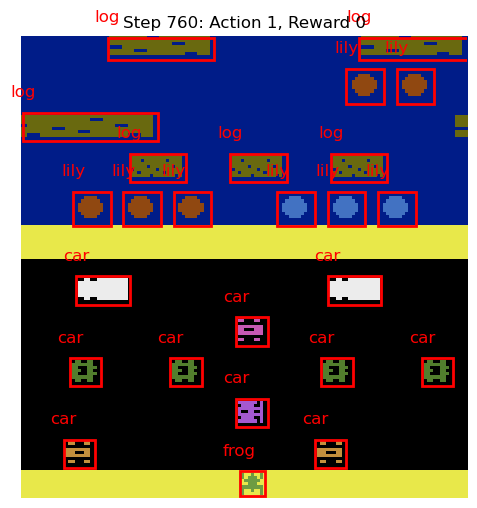

Step 770: Action 1, Custom Reward: 0, Total: 1


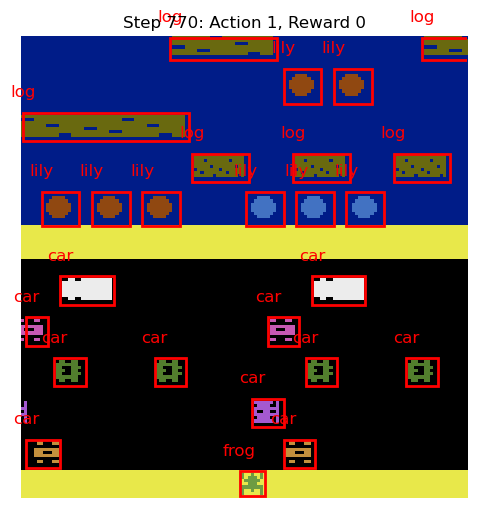

Step 780: Action 1, Custom Reward: 0, Total: 1


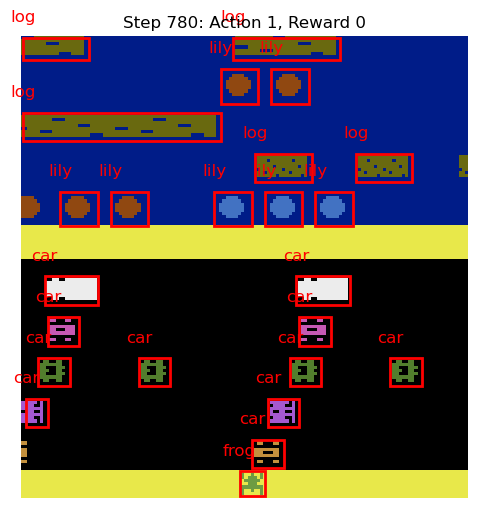

Step 790: Action 1, Custom Reward: 0, Total: 1


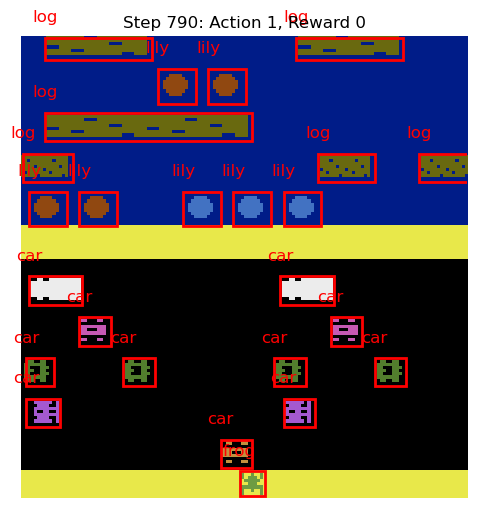

Step 800: Action 1, Custom Reward: 0, Total: 1


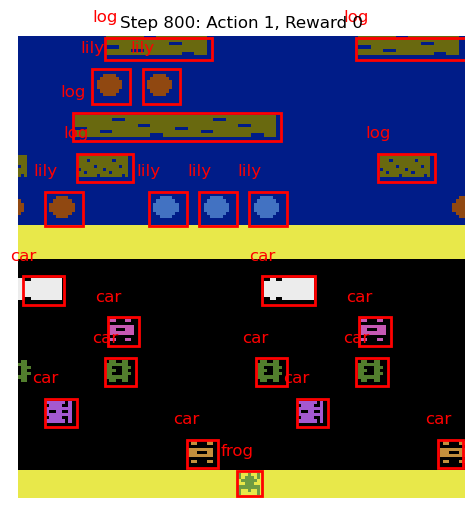

Step 810: Action 1, Custom Reward: 0, Total: 1


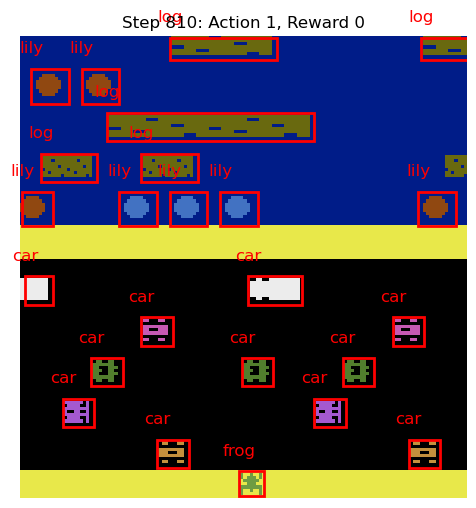

Step 820: Action 1, Custom Reward: 0, Total: 1


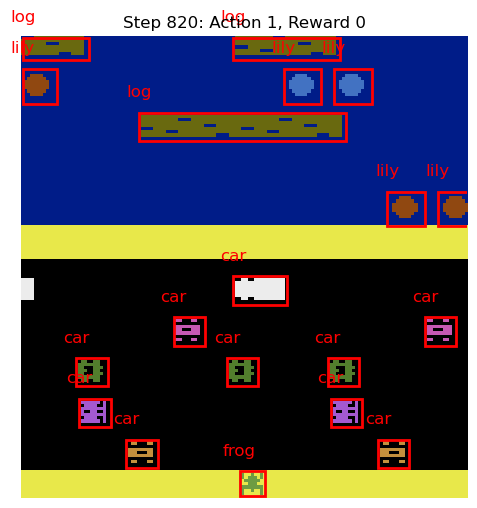

Step 830: Action 1, Custom Reward: 0, Total: 1


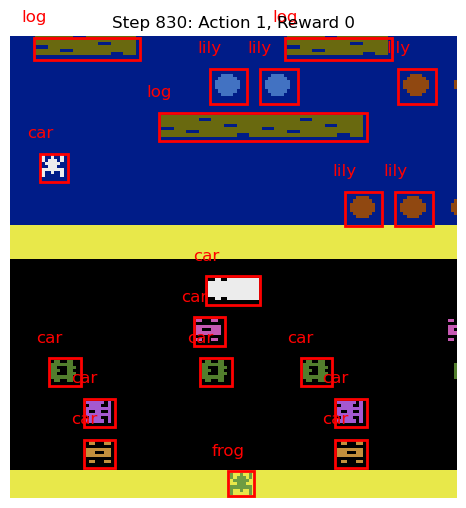

Step 840: Action 1, Custom Reward: 0, Total: 1


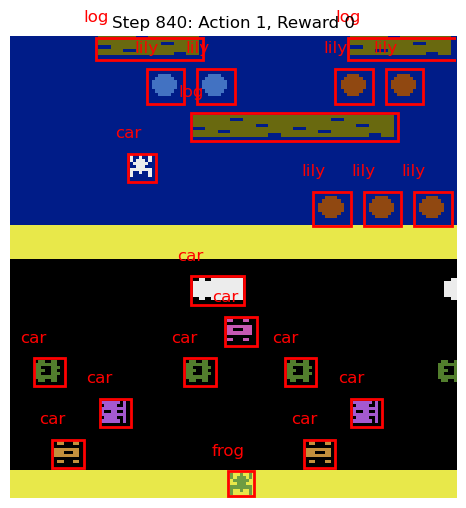

Step 850: Action 1, Custom Reward: 0, Total: 1


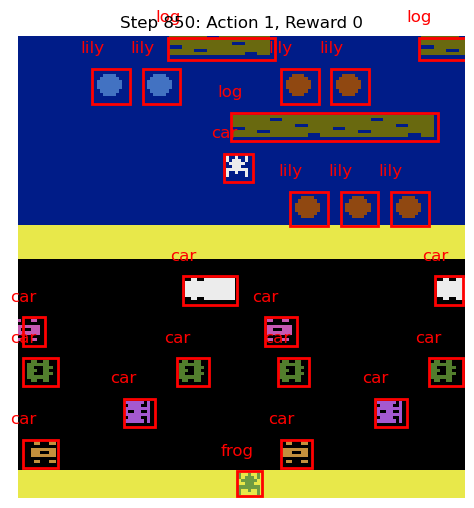

Step 860: Action 1, Custom Reward: 0, Total: 1


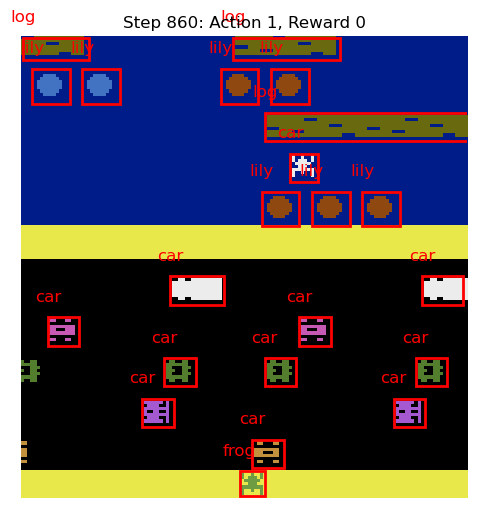

Step 870: Action 1, Custom Reward: 0, Total: 1


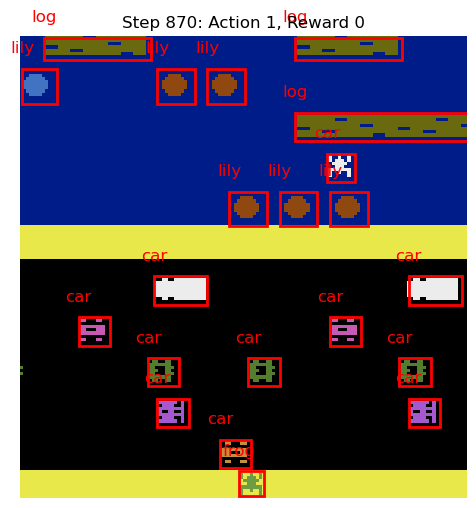

Step 880: Action 1, Custom Reward: 0, Total: 1


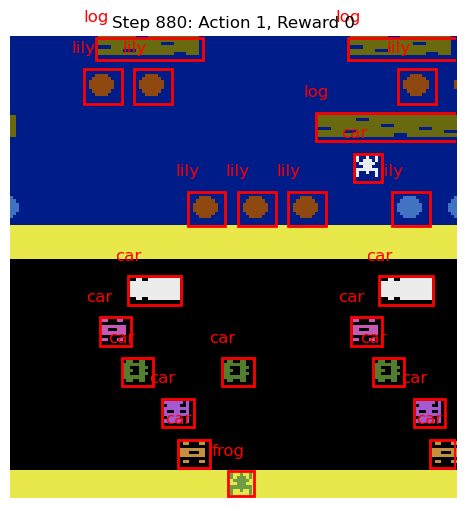

Step 890: Action 1, Custom Reward: 0, Total: 1


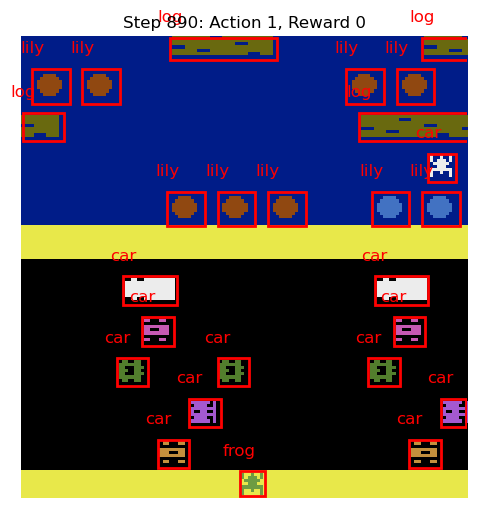

Step 900: Action 1, Custom Reward: 0, Total: 1


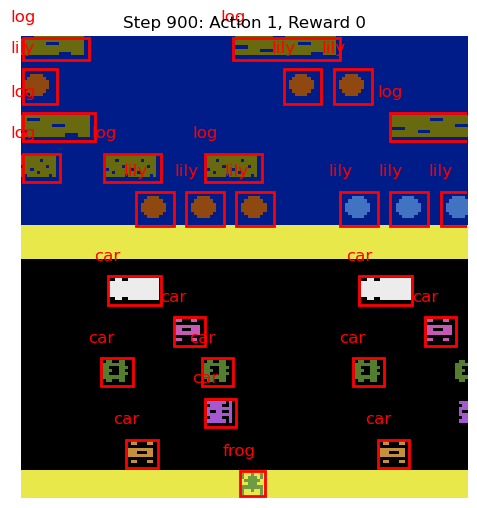

Step 910: Action 1, Custom Reward: 0, Total: 1


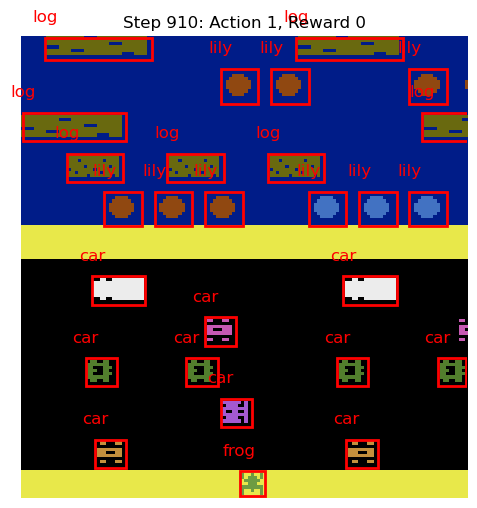

Step 920: Action 1, Custom Reward: 0, Total: 1


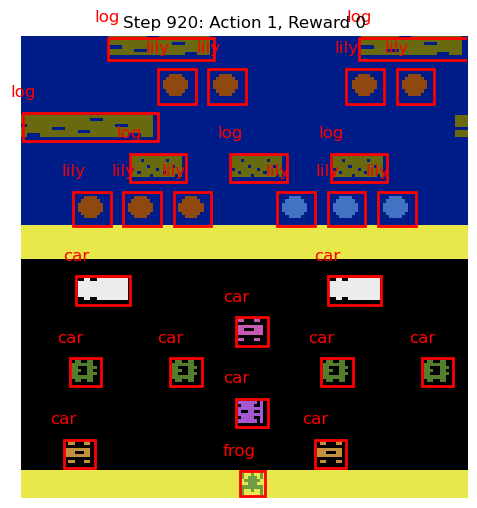

Step 930: Action 1, Custom Reward: 0, Total: 1


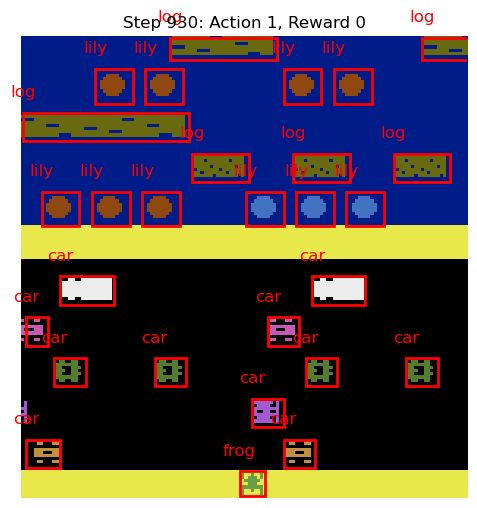

Step 940: Action 1, Custom Reward: 0, Total: 1


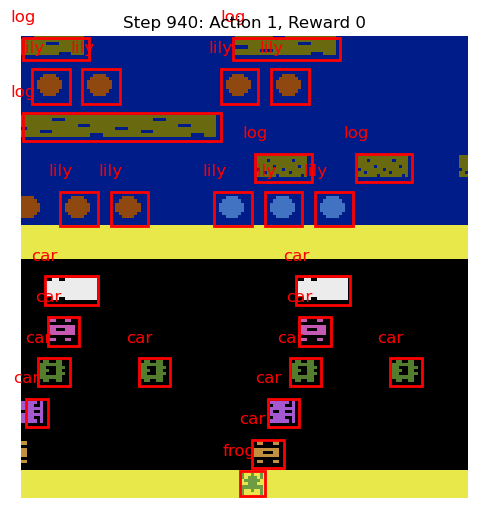

Step 950: Action 1, Custom Reward: 0, Total: 1


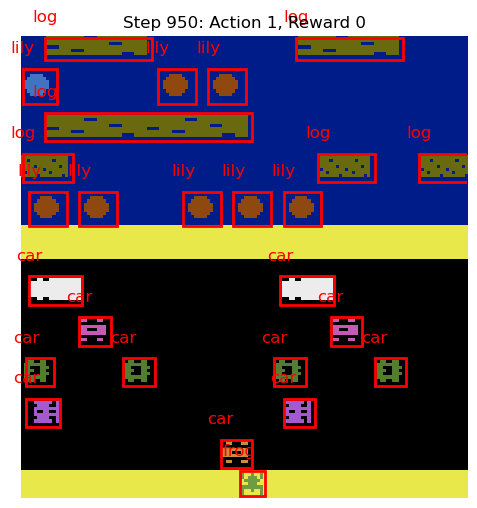

Step 960: Action 1, Custom Reward: 0, Total: 1


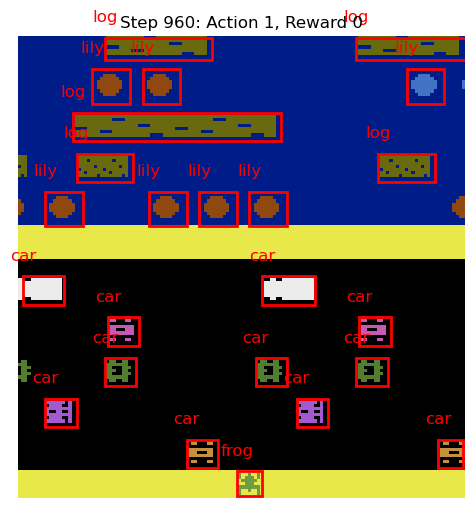

Step 970: Action 1, Custom Reward: 0, Total: 1


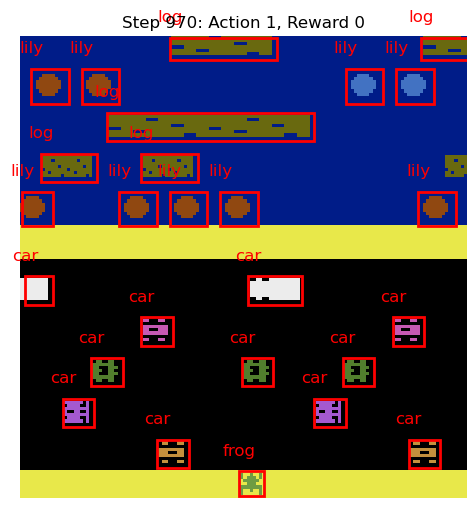

Step 980: Action 1, Custom Reward: 0, Total: 1


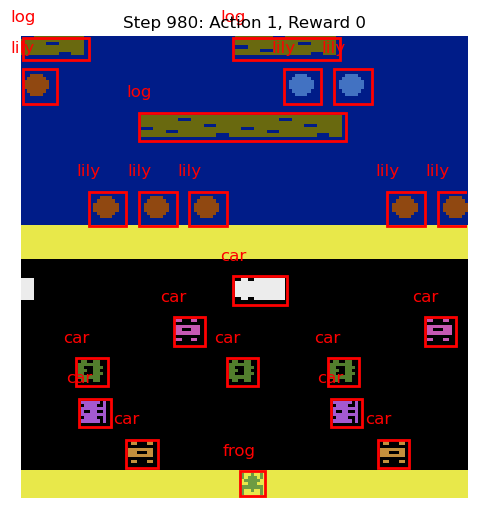

Step 990: Action 1, Custom Reward: 0, Total: 1


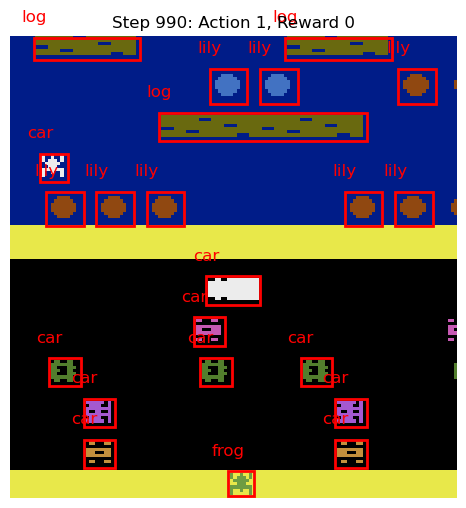

In [48]:
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
   # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def choose_action(detected_objects):
    # Find frog's position
    frog_pos = None
    for label, (x, y, w, h) in detected_objects:
        if label == "frog":
            frog_pos = (x + w/2, y + h/2)  # Center of frog
            break
    
    if frog_pos is None:
        return 0  # No action if frog not found
    
    # Simple logic: move up by default, but avoid obstacles
    for label, (x, y, w, h) in detected_objects:
        if label == "car" and abs(y - frog_pos[1]) < 20:  # Car in nearby row
            if x < frog_pos[0] and x + w > frog_pos[0] - 30:  # Car approaching from left
                return 3  # Move right
            if x > frog_pos[0] and x < frog_pos[0] + 30:  # Car approaching from right
                return 2  # Move left
    
    return 1  # Default: move up

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car"""
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if "car" in label:
            # Check for overlap between frog and car
            if (frog_x < x + w and 
                frog_x + frog_w > x and 
                frog_y < y + h and 
                frog_y + frog_h > y):
                return True
    
    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if "log" in label or "lillies" in label:
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

# Import necessary libraries
from skimage import measure

# Create environment
env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
obs, _ = env.reset()

# Generate Fibonacci sequence for rewards
fibonacci = generate_fibonacci(20)  # Generate first 20 Fibonacci numbers

# Track frog's position
last_frog_y = None
highest_y_position = float('inf')  # Start with high value (y decreases as frog moves up)
fib_index = 0

# Track rewards
custom_reward = 0
total_reward = 0

# Main game loop
num_steps = 1000  # Run for 1000 steps
for step in range(num_steps):
    # Crop the image
    cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
    frame = np.array(cropped_image)
    screen_height = cropped_image.shape[0]
    
    # Detect objects using your original method
    detected_objects = detect_objects(frame, object_colors)
    
    # Find frog
    frog_bbox = None
    for label, bbox in detected_objects:
        if label == "frog":
            frog_bbox = bbox  # (x, y, w, h)
            break
    
    # Calculate custom reward
    custom_reward = 0
    
    if frog_bbox:
        current_frog_y = frog_bbox[1]  # y-coordinate
        
        # Check for vertical progress (Fibonacci reward)
        if last_frog_y is not None:
            # In Frogger, a lower y value means the frog moved up the screen
            if current_frog_y < highest_y_position:
                # Calculate how many rows up the frog moved
                rows_moved = int((highest_y_position - current_frog_y) / 10)  # Approximate row height
                if rows_moved > 0:
                    # Apply Fibonacci rewards for each row
                    for i in range(rows_moved):
                        reward_index = min(fib_index + i, len(fibonacci) - 1)
                        custom_reward += fibonacci[reward_index]
                    fib_index = min(fib_index + rows_moved, len(fibonacci) - 1)
                    highest_y_position = current_frog_y
        else:
            # Initialize on first detection
            highest_y_position = current_frog_y
        
        # Update last known position
        last_frog_y = current_frog_y
        
        # Check for collision with cars (-100 penalty)
        if is_collision_with_car(frog_bbox, detected_objects):
            custom_reward -= 100
            print(f"Step {step}: Collision with car! Penalty: -100")
        
        # Check if in water without a log/lily (-100 penalty)
        if is_in_water_area(frog_bbox, screen_height):
            if not is_on_safe_object(frog_bbox, detected_objects):
                custom_reward -= 100
                print(f"Step {step}: In water without support! Penalty: -100")
    
    # Choose action based on detected objects
    action = choose_action(detected_objects)
    
    # Take action in environment
    obs, env_reward, terminated, truncated, info = env.step(action)
    
    # Update total custom reward
    total_reward += custom_reward
    
    # Optional: Visualize and print rewards every 10 steps
    if step % 10 == 0:
        print(f"Step {step}: Action {action}, Custom Reward: {custom_reward}, Total: {total_reward}")
        
        plt.figure(figsize=(10, 6))
        plt.imshow(frame)
        ax = plt.gca()
        
        # Draw bounding boxes and labels
        for label, (x, y, w, h) in detected_objects:
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')
        
        plt.title(f'Step {step}: Action {action}, Reward {custom_reward}')
        plt.axis('off')
        plt.show()
    
    # Break the loop if game is over
    if terminated or truncated:
        print(f"Game ended after {step} steps with total custom reward {total_reward}")
        break

env.close()

Training new model...


C:\Users\georg\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

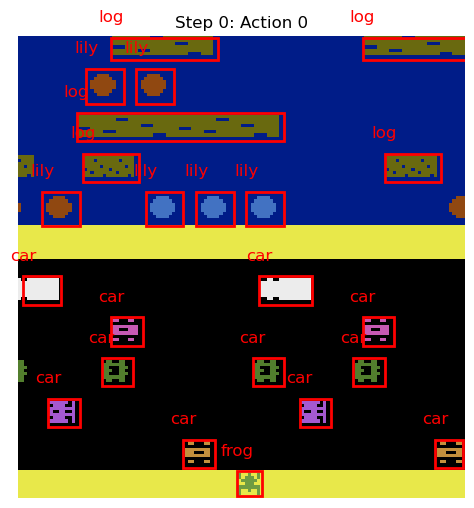

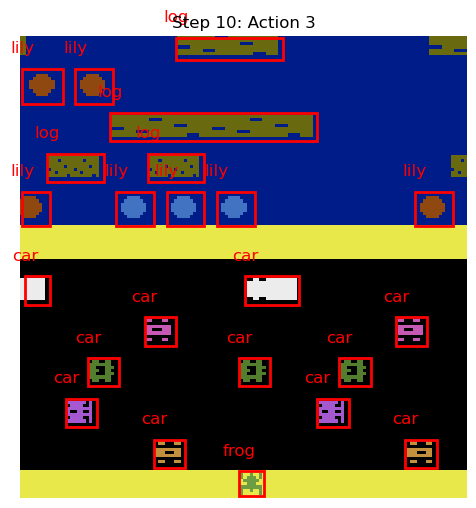

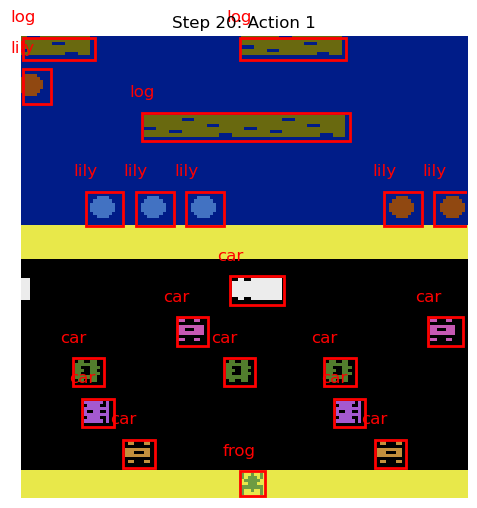

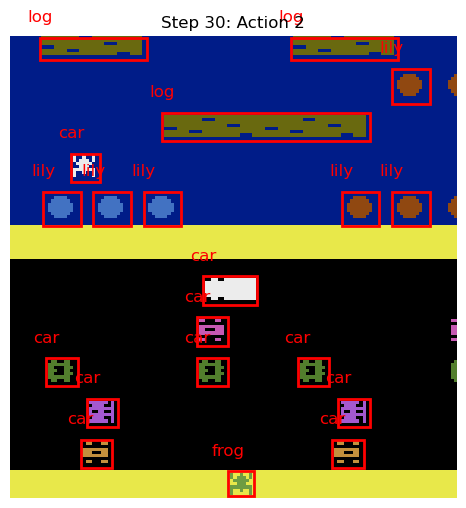

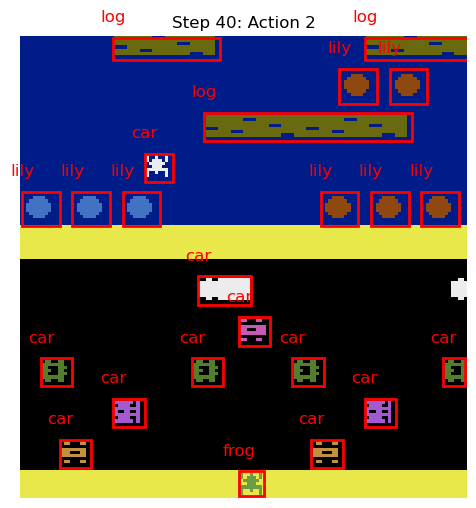

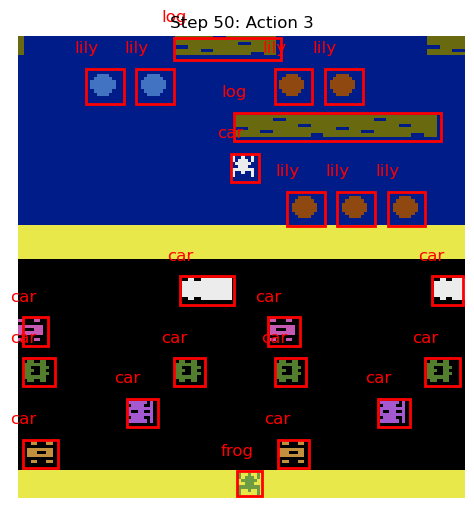

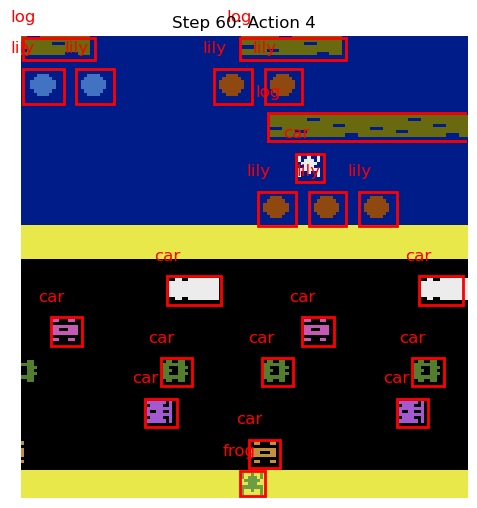

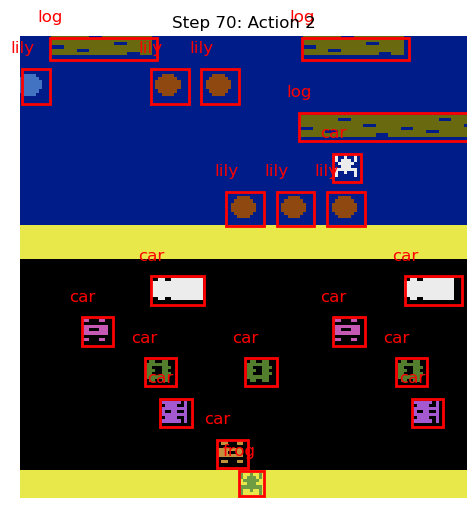

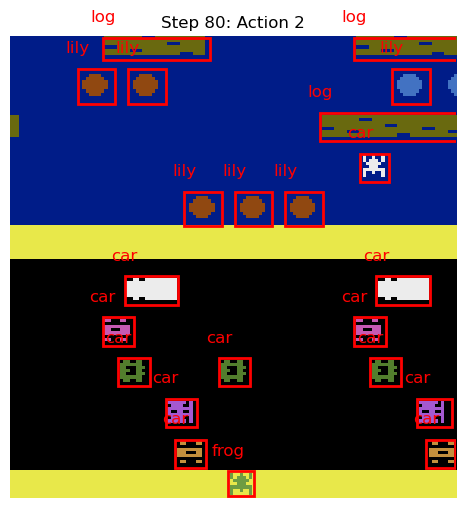

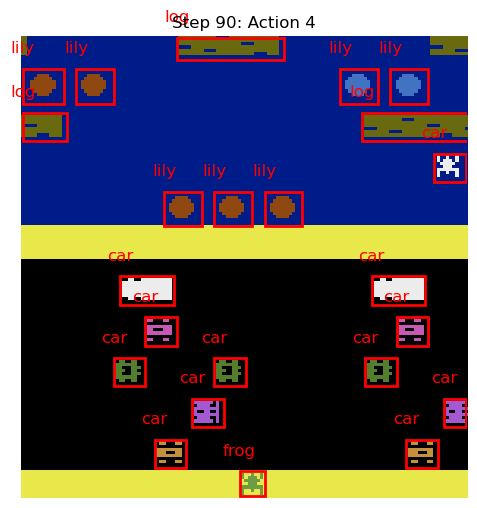

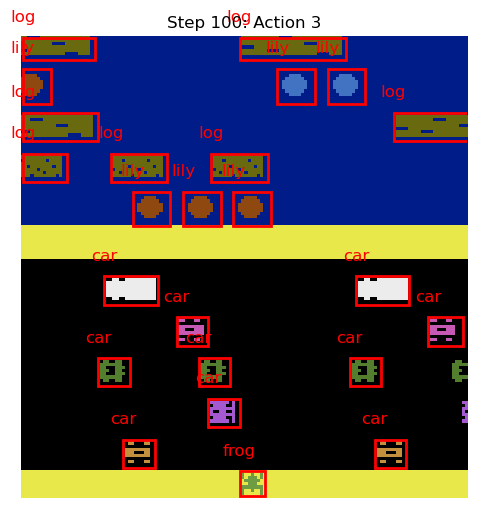

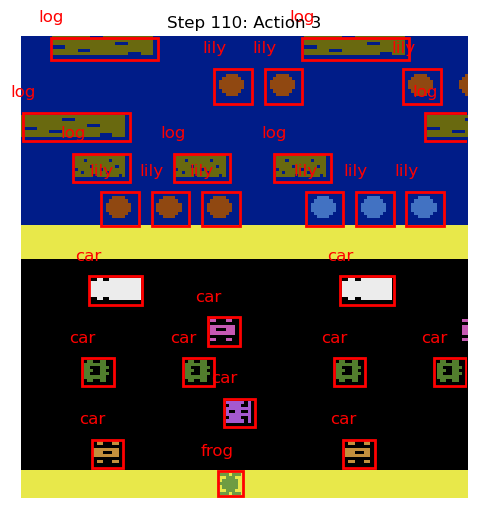

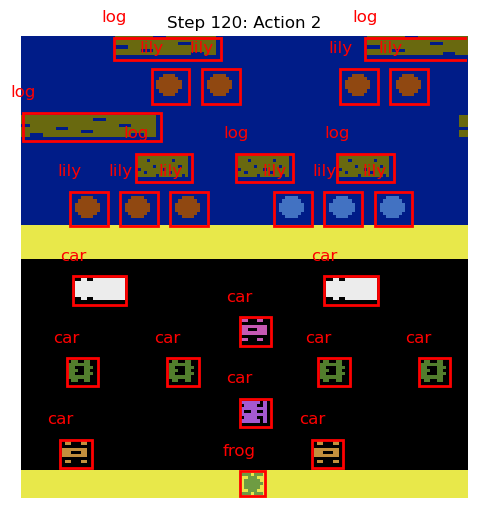

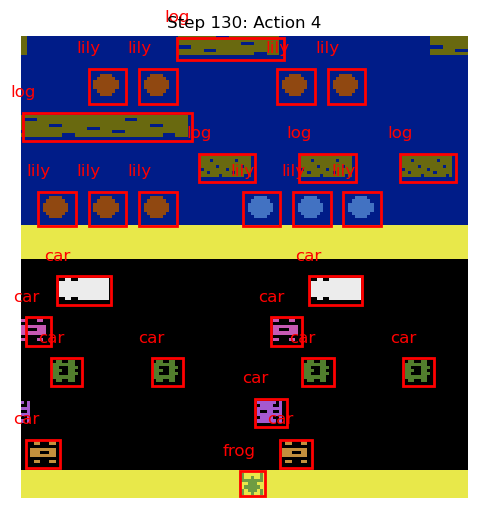

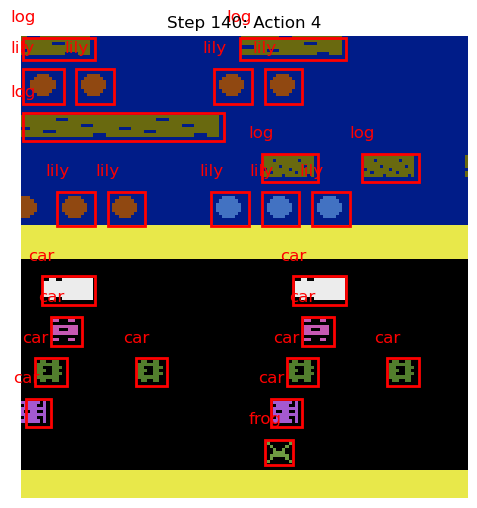

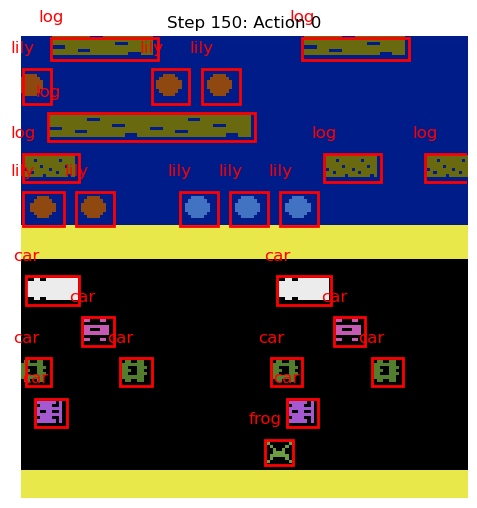

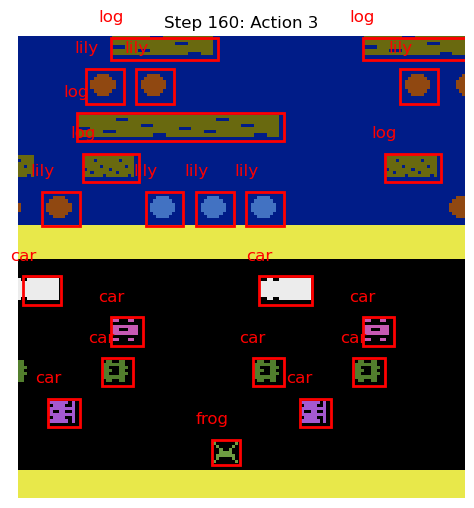

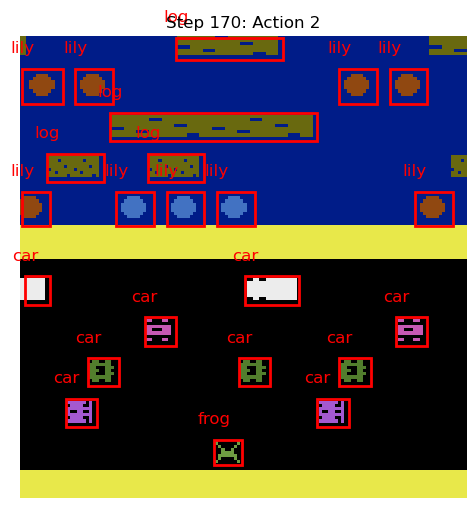

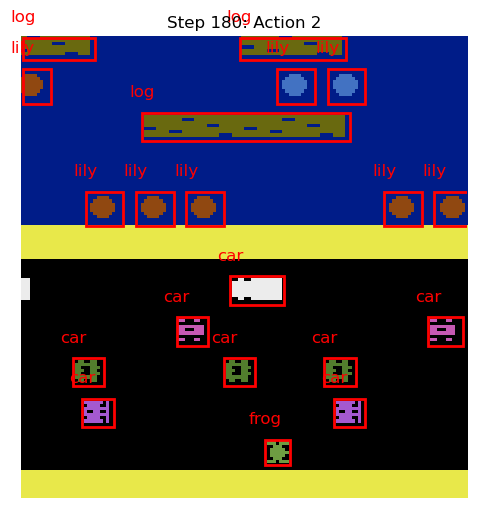

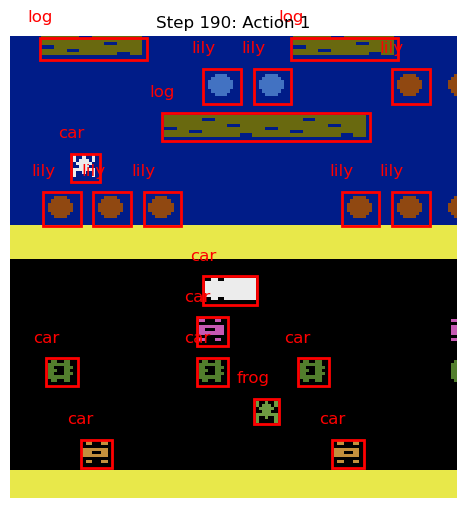

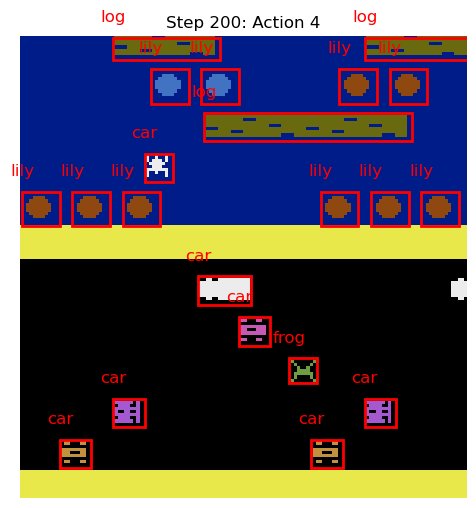

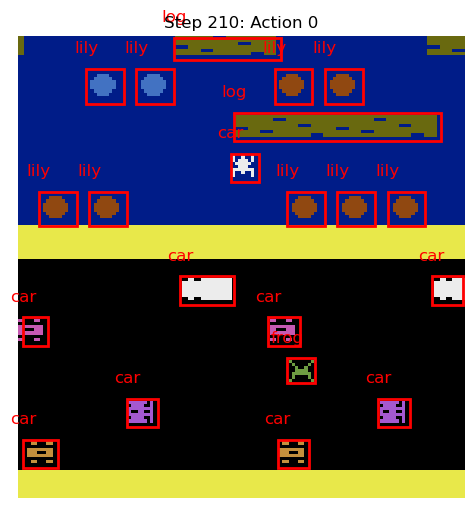

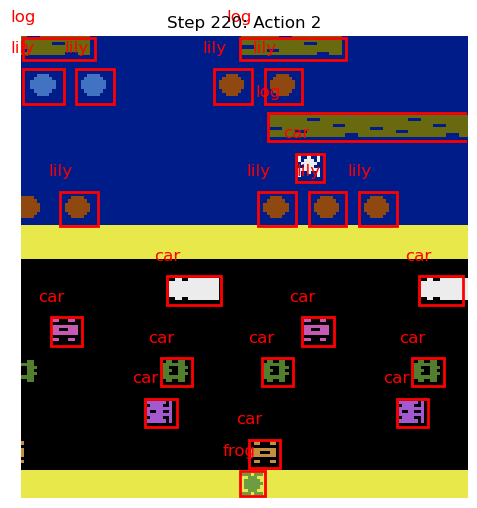

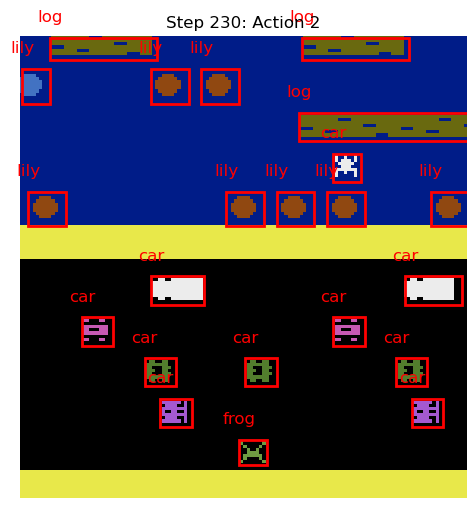

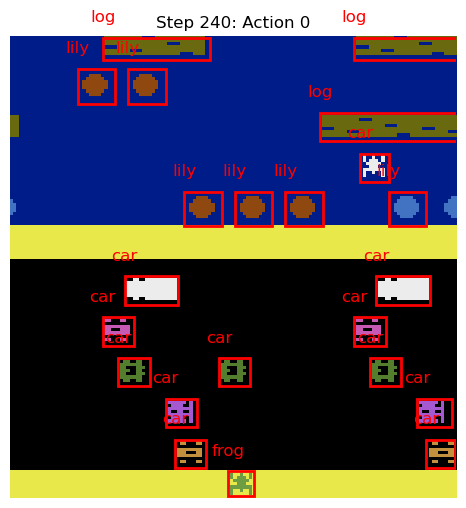

Training Progress:   0%|          | 1/1000 [00:10<3:01:14, 10.89s/it]

Episode: 1/1000, Score: -12.80, Epsilon: 1.0000


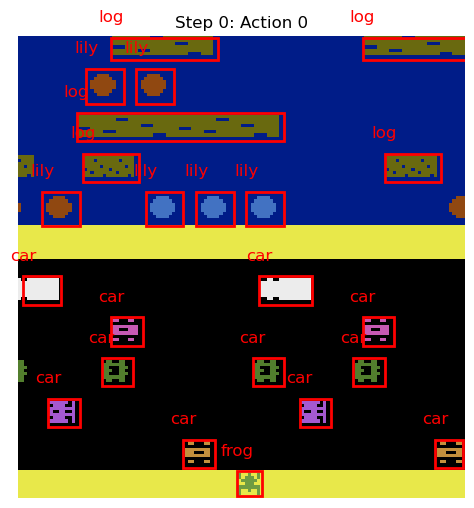

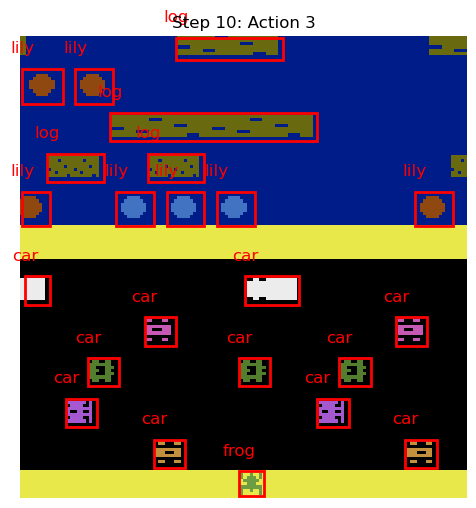

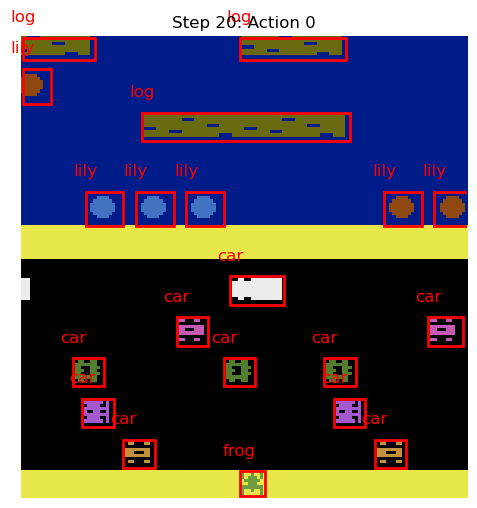

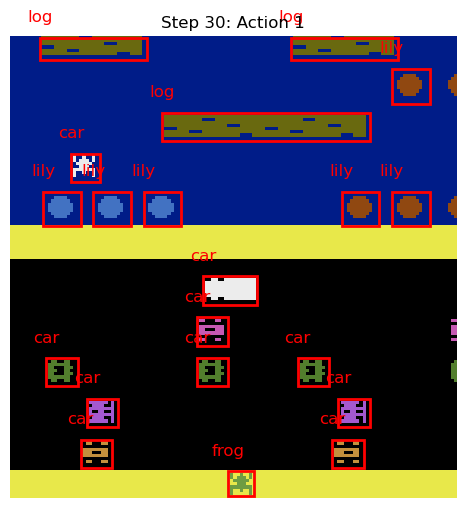

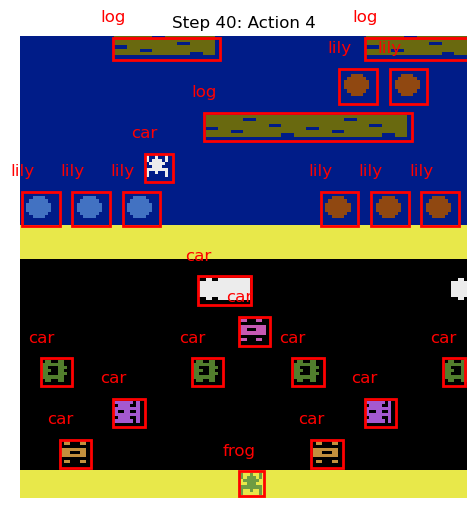

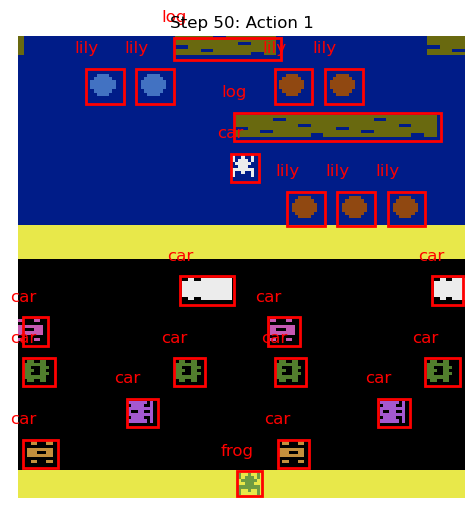

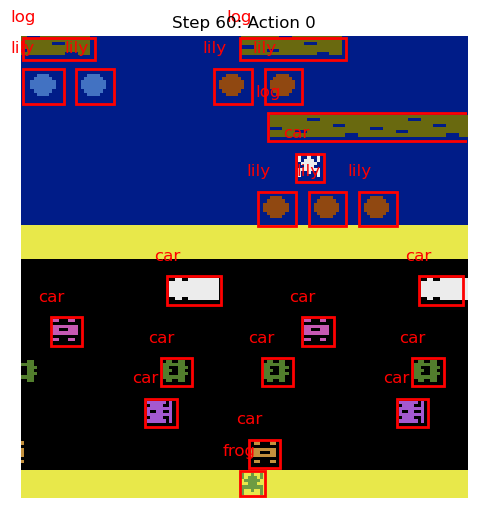

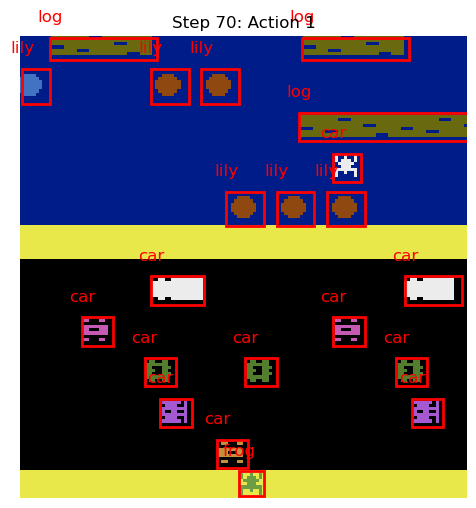

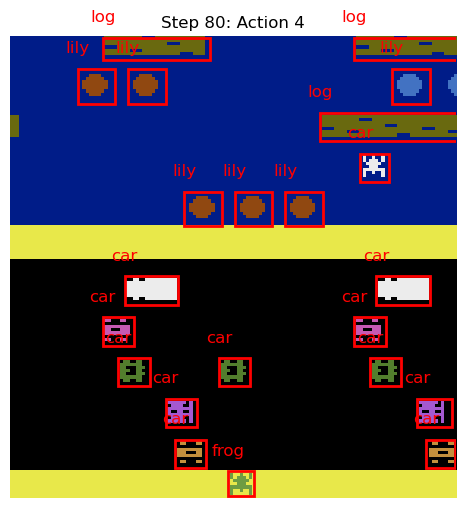

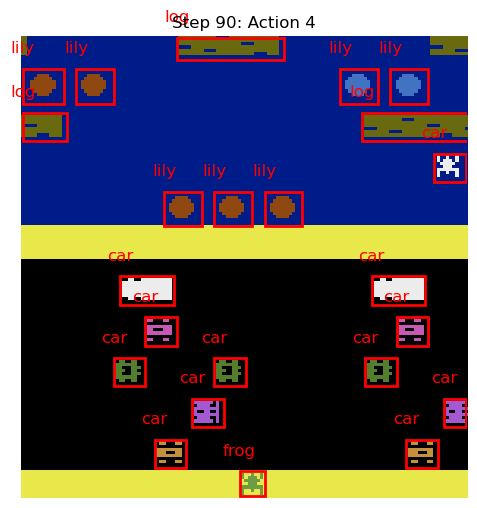

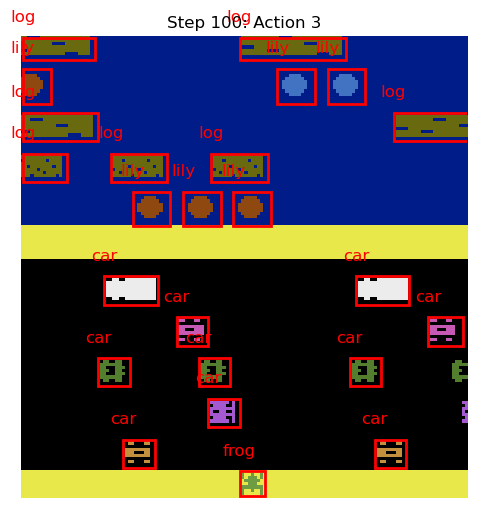

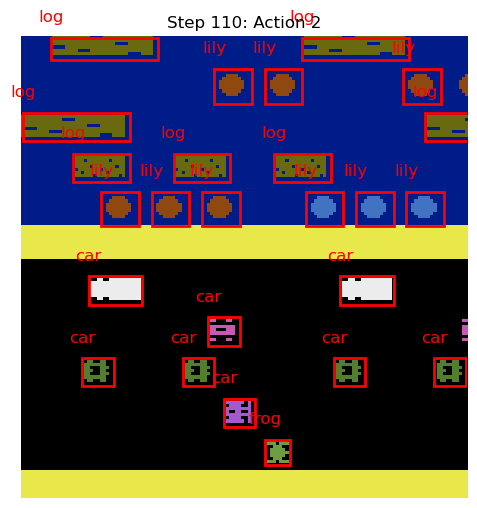

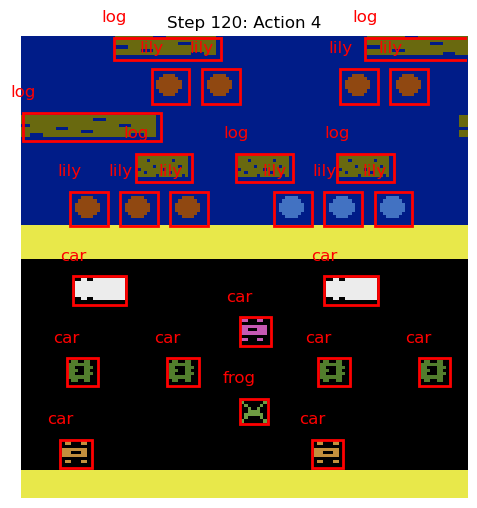

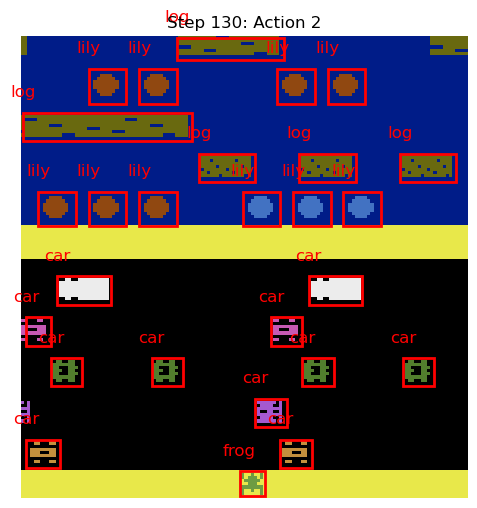

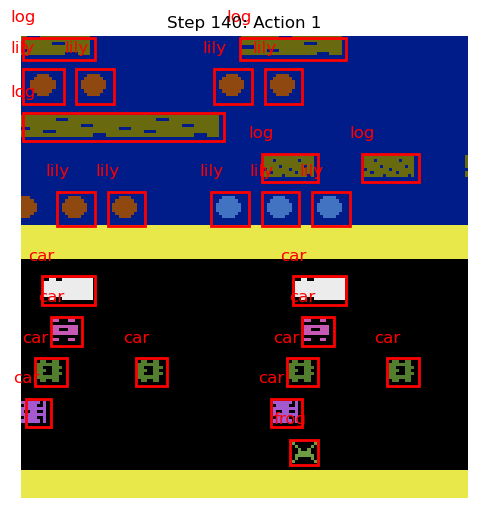

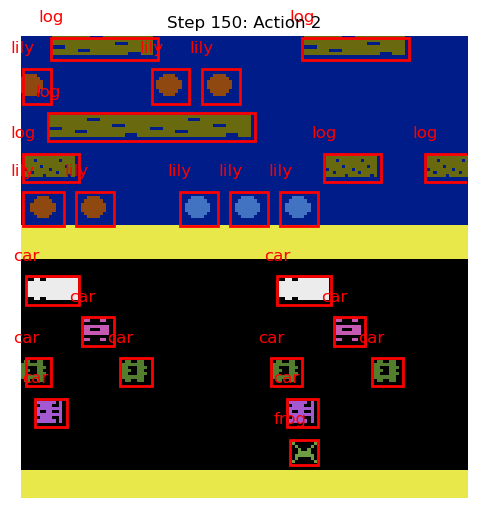

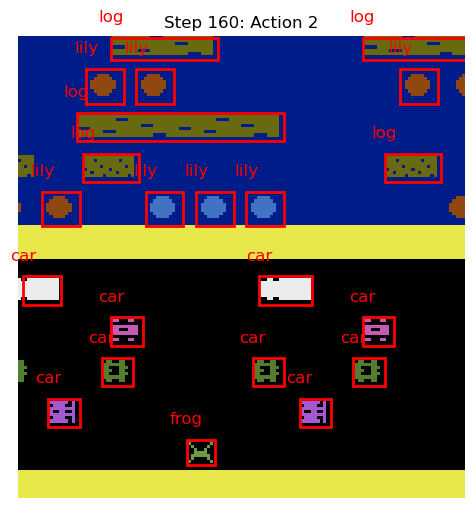

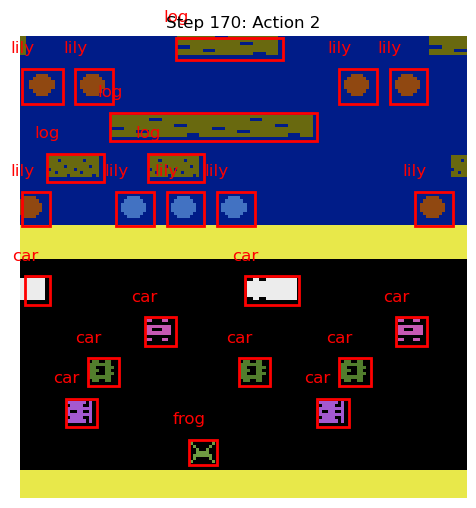

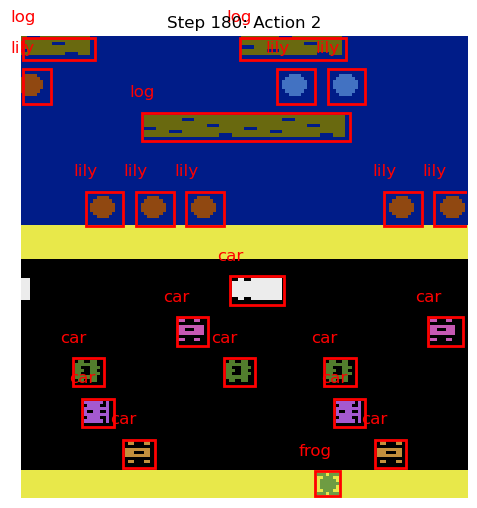

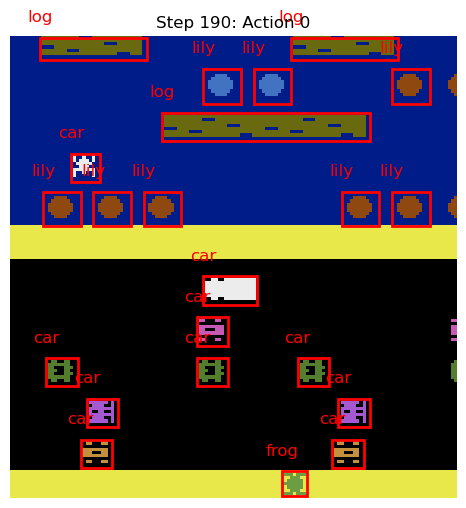

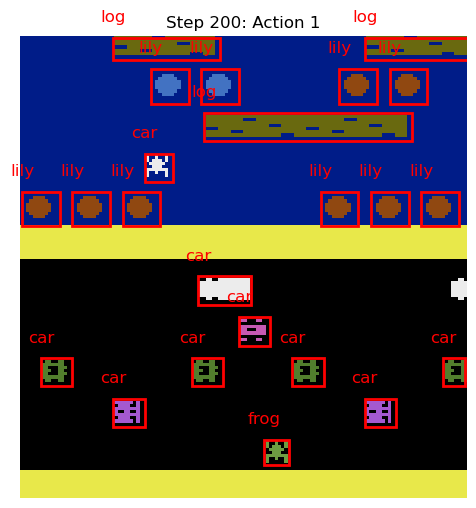

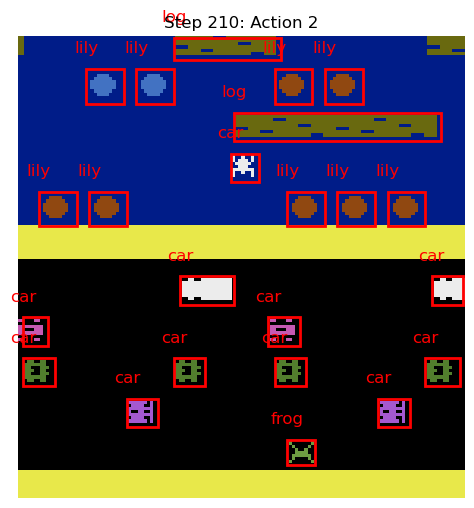

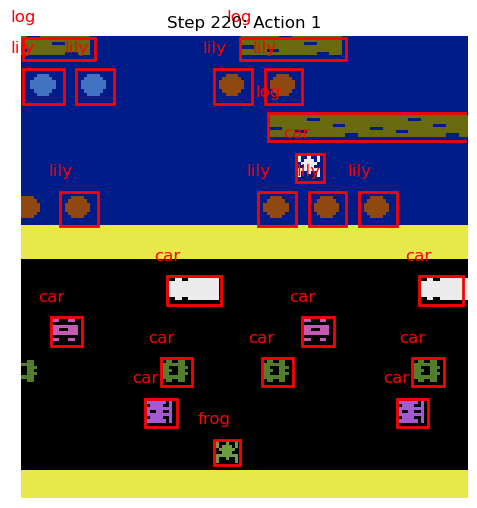

Training Progress:   0%|          | 2/1000 [00:22<3:03:23, 11.03s/it]

Episode: 2/1000, Score: -15.00, Epsilon: 1.0000


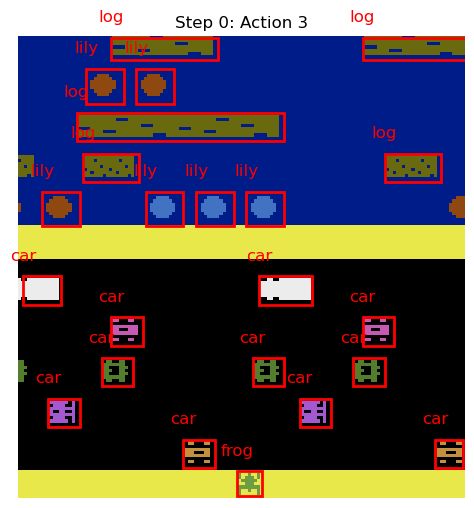

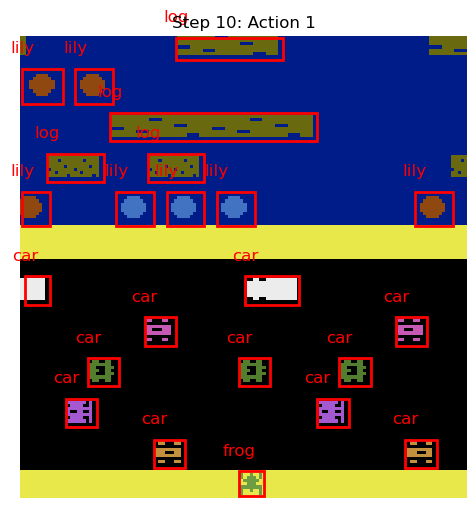

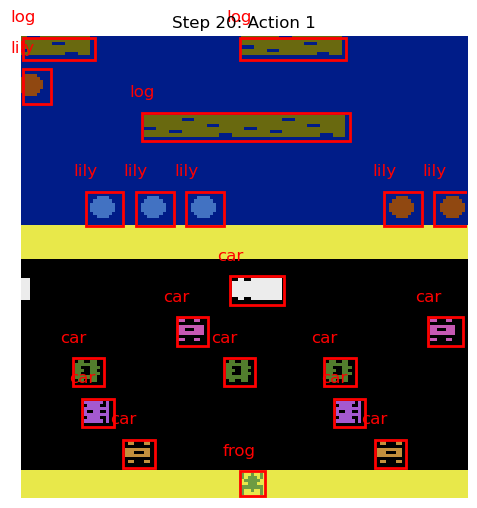

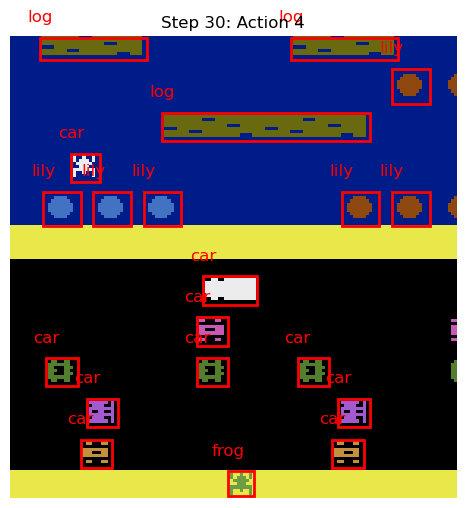

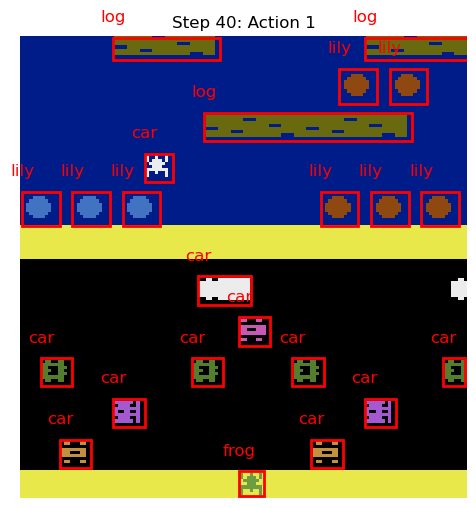

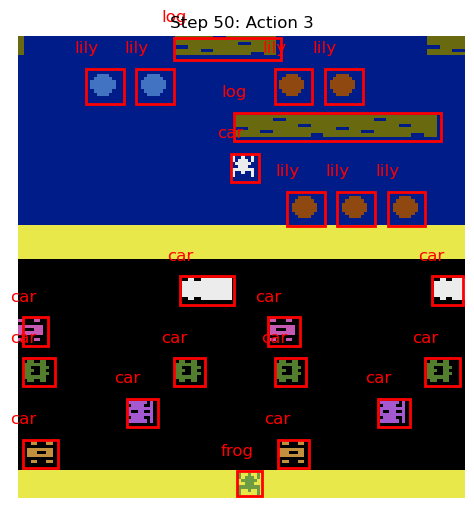

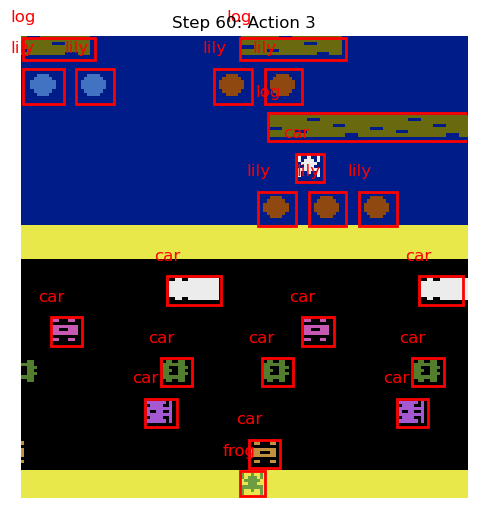

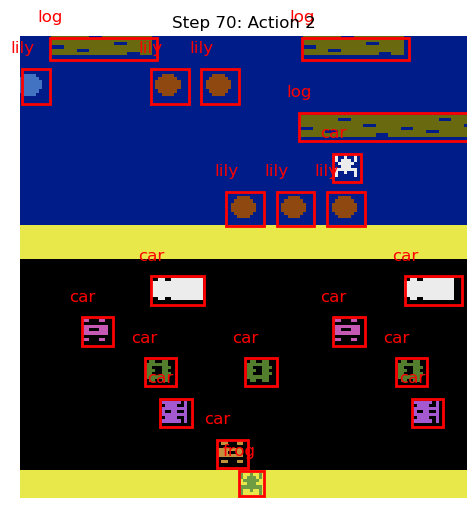

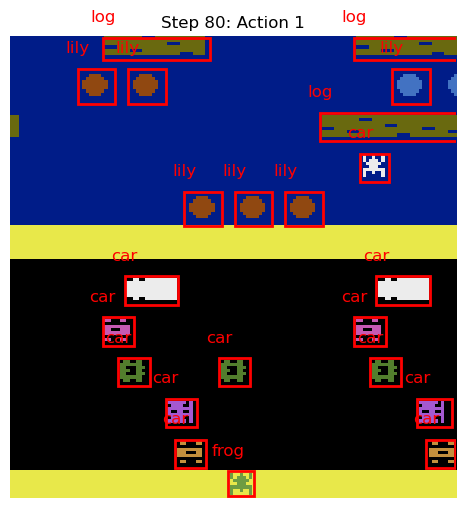

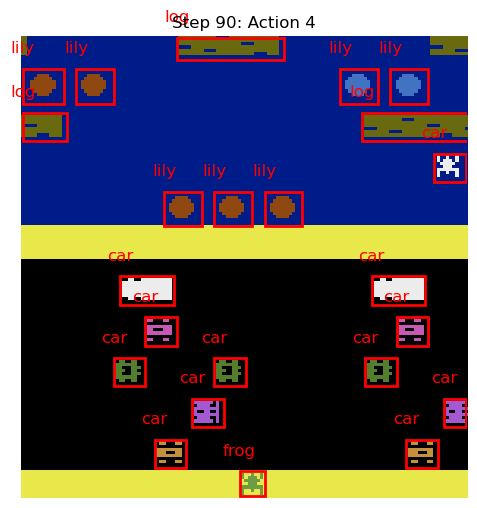

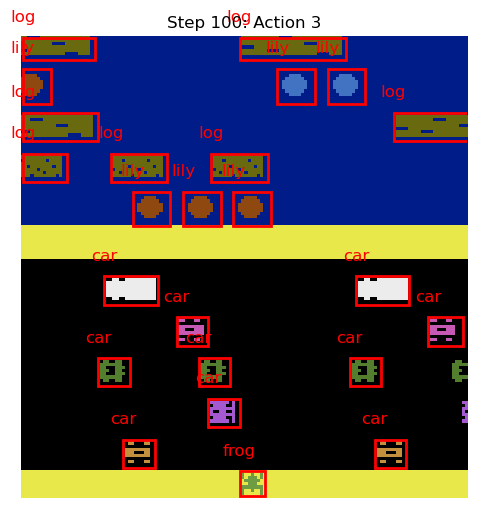

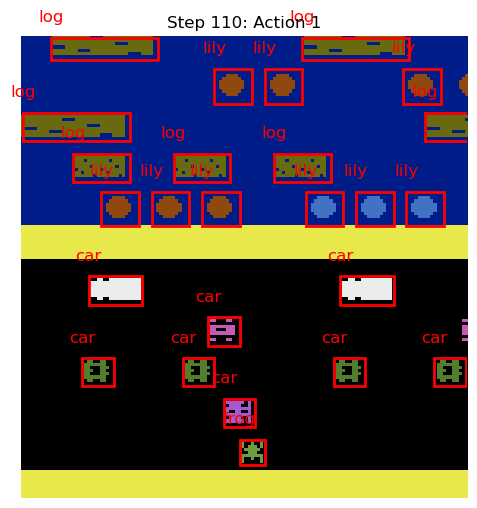

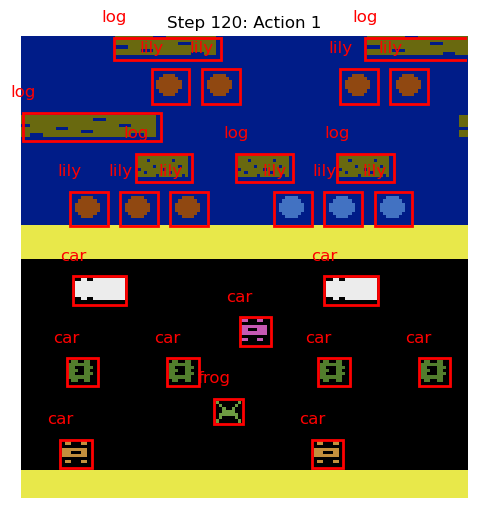

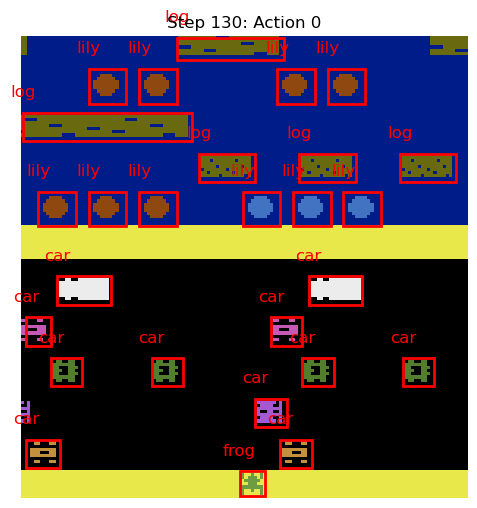

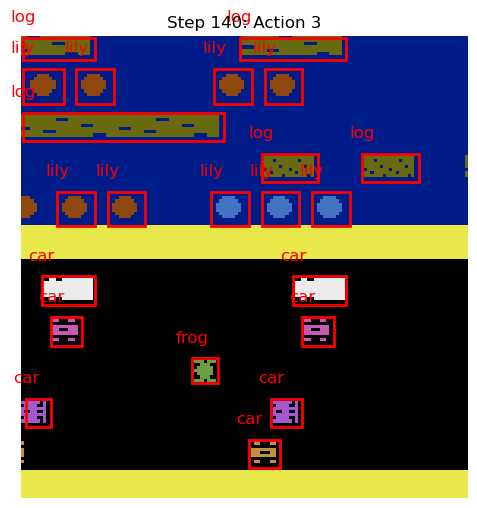

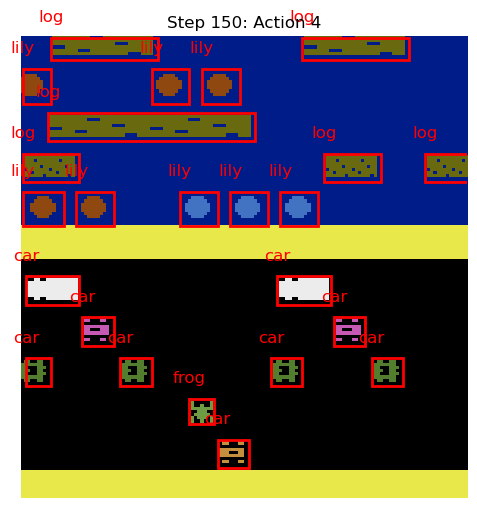

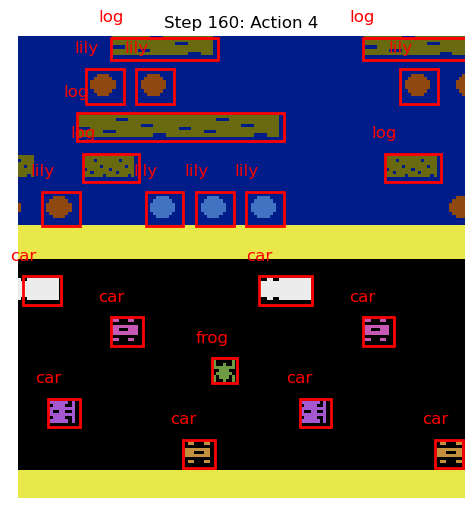

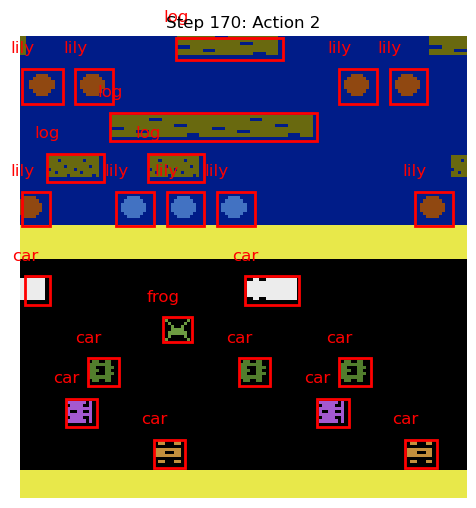

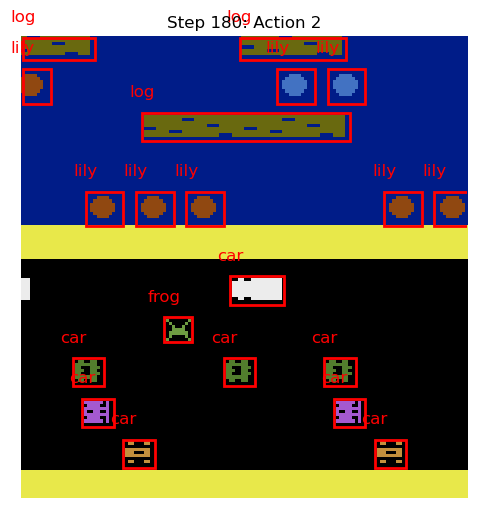

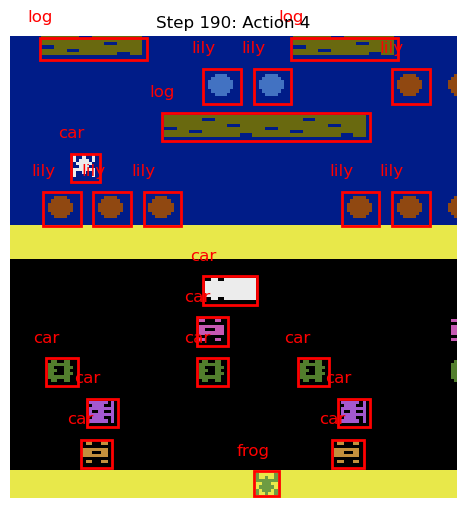

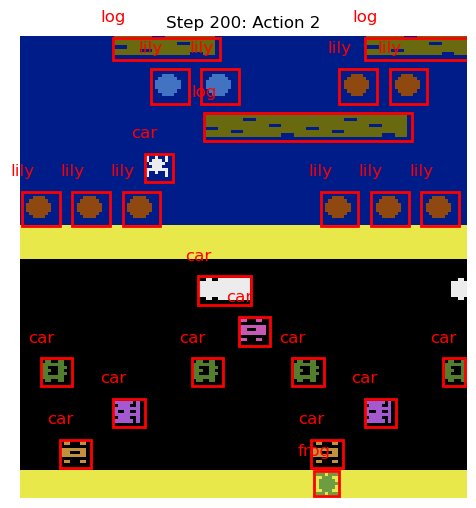

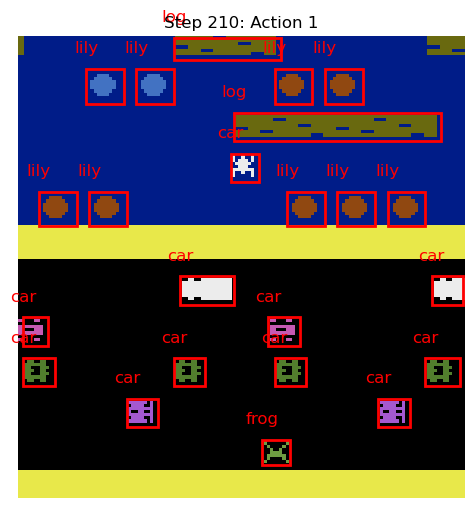

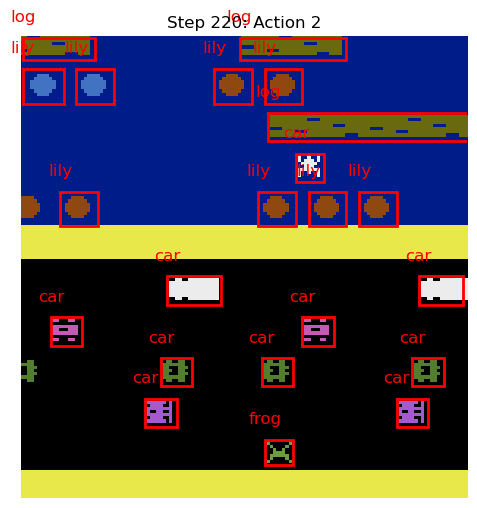

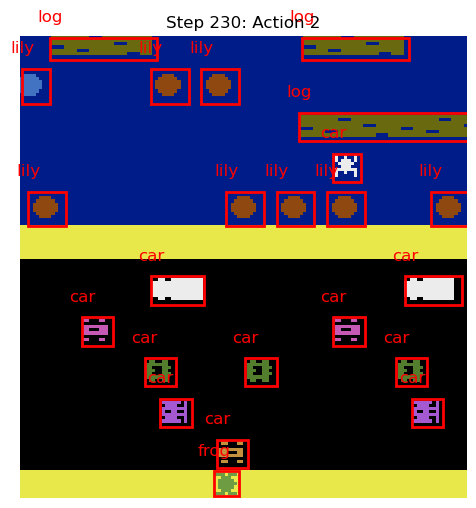

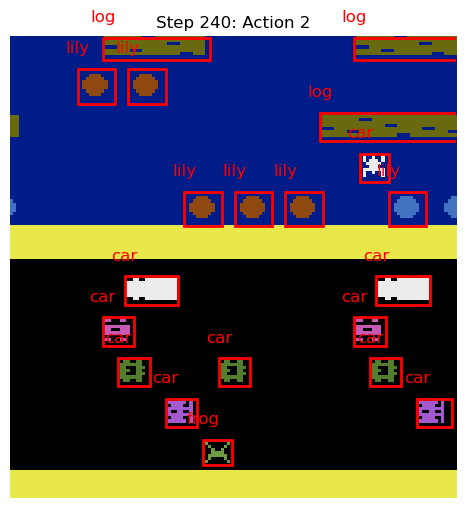

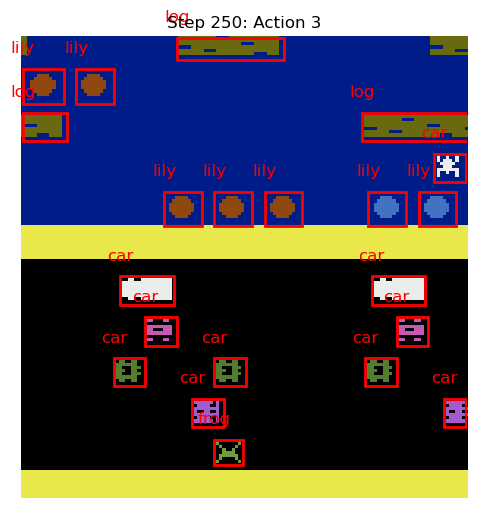

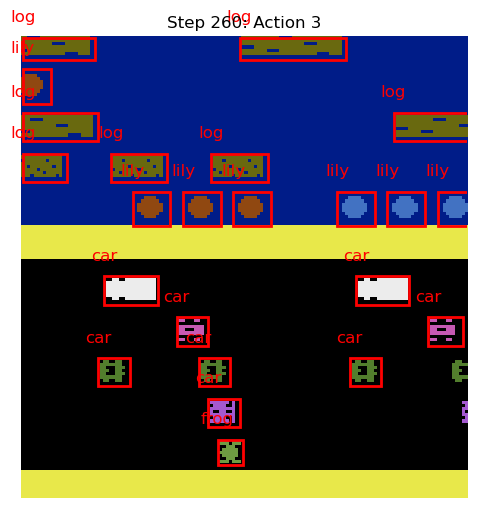

Training Progress:   0%|          | 3/1000 [00:33<3:08:16, 11.33s/it]

Episode: 3/1000, Score: -9.20, Epsilon: 1.0000


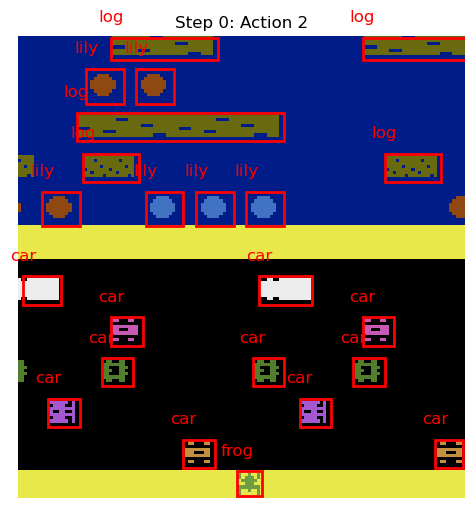

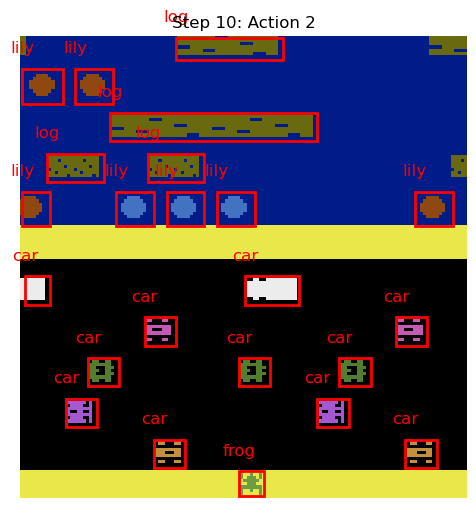

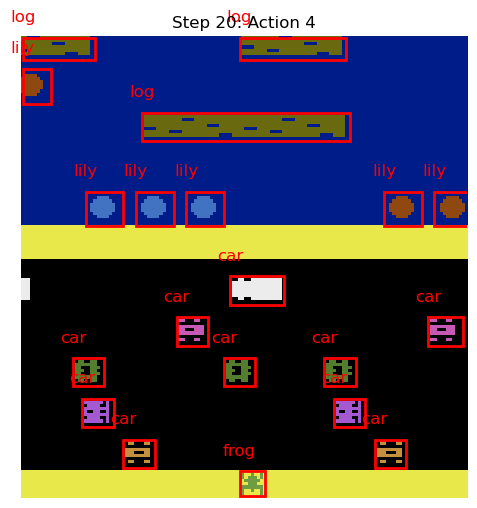

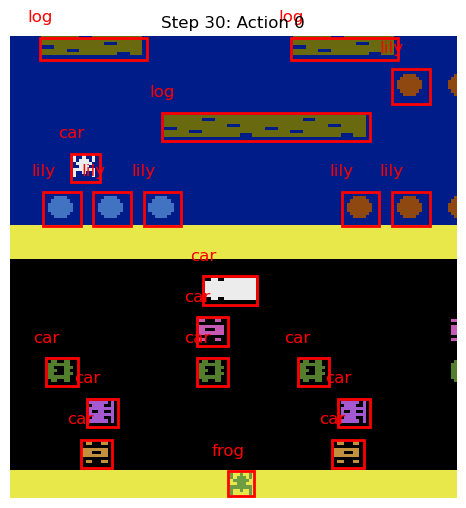

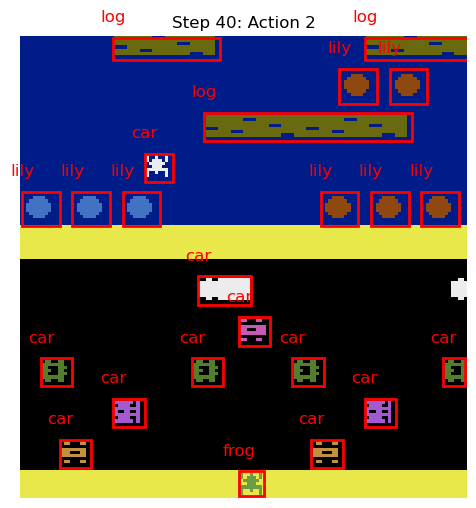

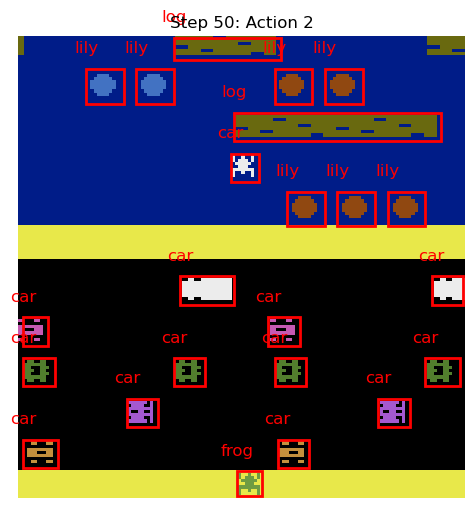

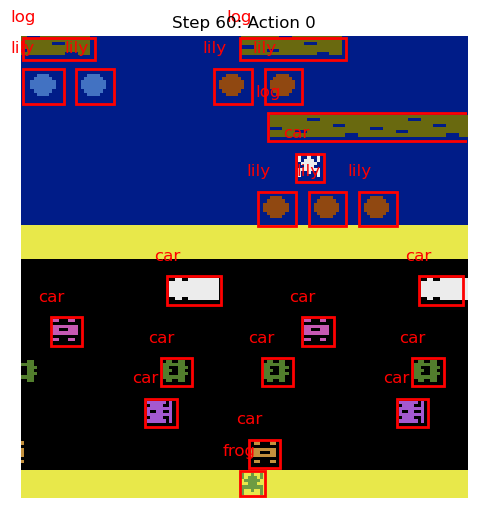

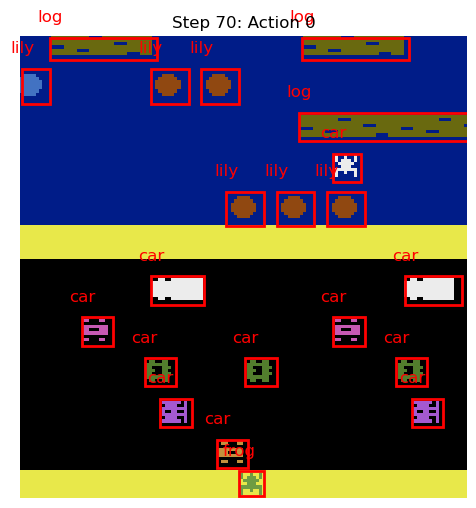

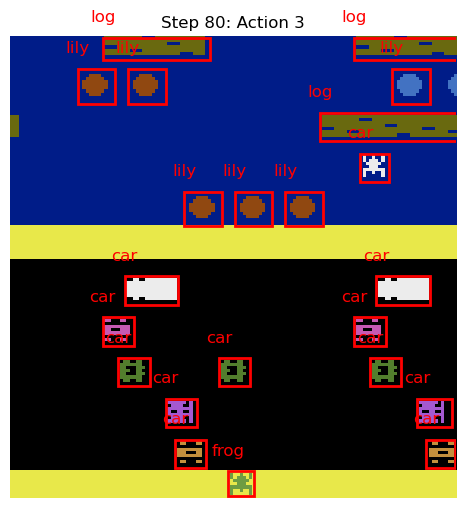

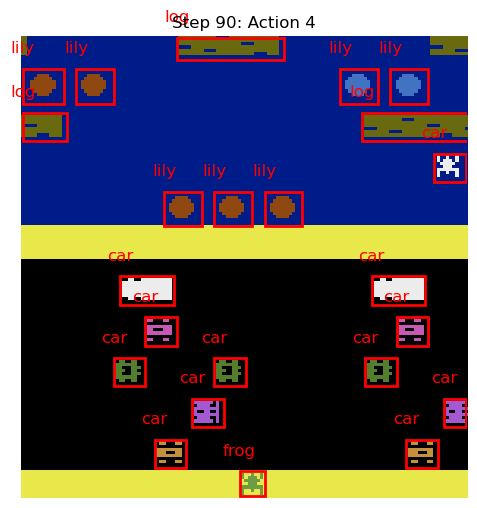

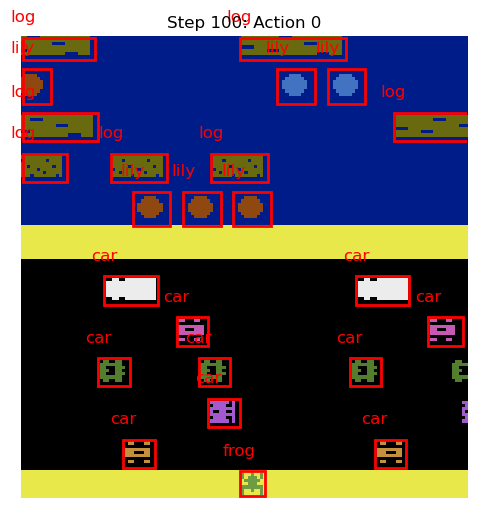

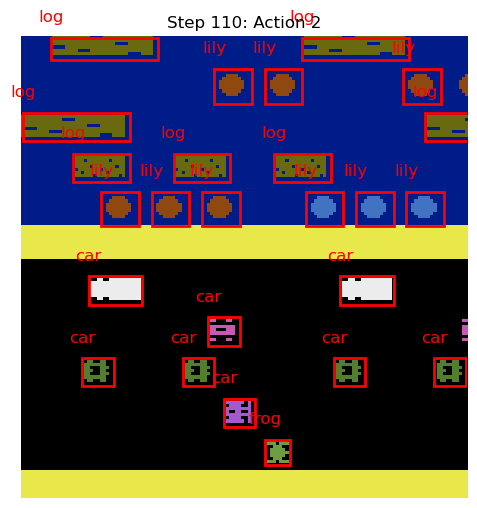

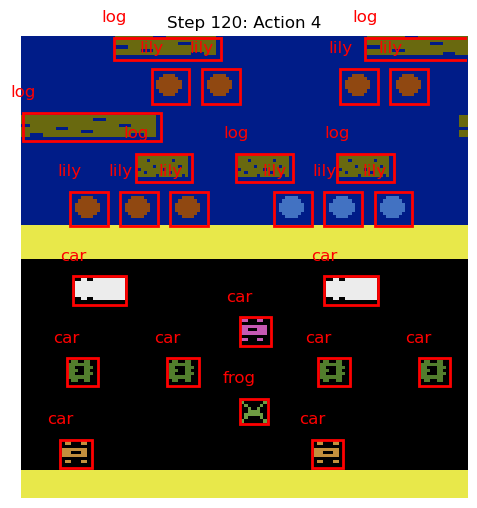

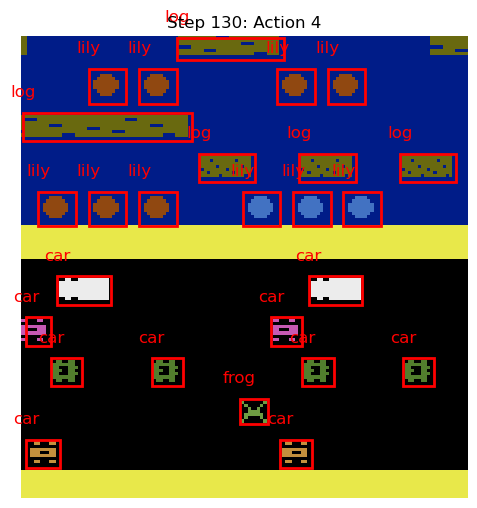

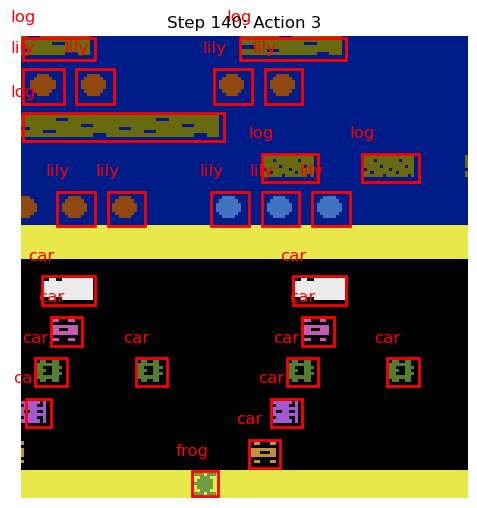

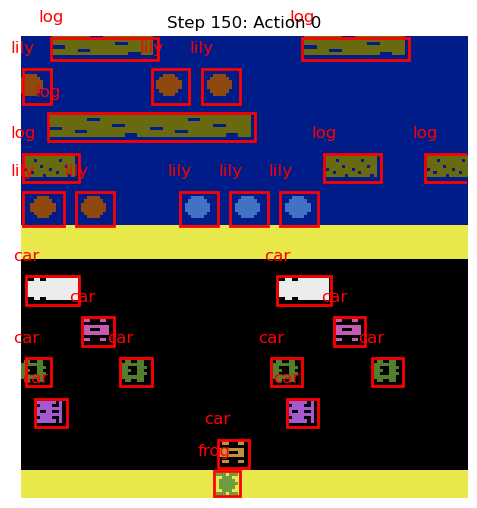

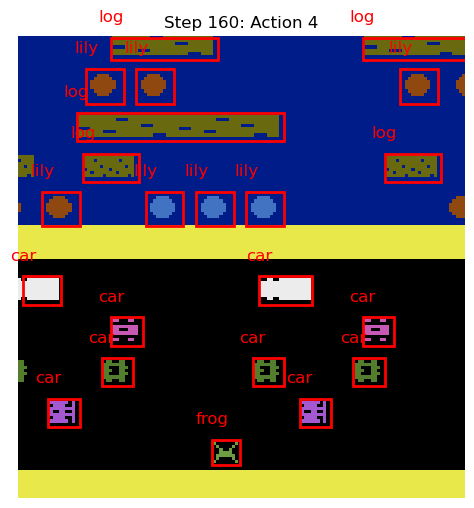

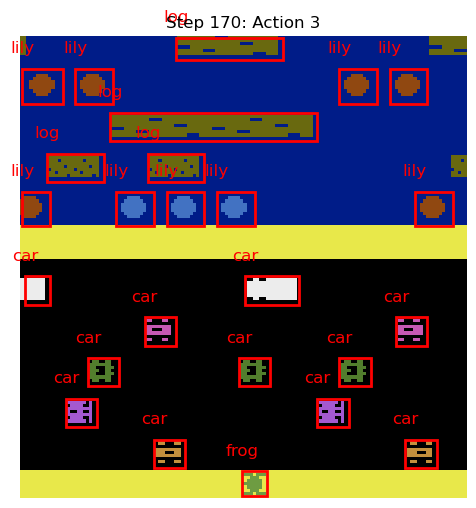

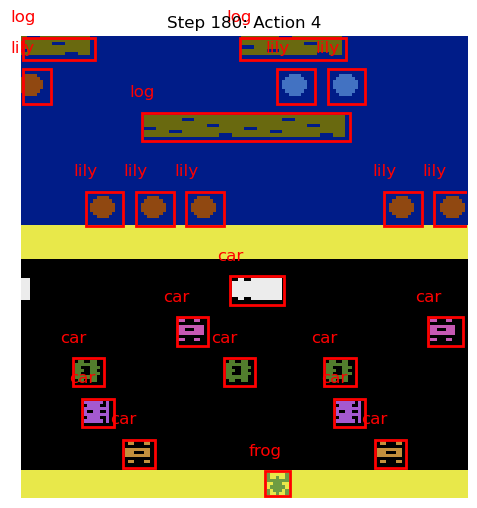

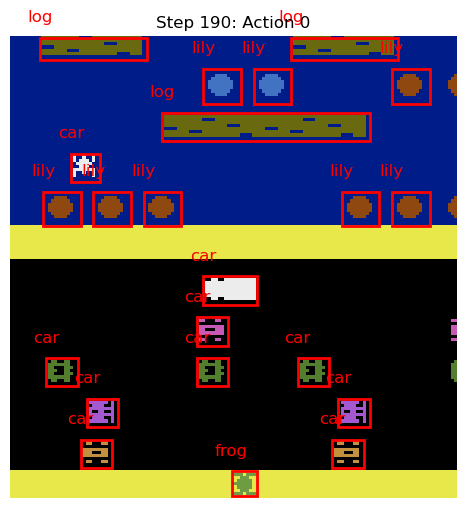

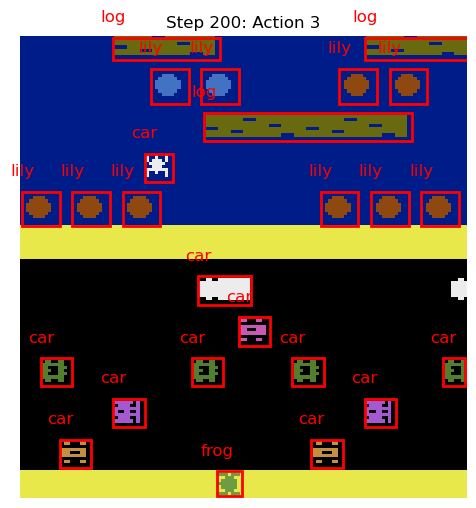

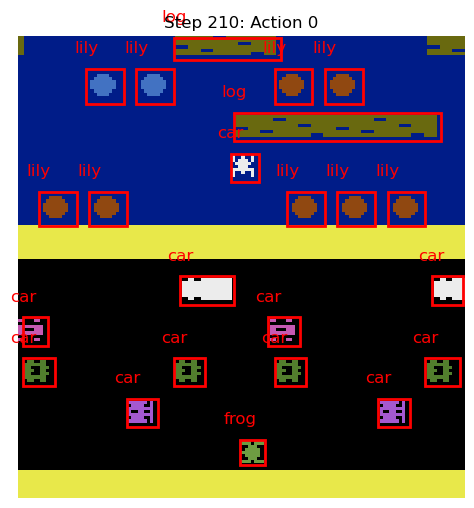

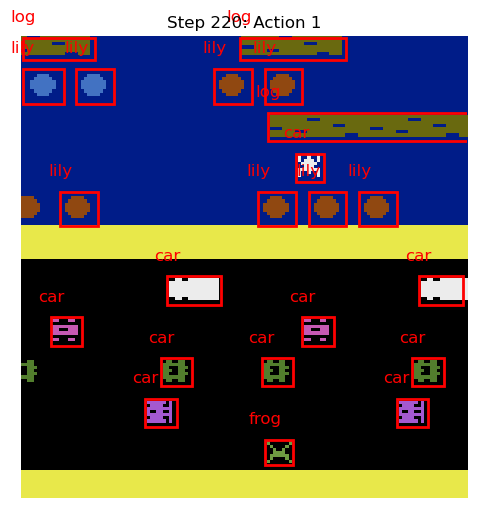

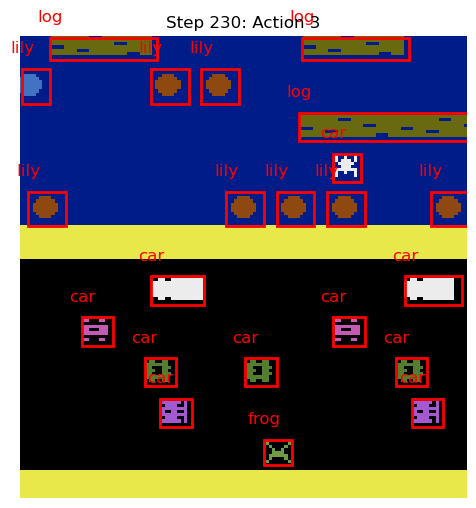

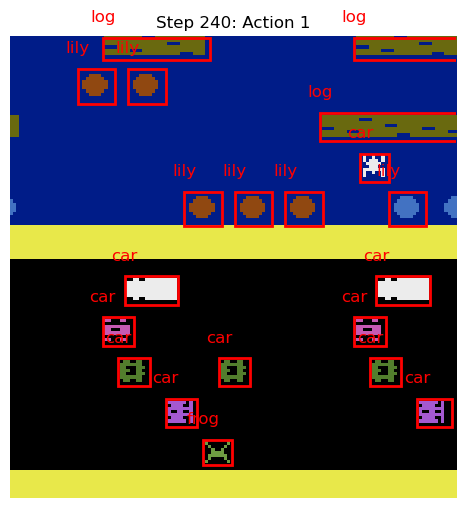

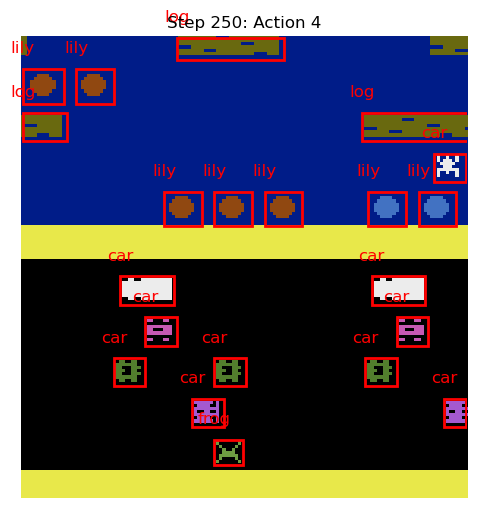

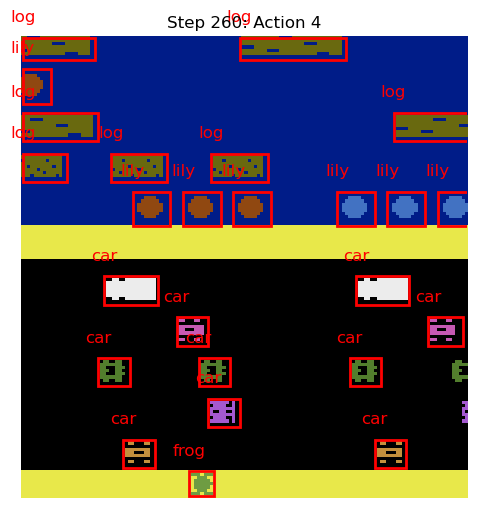

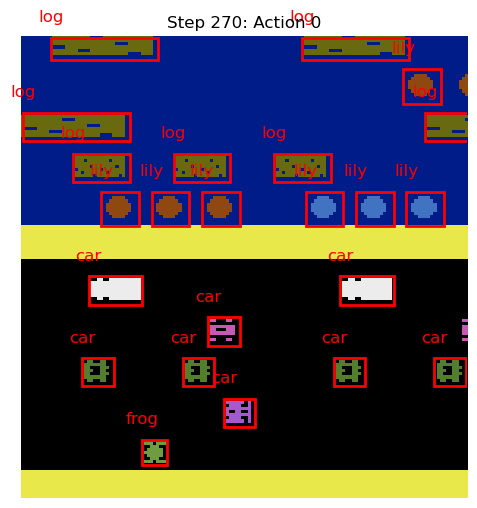

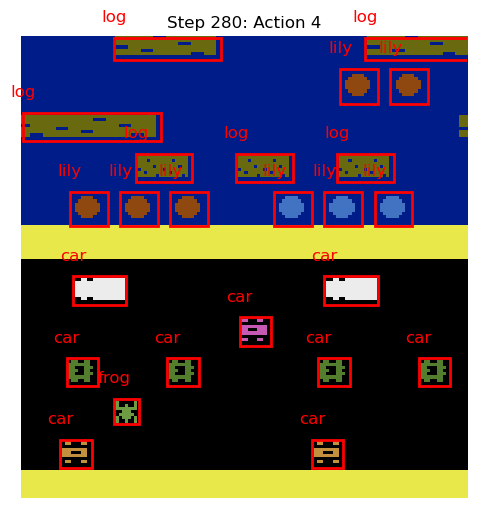

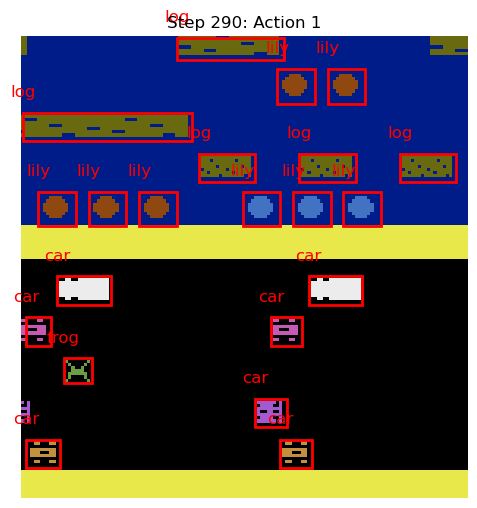

Training Progress:   0%|          | 4/1000 [00:46<3:15:14, 11.76s/it]

Episode: 4/1000, Score: -17.10, Epsilon: 1.0000


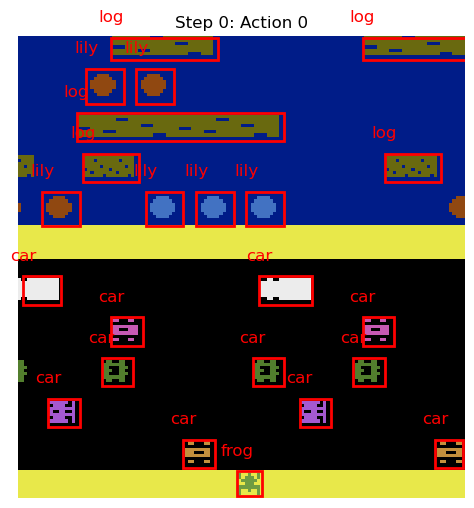

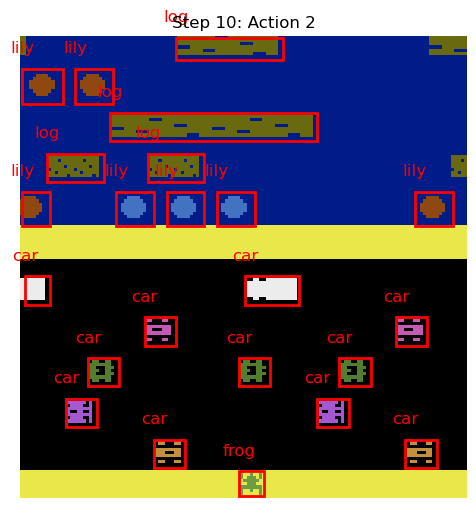

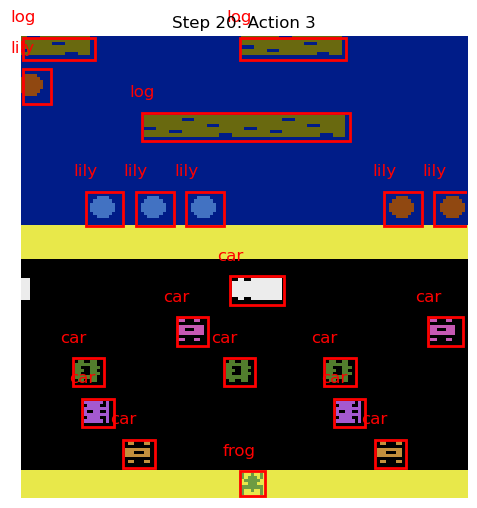

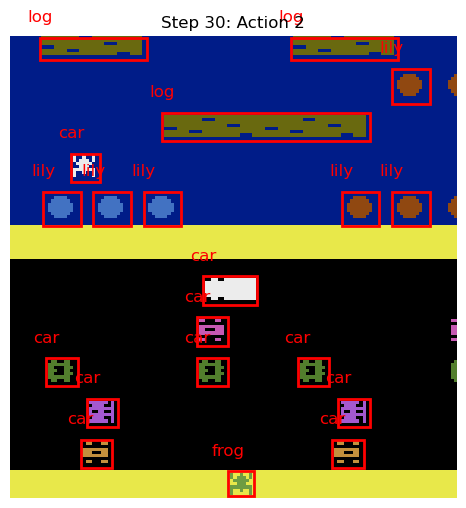

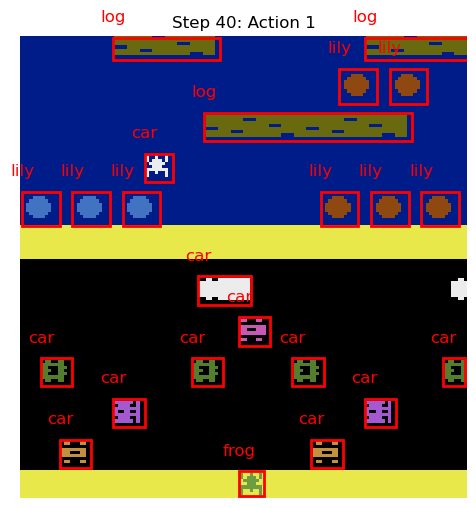

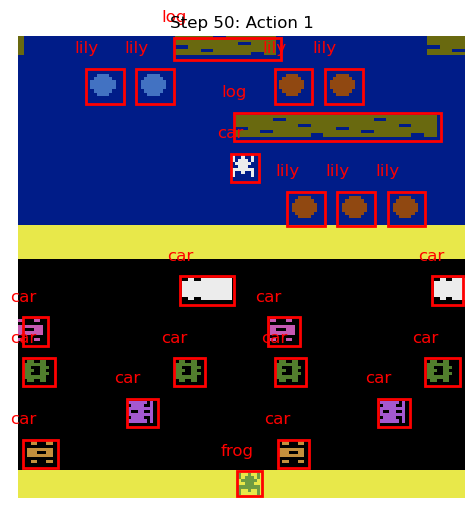

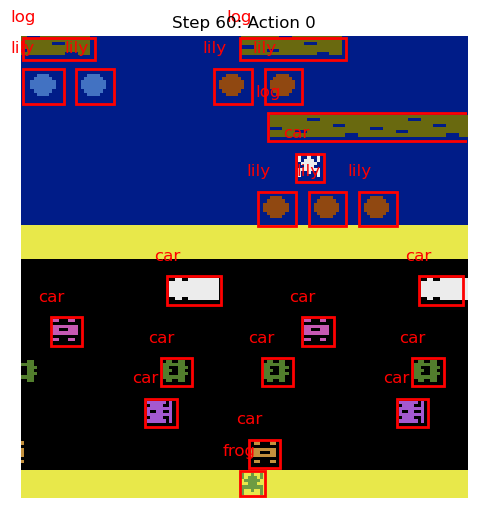

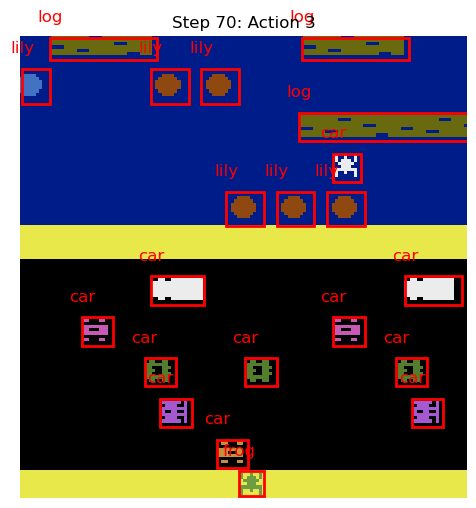

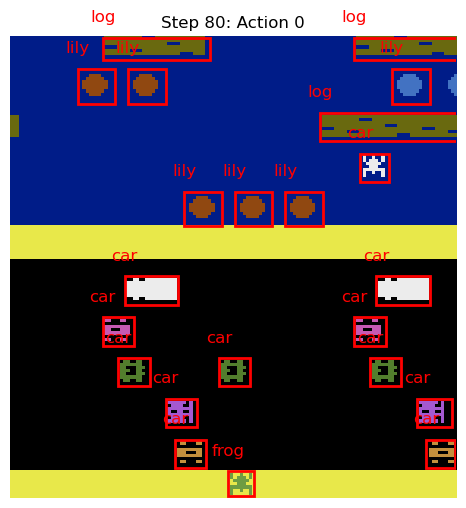

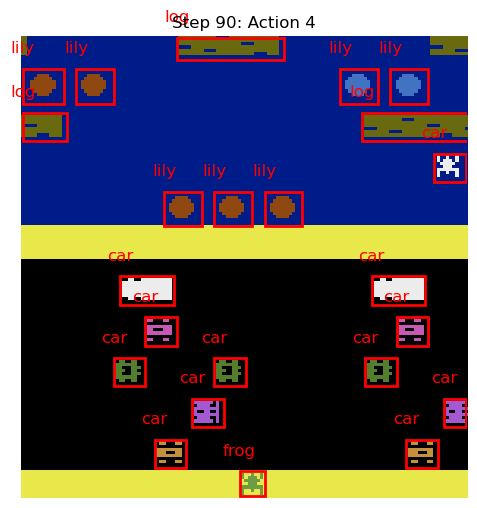

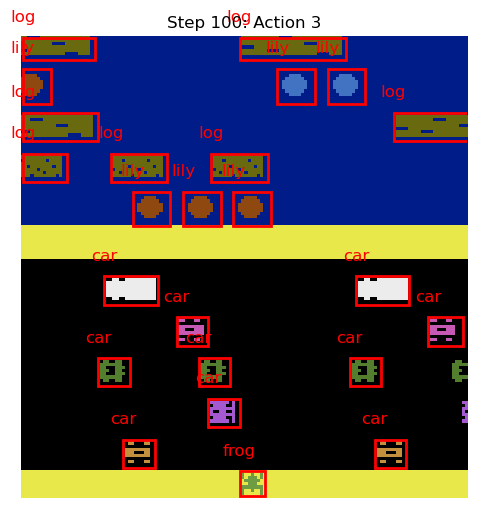

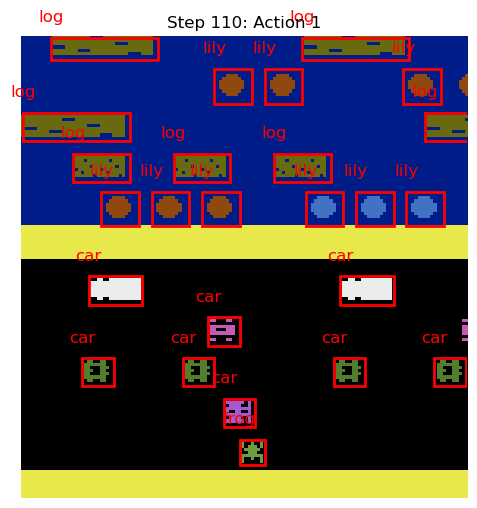

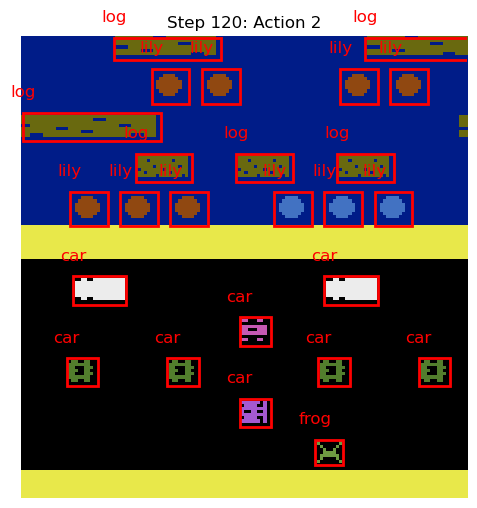

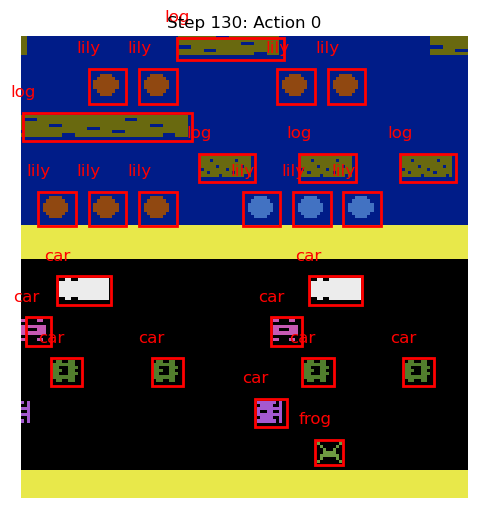

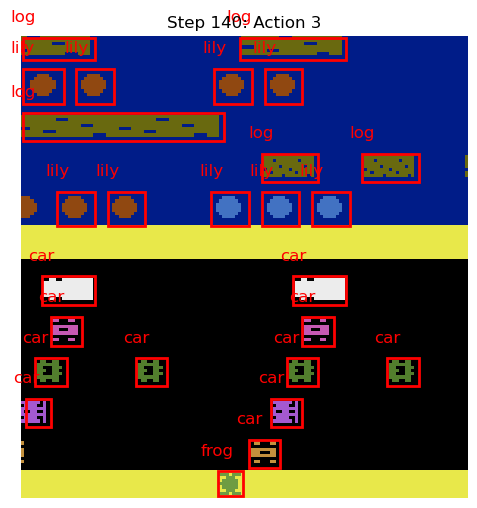

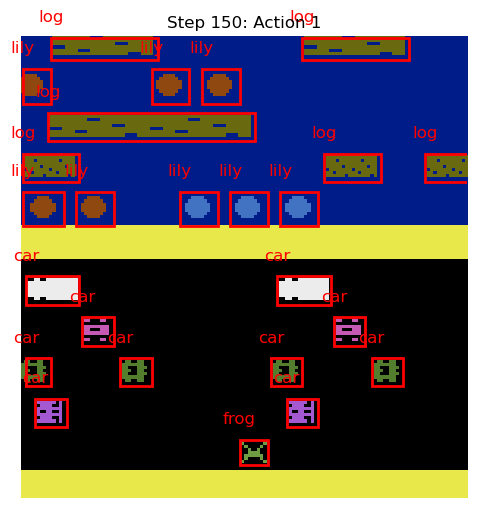

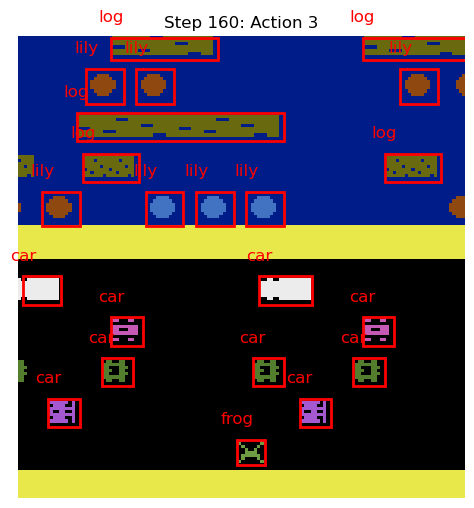

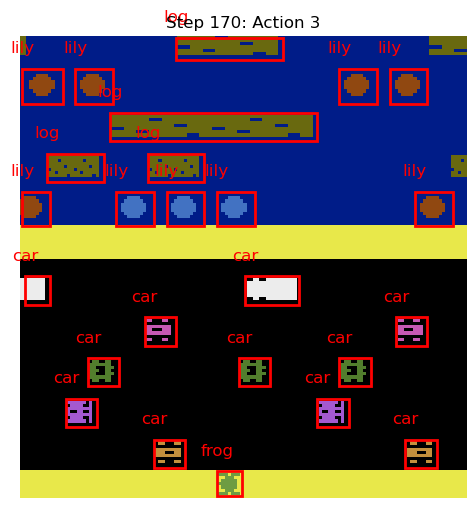

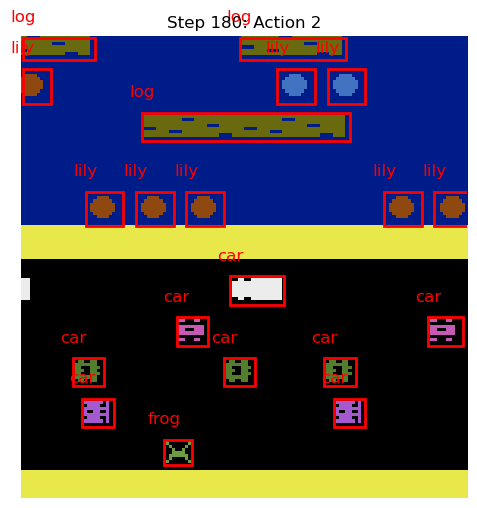

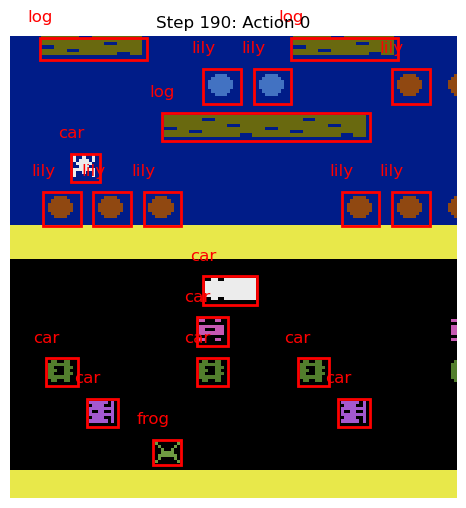

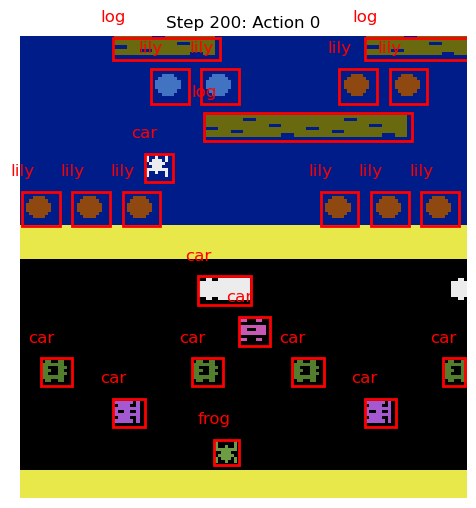

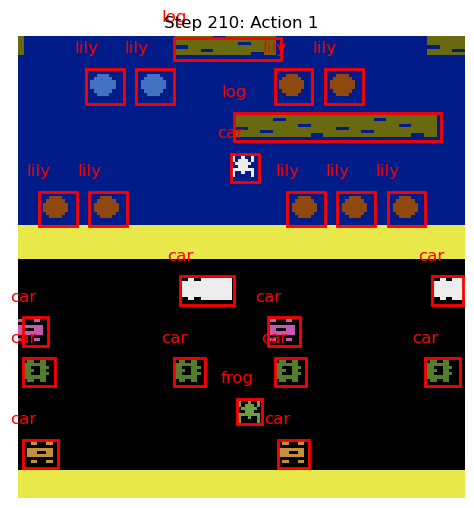

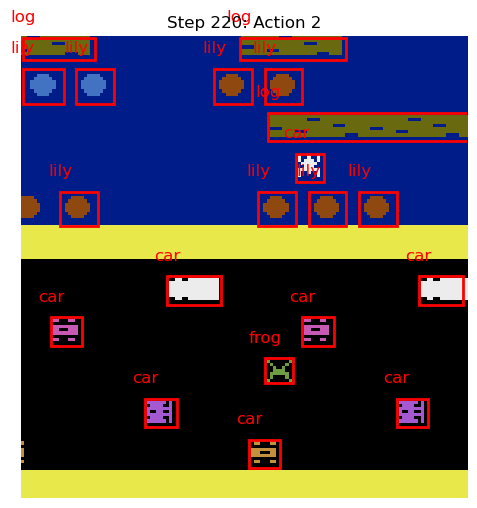

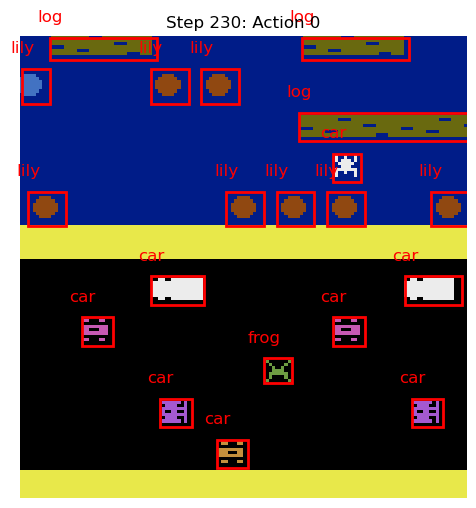

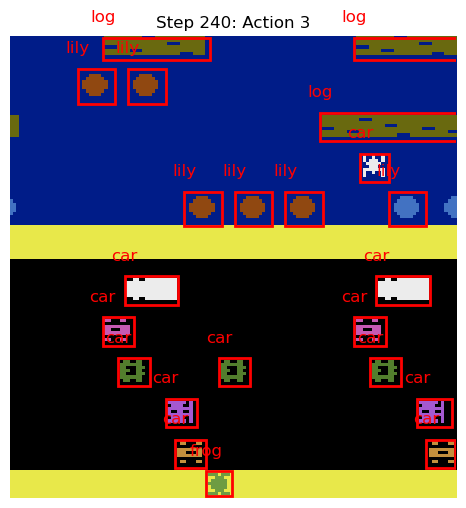

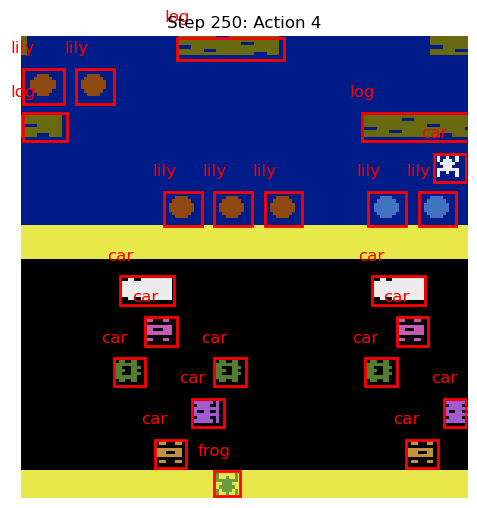

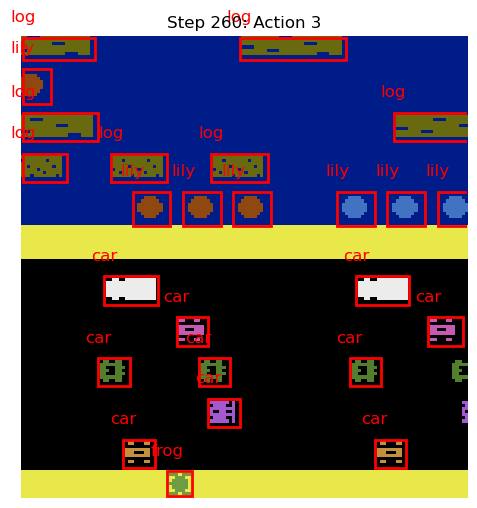

Training Progress:   0%|          | 5/1000 [00:56<3:09:00, 11.40s/it]

Episode: 5/1000, Score: -14.90, Epsilon: 1.0000


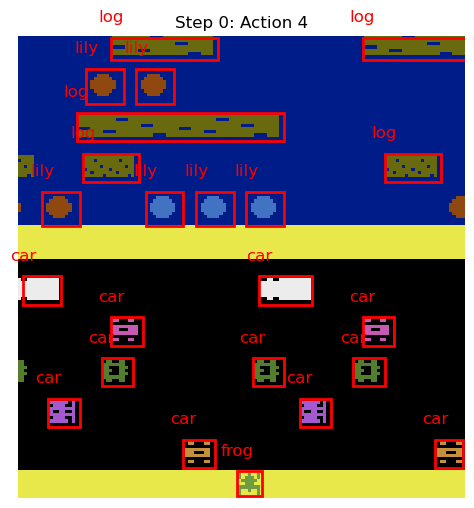

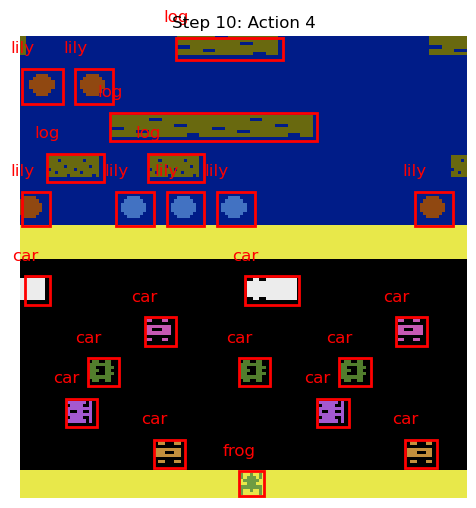

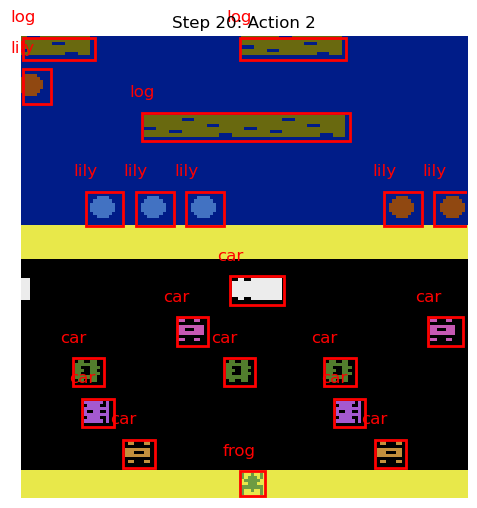

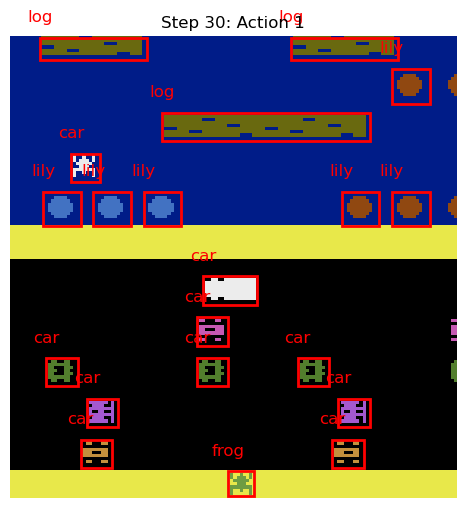

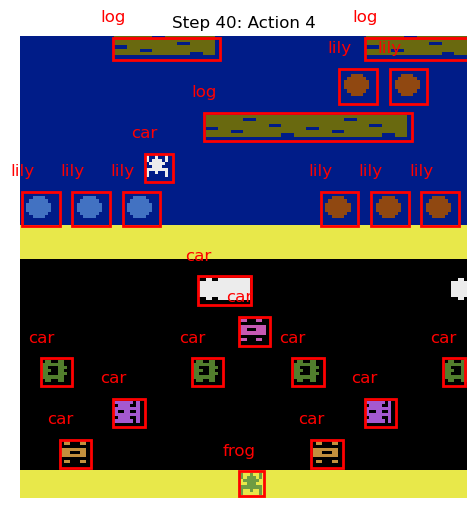

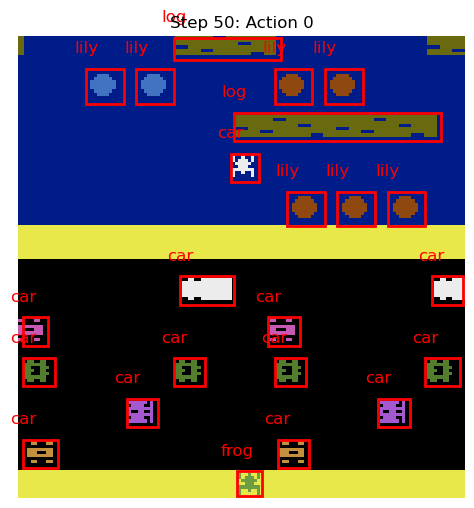

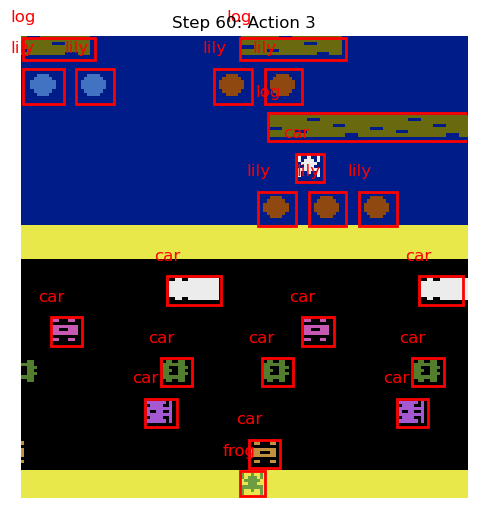

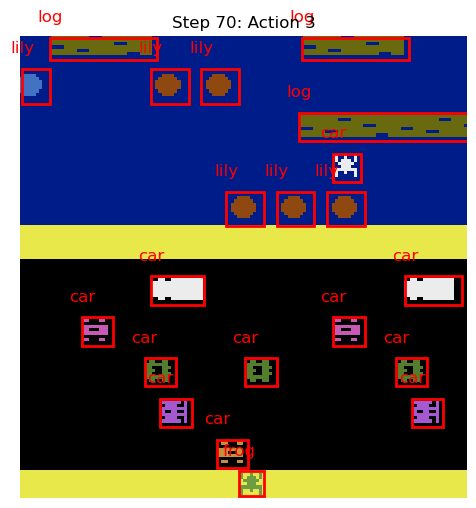

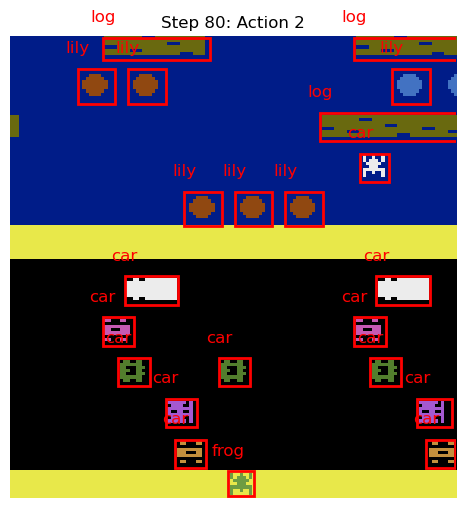

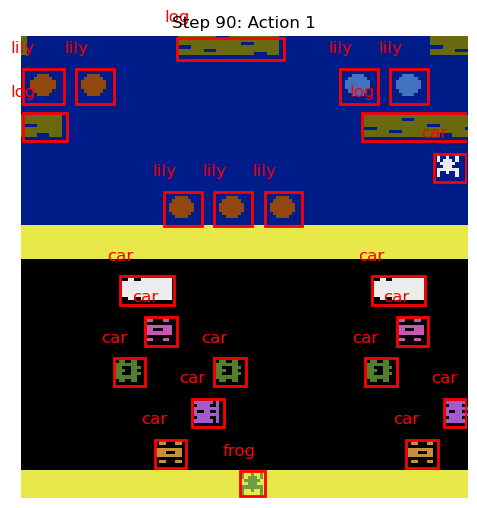

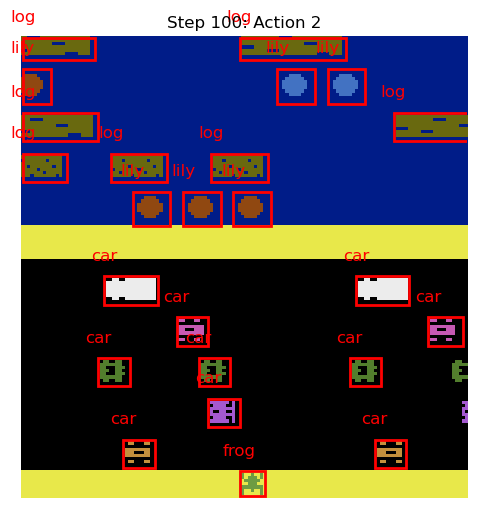

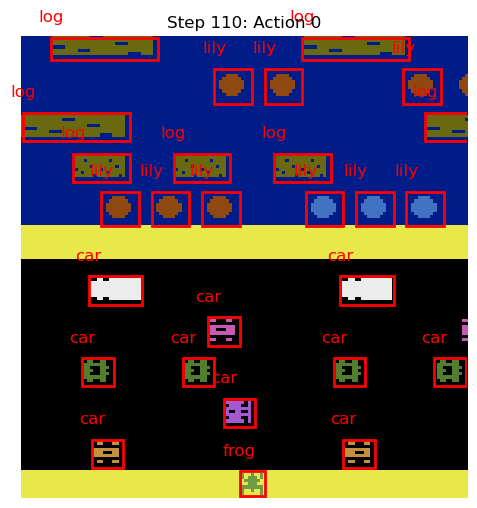

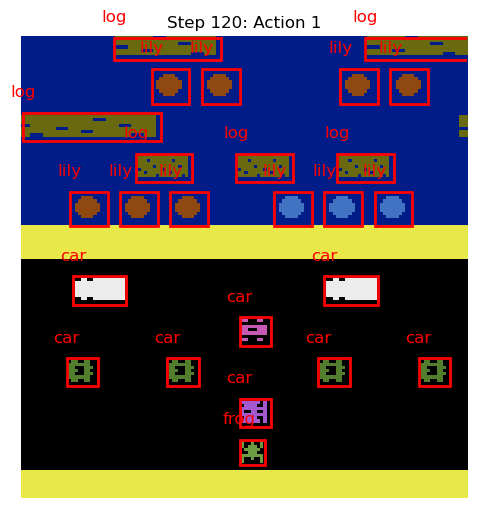

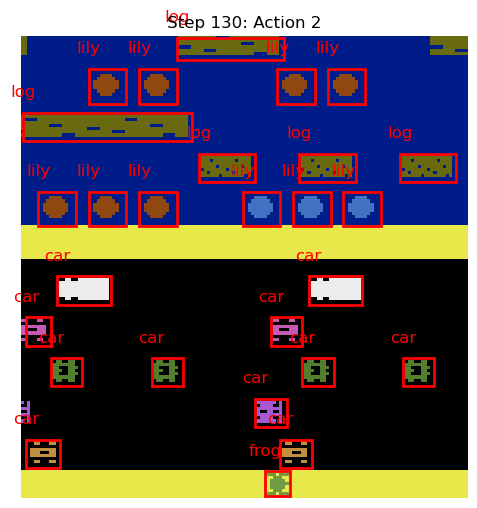

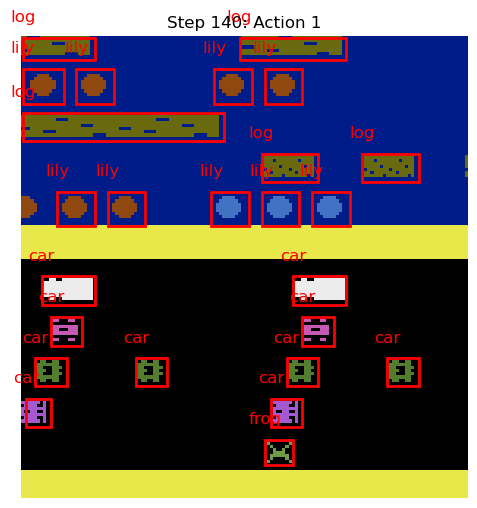

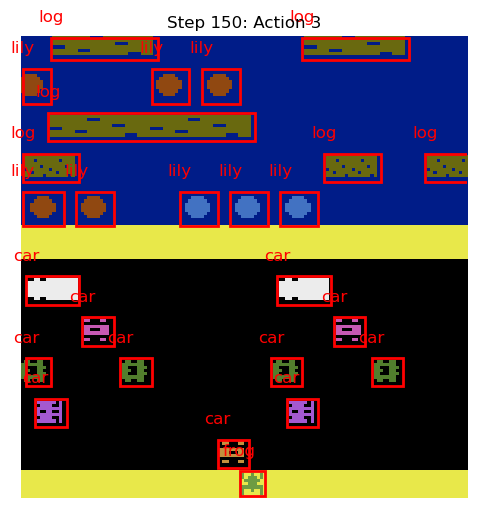

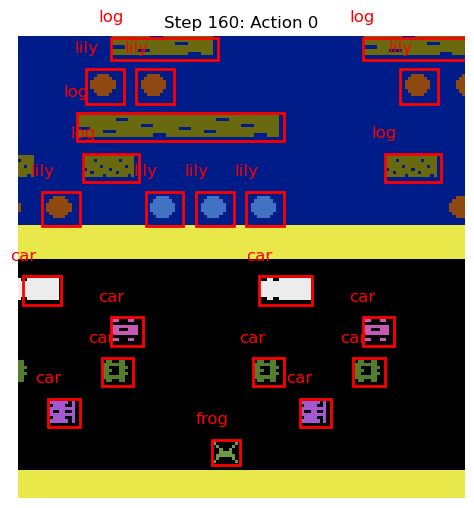

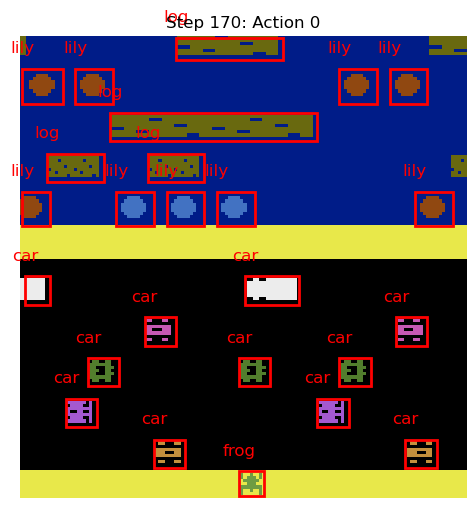

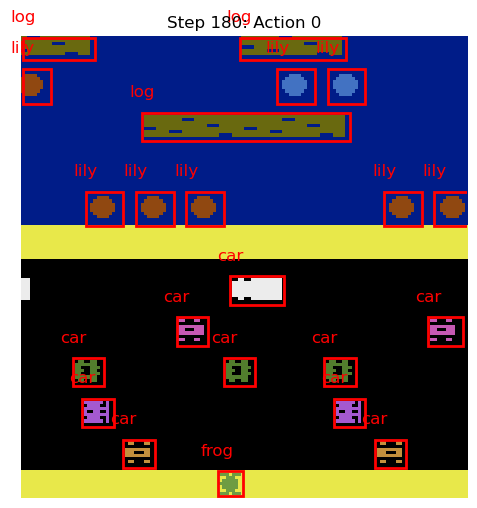

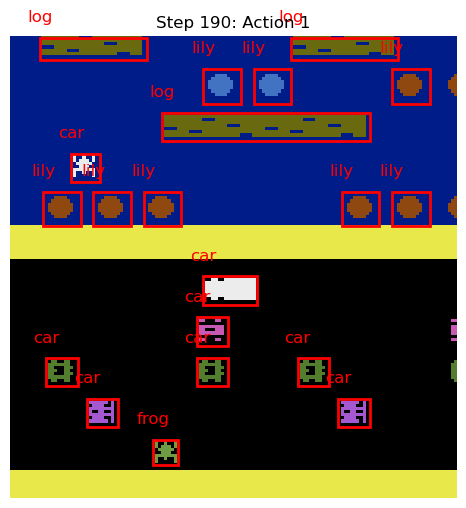

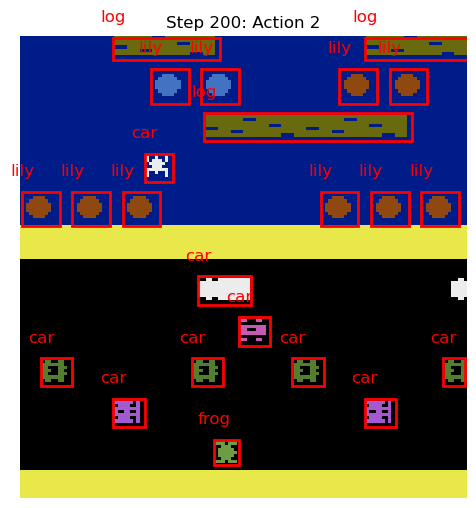

In [ ]:
import os
from tqdm import trange

import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define color ranges for object detection
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
    # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            # Check for overlap between frog and car
            if (frog_x < x + w and 
                frog_x + frog_w > x and 
                frog_y < y + h and 
                frog_y + frog_h > y):
                return True
    
    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if label == "log" or label == "lily":
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    if frog_bbox is None:
        return False
        
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

def preprocess_frame(frame):
    """Preprocess frame for CNN input: resize, normalize"""
    # Resize to 84x84 (common size for DQN)
    resized = cv2.resize(frame, (84, 84))
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    # Normalize
    normalized = gray / 255.0
    # Reshape for CNN input [batch_size, height, width, channels]
    processed = normalized.reshape(1, 84, 84, 1)
    return processed

def create_state_representation(frame, detected_objects, frog_bbox=None):
    """Create a state representation with object detection results"""
    # Create a blank canvas for state visualization
    state_img = np.zeros_like(frame)
    
    # Draw detected objects
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            cv2.rectangle(state_img, (x, y), (x+w, y+h), (255, 0, 0), -1)  # Cars in red
        elif label == "log" or label == "lily":
            cv2.rectangle(state_img, (x, y), (x+w, y+h), (0, 255, 0), -1)  # Safe objects in green
    
    # Draw frog if detected
    if frog_bbox:
        x, y, w, h = frog_bbox
        cv2.rectangle(state_img, (x, y), (x+w, y+h), (0, 0, 255), -1)  # Frog in blue
    
    # Preprocess for CNN
    return preprocess_frame(state_img)

# CNN Model for Deep Q-Learning
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape  # Shape of input state (height, width, channels)
        self.action_space = action_space  # Number of possible actions
        self.memory = deque(maxlen=20000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        # CNN architecture similar to DQN paper
        model = Sequential()
        model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape))
        model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        
        # Add additional convolutional layers
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(Conv2D(128, (3, 3), activation='relu'))
    
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
    
        # Add more dense layers
        model.add(Dense(1024, activation='relu'))  # New hidden layer
        model.add(Dense(512, activation='relu'))   # Another new hidden layer
    
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model

    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        # Store experience in replay memory
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        # Training on random batch from replay memory
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.target_model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save_weights(self, filename):
        self.model.save_weights(filename)

# Training function for multiple episodes
def train_dqn_agent(episodes=1000, steps_per_episode=6000, visualize=False, batch_size=1500):
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
    
    # State shape after preprocessing
    state_shape = (84, 84, 1)
    
    # Action space: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
    action_space = env.action_space.n
    
    # Create agent
    agent = DQNAgent(state_shape, action_space)
    
    # Fibonacci rewards
    fibonacci = generate_fibonacci(20)
    
    # Track highest score for saving best model
    highest_total_reward = -float('inf')
    
    # Lists to track progress
    episode_rewards = []
    epsilon_values = []
    
    # Training loop
    for episode in trange(episodes, desc="Training Progress"):
        # Reset environment
        obs, _ = env.reset()
        
        # Crop the image to focus on game area
        cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
        frame = np.array(cropped_image)
        screen_height = cropped_image.shape[0]
        
        # Detect objects
        detected_objects = detect_objects(frame, object_colors)
        
        # Find frog
        frog_bbox = None
        for label, bbox in detected_objects:
            if label == "frog":
                frog_bbox = bbox
                break
        
        # Create initial state
        state = create_state_representation(frame, detected_objects, frog_bbox)
        
        # Track rewards and frog position
        total_reward = 0
        highest_y_position = float('inf') if frog_bbox is None else frog_bbox[1]
        fib_index = 0
        
        # Steps per episode
        for step in range(steps_per_episode):
            # Get action from DQN
            action = agent.act(state)
            
            # Take action
            obs, env_reward, terminated, truncated, info = env.step(action)
            
            # Crop and process the new frame
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            
            # Detect objects
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
            
            # Create next state
            next_state = create_state_representation(frame, detected_objects, frog_bbox)
            
            # Calculate custom reward
            custom_reward = 0
            
            if frog_bbox:
                current_frog_y = frog_bbox[1]
                
                # Reward for moving up
                if current_frog_y < highest_y_position:
                    rows_moved = int((highest_y_position - current_frog_y) / 10)
                    for i in range(rows_moved):
                        reward_index = min(fib_index + i, len(fibonacci) - 1)
                        custom_reward += fibonacci[reward_index]
                    fib_index = min(fib_index + rows_moved, len(fibonacci) - 1)
                    highest_y_position = current_frog_y
                
                # Penalty for car collision
                if is_collision_with_car(frog_bbox, detected_objects):
                    custom_reward -= 100
                
                # Penalty for being in water without support
                if is_in_water_area(frog_bbox, screen_height):
                    if not is_on_safe_object(frog_bbox, detected_objects):
                        custom_reward -= 100
            
            # Add small penalty for each step to encourage efficiency
            custom_reward -= 0.1
            
            # Use both custom reward and environment reward
            reward = custom_reward + env_reward
            if step % 10 == 0:
                plt.close('all')
                plt.figure(figsize=(10, 6))
                plt.imshow(frame)
                ax = plt.gca()
                
                # Draw bounding boxes and labels
                for label, (x, y, w, h) in detected_objects:
                    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
                    ax.add_patch(rect)
                    plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')
                
                plt.title(f'Step {step}: Action {action}')
                plt.axis('off')
                plt.show()
                
            # Store in replay memory
            agent.remember(state, action, reward, next_state, done=(terminated or truncated))
            
            # Update state and total reward
            state = next_state
            total_reward += reward
            
            # Train the agent periodically in batches
            if len(agent.memory) > batch_size:
                minibatch = random.sample(agent.memory, batch_size)
                for state_batch, action_batch, reward_batch, next_state_batch, done_batch in minibatch:
                    target = reward_batch
                    if not done_batch:
                        target = reward_batch + agent.gamma * np.amax(agent.target_model.predict(next_state_batch, verbose=0)[0])
                    target_f = agent.model.predict(state_batch, verbose=0)
                    target_f[0][action_batch] = target
                    agent.model.fit(state_batch, target_f, epochs=1, verbose=0)
            
            # Break if done
            if terminated or truncated:
                break
        
        # Update target model periodically
        if episode % 10 == 0:
            agent.update_target_model()
        
        # Save model if it achieves a new high score
        if total_reward > highest_total_reward:
            highest_total_reward = total_reward
            agent.save_weights("frogger_dqn_best.weights.h5")
            
        # Track metrics
        episode_rewards.append(total_reward)
        epsilon_values.append(agent.epsilon)
        
        # Print episode results
        print(f"Episode: {episode+1}/{episodes}, Score: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
        
        # Plot learning progress every 50 episodes
        if (episode+1) % 50 == 0:
            # Plot rewards
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            plt.plot(episode_rewards)
            plt.title('Episode Rewards')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            
            plt.subplot(1, 2, 2)
            plt.plot(epsilon_values)
            plt.title('Exploration Rate (Epsilon)')
            plt.xlabel('Episode')
            plt.ylabel('Epsilon')
            
            plt.tight_layout()
            plt.savefig(f'frogger_training_progress_{episode+1}.png')
            plt.close()
    
    # Close environment
    env.close()
    
    return agent, episode_rewards

# Function to test trained agent


# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)



print("Training new model...")
# Train agent for 1000 episodes
agent, rewards = train_dqn_agent(episodes=1000, visualize=False)

# Plot training progress
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.savefig('frogger_training_rewards.png')
    
   

In [ ]:
import os
from tqdm import trange
import gymnasium as gym
import os
import matplotlib.pyplot as plt

import ale_py
import time
import numpy as np
import cv2
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define color ranges for object detection
object_colors = {
    'frog': ((100, 146, 56), (120, 166, 76)),
    'green_car': ((72, 116, 35), (92, 136, 55)),
    'yellow_car': ((185, 134, 51), (205, 154, 71)),
    'purple_car': ((154, 79, 198), (174, 99, 218)),
    'pink_car': ((188, 79, 169), (208, 99, 189)),
    'white_car': ((230, 230, 230), (250, 250, 250)),
    'blue_lillies': ((56, 104, 184), (76, 124, 204)),
    'brown_lillies': ((134, 62, 7), (154, 82, 27)),
    'log': ((95, 95, 5), (115, 115, 25)),
    # 'water': ((0, 28, 126), (10, 38, 146))
}

# Define the window for detection
corner1 = (9, 32)
corner2 = (151, 32)
corner3 = (151, 179)
corner4 = (9, 179)

def detect_objects(image_rgb, object_colors):
    detected_objects = []
    
    # Group objects by category
    car_labels = ['green_car', 'yellow_car', 'purple_car', 'pink_car', 'white_car']
    lily_labels = ['blue_lillies', 'brown_lillies']
    log_labels = ['log']
    
    for label, (lower_rgb, upper_rgb) in object_colors.items():
        # Determine category
        if label in car_labels:
            category = "car"
        elif label in lily_labels:
            category = "lily"
        elif label in log_labels:
            category = "log"
        else:
            category = label
        
        # Convert RGB color ranges to NumPy arrays
        lower = np.array(lower_rgb, dtype=np.uint8)
        upper = np.array(upper_rgb, dtype=np.uint8)
        
        # Create a mask for the current object color range
        mask = cv2.inRange(image_rgb, lower, upper)
        
        # Different processing for different object types
        if label in log_labels:
            # Log-specific processing
            mask = cv2.dilate(mask, None, iterations=2)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        elif label in lily_labels:
            # Lily-specific processing
            mask = cv2.dilate(mask, None, iterations=3)
            mask = cv2.erode(mask, None, iterations=1)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        else:
            # Processing for cars and frog
            mask = cv2.dilate(mask, None, iterations=4)
            mask = cv2.erode(mask, None, iterations=2)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process the contours
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 75:
                x, y, w, h = cv2.boundingRect(contour)
                
                # Special handling for stacked logs
                if label in log_labels and h > 25:
                    log_height = 20  # Approximate height of a single log
                    num_logs = max(1, int(h / log_height))
                    
                    for i in range(num_logs):
                        log_y = y + (i * log_height)
                        if log_y + log_height <= y + h:
                            detected_objects.append((category, (x, log_y, w, log_height)))
                elif label == "frog":
                    # Shrink frog bounding box by 20%
                    new_w = int(w * 0.8)
                    new_h = int(h * 0.8)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                elif category == "car":
                    # Shrink car bounding box by 15%
                    new_w = int(w * 0.85)
                    new_h = int(h * 0.85)
                    new_x = x + (w - new_w) // 2  # Center the smaller box
                    new_y = y + (h - new_h) // 2
                    detected_objects.append((category, (new_x, new_y, new_w, new_h)))
                else:
                    detected_objects.append((category, (x, y, w, h)))
    
    return detected_objects

def generate_fibonacci(n):
    """Generate first n Fibonacci numbers"""
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[i-1] + fib[i-2])
    return fib

def is_collision_with_car(frog_bbox, detected_objects):
    """Check if frog has collided with a car"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            # Check for overlap between frog and car
            if (frog_x < x + w and 
                frog_x + frog_w > x and 
                frog_y < y + h and 
                frog_y + frog_h > y):
                return True
    
    return False

def is_on_safe_object(frog_bbox, detected_objects):
    """Check if frog is on a log or lily pad"""
    if frog_bbox is None:
        return False
        
    frog_x, frog_y, frog_w, frog_h = frog_bbox
    frog_center_x = frog_x + frog_w/2
    frog_center_y = frog_y + frog_h/2
    
    for label, (x, y, w, h) in detected_objects:
        if label == "log" or label == "lily":
            if (frog_center_x >= x and 
                frog_center_x <= x + w and 
                frog_center_y >= y and 
                frog_center_y <= y + h):
                return True
    
    return False

def is_in_water_area(frog_bbox, screen_height):
    """Check if frog is in the water area (upper half)"""
    if frog_bbox is None:
        return False
        
    _, frog_y, _, _ = frog_bbox
    return frog_y < screen_height / 2

def preprocess_frame(frame):
    """Preprocess frame for CNN input: resize, normalize"""
    # Resize to 84x84 (common size for DQN)
    resized = cv2.resize(frame, (84, 84))
    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    # Normalize
    normalized = gray / 255.0
    # Reshape for CNN input [batch_size, height, width, channels]
    processed = normalized.reshape(1, 84, 84, 1)
    return processed

def create_state_representation(frame, detected_objects, frog_bbox=None):
    """Create a state representation with object detection results"""
    # Create a blank canvas for state visualization
    state_img = np.zeros_like(frame)
    
    # Draw detected objects
    for label, (x, y, w, h) in detected_objects:
        if label == "car":
            cv2.rectangle(state_img, (x, y), (x+w, y+h), (255, 0, 0), -1)  # Cars in red
        elif label == "log" or label == "lily":
            cv2.rectangle(state_img, (x, y), (x+w, y+h), (0, 255, 0), -1)  # Safe objects in green
    
    # Draw frog if detected
    if frog_bbox:
        x, y, w, h = frog_bbox
        cv2.rectangle(state_img, (x, y), (x+w, y+h), (0, 0, 255), -1)  # Frog in blue
    
    # Preprocess for CNN
    return preprocess_frame(state_img)

# CNN Model for Deep Q-Learning
class DQNAgent:
    def __init__(self, state_shape, action_space):
        self.state_shape = state_shape  # Shape of input state (height, width, channels)
        self.action_space = action_space  # Number of possible actions
        self.memory = deque(maxlen=20000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        # CNN architecture similar to DQN paper
        model = Sequential()
        model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu', input_shape=self.state_shape))
        model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        
        # Add additional convolutional layers
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(Conv2D(128, (3, 3), activation='relu'))
    
        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
    
        # Add more dense layers
        model.add(Dense(1024, activation='relu'))  # New hidden layer
        model.add(Dense(512, activation='relu'))   # Another new hidden layer
    
        model.add(Dense(self.action_space, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        
        return model

    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        # Store experience in replay memory
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        # Training on random batch from replay memory
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.target_model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save_weights(self, filename):
        self.model.save_weights(filename)

# Training function for multiple episodes
def train_dqn_agent(episodes=1000, steps_per_episode=500, visualize=False, batch_size=1500):
    # Initialize environment
    env = gym.make("ALE/Frogger-v5", render_mode="rgb_array")
    
    # State shape after preprocessing
    state_shape = (84, 84, 1)
    
    # Action space: 0=NOOP, 1=UP, 2=RIGHT, 3=LEFT, 4=DOWN
    action_space = env.action_space.n
    
    # Create agent
    agent = DQNAgent(state_shape, action_space)
    
    # Fibonacci rewards
    fibonacci = generate_fibonacci(20)
    
    # Track highest score for saving best model
    highest_total_reward = -float('inf')
    
    # Lists to track progress
    episode_rewards = []
    epsilon_values = []
    
    # Training loop
    try:
        for episode in trange(episodes, desc="Training Progress"):
            # Reset environment
            obs, _ = env.reset()
            
            # Crop the image to focus on game area
            cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
            frame = np.array(cropped_image)
            screen_height = cropped_image.shape[0]
            
            # Detect objects
            detected_objects = detect_objects(frame, object_colors)
            
            # Find frog
            frog_bbox = None
            for label, bbox in detected_objects:
                if label == "frog":
                    frog_bbox = bbox
                    break
            if frog_bbox is None:
                print(f"Warning: Frog not found in episode {episode}, skipping...")
                break
            # Create initial state
            state = create_state_representation(frame, detected_objects, frog_bbox)
            
            # Track rewards and frog position
            total_reward = 0
            highest_y_position = float('inf') if frog_bbox is None else frog_bbox[1]
            fib_index = 0
            
            # Steps per episode
            for step in range(steps_per_episode):
                # Get action from DQN
                action = agent.act(state)
                
                # Take action
                obs, env_reward, terminated, truncated, info = env.step(action)
                
                # Crop and process the new frame
                cropped_image = obs[corner1[1]:corner3[1], corner1[0]:corner2[0]]
                frame = np.array(cropped_image)
                
                # Detect objects
                detected_objects = detect_objects(frame, object_colors)
                
                # Find frog
                frog_bbox = None
                for label, bbox in detected_objects:
                    if label == "frog":
                        frog_bbox = bbox
                        break
                
                # Create next state
                next_state = create_state_representation(frame, detected_objects, frog_bbox)
                
                # Calculate custom reward
                custom_reward = 0
                
                if frog_bbox:
                    current_frog_y = frog_bbox[1]
                    
                    # Reward for moving up
                    if current_frog_y < highest_y_position:
                        rows_moved = int((highest_y_position - current_frog_y) / 10)
                        for i in range(rows_moved):
                            reward_index = min(fib_index + i, len(fibonacci) - 1)
                            custom_reward += fibonacci[reward_index]
                        fib_index = min(fib_index + rows_moved, len(fibonacci) - 1)
                        highest_y_position = current_frog_y
                    
                    # Penalty for car collision
                    if is_collision_with_car(frog_bbox, detected_objects):
                        custom_reward -= 100
                    
                    # Penalty for being in water without support
                    if is_in_water_area(frog_bbox, screen_height):
                        if not is_on_safe_object(frog_bbox, detected_objects):
                            custom_reward -= 100
                
                # Add small penalty for each step to encourage efficiency
                custom_reward -= 0.1
                
                # Use both custom reward and environment reward
                reward = custom_reward + env_reward
                if step % 10 == 0:
                    plt.close('all')
                    plt.figure(figsize=(10, 6))
                    plt.imshow(frame)
                    ax = plt.gca()
                    
                    # Draw bounding boxes and labels
                    for label, (x, y, w, h) in detected_objects:
                        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
                        ax.add_patch(rect)
                        plt.text(x, y - 5, label, color='red', fontsize=12, ha='center')
                    
                    plt.title(f'Step {step}: Action {action}')
                    plt.axis('off')
                    
                # Store in replay memory
                agent.remember(state, action, reward, next_state, done=(terminated or truncated))
                
                # Update state and total reward
                state = next_state
                total_reward += reward
                
            
            agent.replay(batch_size)
            
            # Update target model periodically
            if episode % 10 == 0:
                agent.update_target_model()
            
            # Save model if it achieves a new high score
            if total_reward > highest_total_reward:
                highest_total_reward = total_reward
                agent.save_weights("frogger_dqn_best.weights.h5")
                
            # Track metrics
            episode_rewards.append(total_reward)
            epsilon_values.append(agent.epsilon)
            
            # Print episode results
            print(f"Episode: {episode+1}/{episodes}, Score: {total_reward:.2f}, Epsilon: {agent.epsilon:.4f}")
            
            # Plot learning progress every 50 episodes
            if (episode+1) % 50 == 0:
                # Plot rewards
                plt.figure(figsize=(12, 5))
                
                plt.subplot(1, 2, 1)
                plt.plot(episode_rewards)
                plt.title('Episode Rewards')
                plt.xlabel('Episode')
                plt.ylabel('Total Reward')
                
                plt.subplot(1, 2, 2)
                plt.plot(epsilon_values)
                plt.title('Exploration Rate (Epsilon)')
                plt.xlabel('Episode')
                plt.ylabel('Epsilon')
                
                plt.tight_layout()
                plt.savefig(f'frogger_training_progress_{episode+1}.png')
                plt.close()

        # Close environment
        env.close()

        return agent, episode_rewards
    except Exception as e:
        print(f"[ERROR] Episode {episode} crashed: {e}")
        

# Function to test trained agent


# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)



print("Training new model...")
# Train agent for 1000 episodes
agent, rewards = train_dqn_agent(episodes=1000, visualize=False)

# Plot training progress
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.savefig('frogger_training_rewards.png')
    
   